## Download the dataset
To continue, please download the entire training dataset from the [Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction/data)

### Read the training data with chunksize 
Please specify the reading from the pd.read_csv with chunksize to handle the big data. You need to define a reasonable chuck size by yourself.


In [1]:
filename= "train.csv" # Put your downloaded file
import pandas as pd

### Defining Classifiers
Please define two or (three) classifiers
- `SGDClassifier` with `hinge` loss with L1 penalty (SVM with L1), you can choose a constant learning rate. You can choose the class_weight to balance the 0 and 1 class. For example, by setting `class_weight={0:1,1:4}` 
-  `SGDClassifier` with `log` loss with L1 penalty (Logistic Regression with L1), you can choose a constant learning rate. You can choose the class_weight to balance the 0 and 1 class. For example, by setting `class_weight={0:1,1:4}`
- `sklearn.naive_bayes.BernoulliNB` also support `partial-fit`, which can be applied. 


In [2]:
from sklearn import naive_bayes
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction import FeatureHasher 
clf1 = SGDClassifier(loss='hinge', penalty='l1',learning_rate='constant',eta0=0.001,fit_intercept=True,class_weight={0:1,1:4})
clf2 = SGDClassifier(loss='log', penalty='l1',learning_rate='constant',eta0=0.001,fit_intercept=True,class_weight={0:1,1:4})
clf3 = naive_bayes.BernoulliNB()

### Starting Training
Please start training, we will use the same technique that covered in the class. We will read the chunk of data as in `data_train`. We can use `partial_fit` to update the results of `clf1`, `clf2`, `clf3`. Please monitoring the `auc` of both training and testing over the number of samples you have seen. Similar to the learning curve we have shown in the class, but with AUC instead of error as y-axis.

For `SGDClassifier` with `hinge` loss, please use `F1` instead of `auc`. 


In [3]:
clfs = [clf1, clf2, clf3]
modelname = ["SVM","Logistics","NB"]
fh = FeatureHasher(n_features = 2**20, input_type="string")

In [4]:
from sklearn.metrics import roc_auc_score, log_loss
import numpy as np
chunksize = 1000
data_loader = pd.read_csv(filename, chunksize=chunksize) #first I had header none and it had errors when calling a colum by its name

nepochs = 1 # Data is too large, even run through data once takes a lot of time
train_auc = [[] for i in range(3)]
val_auc = [[] for i in range(3)]
losses = [[] for i in range(3)]
for iepoch in range(nepochs):
    for i,chunk in enumerate(data_loader):
        #--------------------------------
        if i == 0:
            X_val = fh.transform(np.asarray(chunk.iloc[:,4:].astype(str)))
            y_val = chunk['click'].values
            continue
        else: 
            X_train = fh.transform(np.asarray(chunk.iloc[:,4:].astype(str)))
            y_train = chunk['click'].values

        for imodel,iclf in enumerate(clfs):
            iclf.partial_fit(X_train,y_train,classes=np.unique(y_val))
            ytrainpred = iclf.predict(X_train)
            yvalpred = iclf.predict(X_val)
            trainauclast = roc_auc_score(y_train,ytrainpred)
            valauclast = roc_auc_score(y_val,yvalpred)
            trainloss = log_loss(y_train,ytrainpred)
            train_auc[imodel].append(trainauclast)
            val_auc[imodel].append(valauclast)
            losses[imodel].append(trainloss)
            print("Chunk: {}, Model:{}, Loss: {:.6f}, Train AUC:{:.4f}, Val AUC:{:.4f}".format(i, modelname[imodel], trainloss,trainauclast,valauclast))

Chunk: 1, Model:SVM, Loss: 5.837053, Train AUC:0.5000, Val AUC:0.5000
Chunk: 1, Model:Logistics, Loss: 5.906132, Train AUC:0.4988, Val AUC:0.5031
Chunk: 1, Model:NB, Loss: 5.837053, Train AUC:0.5000, Val AUC:0.5000
Chunk: 2, Model:SVM, Loss: 5.940685, Train AUC:0.5193, Val AUC:0.5237
Chunk: 2, Model:Logistics, Loss: 12.296041, Train AUC:0.6391, Val AUC:0.5817
Chunk: 2, Model:NB, Loss: 5.629821, Train AUC:0.5000, Val AUC:0.5000
Chunk: 3, Model:SVM, Loss: 6.458775, Train AUC:0.5503, Val AUC:0.5658
Chunk: 3, Model:Logistics, Loss: 14.575646, Train AUC:0.5947, Val AUC:0.5888
Chunk: 3, Model:NB, Loss: 6.286057, Train AUC:0.5000, Val AUC:0.5000
Chunk: 4, Model:SVM, Loss: 13.988480, Train AUC:0.6286, Val AUC:0.6043
Chunk: 4, Model:Logistics, Loss: 10.914443, Train AUC:0.6449, Val AUC:0.5851
Chunk: 4, Model:NB, Loss: 6.527829, Train AUC:0.5000, Val AUC:0.5000
Chunk: 5, Model:SVM, Loss: 6.424256, Train AUC:0.5771, Val AUC:0.5723
Chunk: 5, Model:Logistics, Loss: 6.769655, Train AUC:0.5806, Val A

Chunk: 39, Model:NB, Loss: 5.629821, Train AUC:0.5000, Val AUC:0.5000
Chunk: 40, Model:SVM, Loss: 12.641450, Train AUC:0.6715, Val AUC:0.6265
Chunk: 40, Model:Logistics, Loss: 7.218679, Train AUC:0.5843, Val AUC:0.6061
Chunk: 40, Model:NB, Loss: 5.560743, Train AUC:0.5000, Val AUC:0.5000
Chunk: 41, Model:SVM, Loss: 14.161186, Train AUC:0.6395, Val AUC:0.6235
Chunk: 41, Model:Logistics, Loss: 13.055915, Train AUC:0.6455, Val AUC:0.6307
Chunk: 41, Model:NB, Loss: 6.078825, Train AUC:0.5000, Val AUC:0.5000
Chunk: 42, Model:SVM, Loss: 10.948990, Train AUC:0.6474, Val AUC:0.6315
Chunk: 42, Model:Logistics, Loss: 9.463789, Train AUC:0.6779, Val AUC:0.6177
Chunk: 42, Model:NB, Loss: 5.940670, Train AUC:0.5000, Val AUC:0.5000
Chunk: 43, Model:SVM, Loss: 14.195731, Train AUC:0.6519, Val AUC:0.6354
Chunk: 43, Model:Logistics, Loss: 12.779602, Train AUC:0.6610, Val AUC:0.6338
Chunk: 43, Model:NB, Loss: 6.044286, Train AUC:0.5000, Val AUC:0.5000
Chunk: 44, Model:SVM, Loss: 8.565741, Train AUC:0.62

Chunk: 77, Model:Logistics, Loss: 13.746706, Train AUC:0.6384, Val AUC:0.6424
Chunk: 77, Model:NB, Loss: 6.493290, Train AUC:0.5000, Val AUC:0.5000
Chunk: 78, Model:SVM, Loss: 12.088804, Train AUC:0.6433, Val AUC:0.6460
Chunk: 78, Model:Logistics, Loss: 7.564099, Train AUC:0.6562, Val AUC:0.6324
Chunk: 78, Model:NB, Loss: 5.560743, Train AUC:0.5000, Val AUC:0.5000
Chunk: 79, Model:SVM, Loss: 14.195727, Train AUC:0.6448, Val AUC:0.6378
Chunk: 79, Model:Logistics, Loss: 12.917757, Train AUC:0.6499, Val AUC:0.6351
Chunk: 79, Model:NB, Loss: 6.182441, Train AUC:0.5000, Val AUC:0.5000
Chunk: 80, Model:SVM, Loss: 11.916105, Train AUC:0.6536, Val AUC:0.6427
Chunk: 80, Model:Logistics, Loss: 14.161185, Train AUC:0.6367, Val AUC:0.6405
Chunk: 80, Model:NB, Loss: 6.044286, Train AUC:0.5000, Val AUC:0.5000
Chunk: 81, Model:SVM, Loss: 6.424285, Train AUC:0.6704, Val AUC:0.6341
Chunk: 81, Model:Logistics, Loss: 6.562439, Train AUC:0.6543, Val AUC:0.6098
Chunk: 81, Model:NB, Loss: 5.975208, Train AU

Chunk: 115, Model:NB, Loss: 5.975208, Train AUC:0.5000, Val AUC:0.5000
Chunk: 116, Model:SVM, Loss: 11.328945, Train AUC:0.6988, Val AUC:0.6464
Chunk: 116, Model:Logistics, Loss: 6.838758, Train AUC:0.6563, Val AUC:0.6332
Chunk: 116, Model:NB, Loss: 5.975208, Train AUC:0.5000, Val AUC:0.5000
Chunk: 117, Model:SVM, Loss: 13.781244, Train AUC:0.6303, Val AUC:0.6472
Chunk: 117, Model:Logistics, Loss: 11.259838, Train AUC:0.6267, Val AUC:0.6522
Chunk: 117, Model:NB, Loss: 6.182441, Train AUC:0.5000, Val AUC:0.5000
Chunk: 118, Model:SVM, Loss: 13.815798, Train AUC:0.6668, Val AUC:0.6446
Chunk: 118, Model:Logistics, Loss: 9.740103, Train AUC:0.6710, Val AUC:0.6533
Chunk: 118, Model:NB, Loss: 6.182441, Train AUC:0.5000, Val AUC:0.5000
Chunk: 119, Model:SVM, Loss: 12.330581, Train AUC:0.6551, Val AUC:0.6488
Chunk: 119, Model:Logistics, Loss: 10.327265, Train AUC:0.6345, Val AUC:0.6540
Chunk: 119, Model:NB, Loss: 6.251519, Train AUC:0.5000, Val AUC:0.5000
Chunk: 120, Model:SVM, Loss: 13.297689,

Chunk: 152, Model:NB, Loss: 6.286057, Train AUC:0.5000, Val AUC:0.5000
Chunk: 153, Model:SVM, Loss: 11.121701, Train AUC:0.6610, Val AUC:0.6475
Chunk: 153, Model:Logistics, Loss: 7.218704, Train AUC:0.6391, Val AUC:0.6451
Chunk: 153, Model:NB, Loss: 5.042661, Train AUC:0.5000, Val AUC:0.5000
Chunk: 154, Model:SVM, Loss: 11.916113, Train AUC:0.6791, Val AUC:0.6411
Chunk: 154, Model:Logistics, Loss: 10.983540, Train AUC:0.6825, Val AUC:0.6473
Chunk: 154, Model:NB, Loss: 6.216980, Train AUC:0.5000, Val AUC:0.5000
Chunk: 155, Model:SVM, Loss: 12.296037, Train AUC:0.6362, Val AUC:0.6403
Chunk: 155, Model:Logistics, Loss: 8.289420, Train AUC:0.6309, Val AUC:0.6510
Chunk: 155, Model:NB, Loss: 5.975208, Train AUC:0.5000, Val AUC:0.5000
Chunk: 156, Model:SVM, Loss: 10.672685, Train AUC:0.6917, Val AUC:0.6488
Chunk: 156, Model:Logistics, Loss: 9.325642, Train AUC:0.7154, Val AUC:0.6594
Chunk: 156, Model:NB, Loss: 6.182441, Train AUC:0.5000, Val AUC:0.5000
Chunk: 157, Model:SVM, Loss: 11.570720, 

Chunk: 189, Model:NB, Loss: 5.526204, Train AUC:0.5000, Val AUC:0.5000
Chunk: 190, Model:SVM, Loss: 10.776301, Train AUC:0.6660, Val AUC:0.6475
Chunk: 190, Model:Logistics, Loss: 9.187470, Train AUC:0.6633, Val AUC:0.6543
Chunk: 190, Model:NB, Loss: 5.560743, Train AUC:0.5000, Val AUC:0.5000
Chunk: 191, Model:SVM, Loss: 11.225316, Train AUC:0.6732, Val AUC:0.6329
Chunk: 191, Model:Logistics, Loss: 10.914459, Train AUC:0.6764, Val AUC:0.6576
Chunk: 191, Model:NB, Loss: 6.078825, Train AUC:0.5000, Val AUC:0.5000
Chunk: 192, Model:SVM, Loss: 11.950640, Train AUC:0.6299, Val AUC:0.6371
Chunk: 192, Model:Logistics, Loss: 13.194076, Train AUC:0.6448, Val AUC:0.6481
Chunk: 192, Model:NB, Loss: 5.698898, Train AUC:0.5000, Val AUC:0.5000
Chunk: 193, Model:SVM, Loss: 10.949003, Train AUC:0.6886, Val AUC:0.6435
Chunk: 193, Model:Logistics, Loss: 10.189122, Train AUC:0.6726, Val AUC:0.6616
Chunk: 193, Model:NB, Loss: 6.044286, Train AUC:0.5000, Val AUC:0.5000
Chunk: 194, Model:SVM, Loss: 11.812492

Chunk: 227, Model:NB, Loss: 5.491665, Train AUC:0.5000, Val AUC:0.5000
Chunk: 228, Model:SVM, Loss: 11.018066, Train AUC:0.6491, Val AUC:0.6439
Chunk: 228, Model:Logistics, Loss: 12.434207, Train AUC:0.6710, Val AUC:0.6457
Chunk: 228, Model:NB, Loss: 6.286057, Train AUC:0.5000, Val AUC:0.5000
Chunk: 229, Model:SVM, Loss: 11.087158, Train AUC:0.6771, Val AUC:0.6445
Chunk: 229, Model:Logistics, Loss: 9.601948, Train AUC:0.6813, Val AUC:0.6661
Chunk: 229, Model:NB, Loss: 6.147902, Train AUC:0.5000, Val AUC:0.5000
Chunk: 230, Model:SVM, Loss: 12.226956, Train AUC:0.6459, Val AUC:0.6417
Chunk: 230, Model:Logistics, Loss: 13.850328, Train AUC:0.6466, Val AUC:0.6429
Chunk: 230, Model:NB, Loss: 6.631445, Train AUC:0.5000, Val AUC:0.5000
Chunk: 231, Model:SVM, Loss: 11.639816, Train AUC:0.7284, Val AUC:0.6409
Chunk: 231, Model:Logistics, Loss: 9.187471, Train AUC:0.6542, Val AUC:0.6452
Chunk: 231, Model:NB, Loss: 5.249894, Train AUC:0.5000, Val AUC:0.5000
Chunk: 232, Model:SVM, Loss: 11.432564,

Chunk: 265, Model:Logistics, Loss: 9.636494, Train AUC:0.6758, Val AUC:0.6506
Chunk: 265, Model:NB, Loss: 5.318972, Train AUC:0.5000, Val AUC:0.5000
Chunk: 266, Model:SVM, Loss: 9.878265, Train AUC:0.6603, Val AUC:0.6402
Chunk: 266, Model:Logistics, Loss: 10.050968, Train AUC:0.6725, Val AUC:0.6397
Chunk: 266, Model:NB, Loss: 5.526204, Train AUC:0.5000, Val AUC:0.5000
Chunk: 267, Model:SVM, Loss: 9.843733, Train AUC:0.6635, Val AUC:0.6448
Chunk: 267, Model:Logistics, Loss: 8.945702, Train AUC:0.6728, Val AUC:0.6582
Chunk: 267, Model:NB, Loss: 4.904506, Train AUC:0.5000, Val AUC:0.5000
Chunk: 268, Model:SVM, Loss: 9.740115, Train AUC:0.6809, Val AUC:0.6432
Chunk: 268, Model:Logistics, Loss: 10.465451, Train AUC:0.6846, Val AUC:0.6443
Chunk: 268, Model:NB, Loss: 5.284433, Train AUC:0.5000, Val AUC:0.5000
Chunk: 269, Model:SVM, Loss: 10.638144, Train AUC:0.6752, Val AUC:0.6374
Chunk: 269, Model:Logistics, Loss: 10.223667, Train AUC:0.6750, Val AUC:0.6513
Chunk: 269, Model:NB, Loss: 5.6298

Chunk: 302, Model:Logistics, Loss: 8.807544, Train AUC:0.6865, Val AUC:0.6525
Chunk: 302, Model:NB, Loss: 5.215355, Train AUC:0.5000, Val AUC:0.5000
Chunk: 303, Model:SVM, Loss: 9.152942, Train AUC:0.6990, Val AUC:0.6439
Chunk: 303, Model:Logistics, Loss: 10.016434, Train AUC:0.6917, Val AUC:0.6463
Chunk: 303, Model:NB, Loss: 5.560743, Train AUC:0.5000, Val AUC:0.5000
Chunk: 304, Model:SVM, Loss: 9.671040, Train AUC:0.7035, Val AUC:0.6382
Chunk: 304, Model:Logistics, Loss: 10.016433, Train AUC:0.6900, Val AUC:0.6436
Chunk: 304, Model:NB, Loss: 5.595282, Train AUC:0.5000, Val AUC:0.5000
Chunk: 305, Model:SVM, Loss: 9.325649, Train AUC:0.7085, Val AUC:0.6396
Chunk: 305, Model:Logistics, Loss: 7.909520, Train AUC:0.7091, Val AUC:0.6457
Chunk: 305, Model:NB, Loss: 4.939045, Train AUC:0.5000, Val AUC:0.5000
Chunk: 306, Model:SVM, Loss: 10.189123, Train AUC:0.6683, Val AUC:0.6436
Chunk: 306, Model:Logistics, Loss: 10.776298, Train AUC:0.6652, Val AUC:0.6449
Chunk: 306, Model:NB, Loss: 5.8025

Chunk: 339, Model:NB, Loss: 5.215355, Train AUC:0.5000, Val AUC:0.5000
Chunk: 340, Model:SVM, Loss: 9.187491, Train AUC:0.7233, Val AUC:0.6494
Chunk: 340, Model:Logistics, Loss: 8.911169, Train AUC:0.7094, Val AUC:0.6536
Chunk: 340, Model:NB, Loss: 5.318972, Train AUC:0.5000, Val AUC:0.5000
Chunk: 341, Model:SVM, Loss: 10.120049, Train AUC:0.6575, Val AUC:0.6479
Chunk: 341, Model:Logistics, Loss: 9.152934, Train AUC:0.6472, Val AUC:0.6497
Chunk: 341, Model:NB, Loss: 4.869967, Train AUC:0.5000, Val AUC:0.5000
Chunk: 342, Model:SVM, Loss: 9.981893, Train AUC:0.6735, Val AUC:0.6463
Chunk: 342, Model:Logistics, Loss: 9.878273, Train AUC:0.6695, Val AUC:0.6562
Chunk: 342, Model:NB, Loss: 5.008123, Train AUC:0.5000, Val AUC:0.5000
Chunk: 343, Model:SVM, Loss: 9.671037, Train AUC:0.6848, Val AUC:0.6497
Chunk: 343, Model:Logistics, Loss: 9.360178, Train AUC:0.6820, Val AUC:0.6582
Chunk: 343, Model:NB, Loss: 5.284433, Train AUC:0.5000, Val AUC:0.5000
Chunk: 344, Model:SVM, Loss: 9.429257, Train

Chunk: 378, Model:Logistics, Loss: 7.322337, Train AUC:0.6811, Val AUC:0.6176
Chunk: 378, Model:NB, Loss: 4.939045, Train AUC:0.5000, Val AUC:0.5000
Chunk: 379, Model:SVM, Loss: 10.085502, Train AUC:0.6587, Val AUC:0.6448
Chunk: 379, Model:Logistics, Loss: 8.565749, Train AUC:0.6507, Val AUC:0.6375
Chunk: 379, Model:NB, Loss: 5.664359, Train AUC:0.5000, Val AUC:0.5000
Chunk: 380, Model:SVM, Loss: 6.700625, Train AUC:0.6523, Val AUC:0.6243
Chunk: 380, Model:Logistics, Loss: 5.629889, Train AUC:0.6303, Val AUC:0.6073
Chunk: 380, Model:NB, Loss: 4.144653, Train AUC:0.5000, Val AUC:0.5000
Chunk: 381, Model:SVM, Loss: 10.016422, Train AUC:0.6618, Val AUC:0.6481
Chunk: 381, Model:Logistics, Loss: 9.809180, Train AUC:0.6512, Val AUC:0.6595
Chunk: 381, Model:NB, Loss: 5.802514, Train AUC:0.5000, Val AUC:0.5000
Chunk: 382, Model:SVM, Loss: 9.981897, Train AUC:0.7068, Val AUC:0.6363
Chunk: 382, Model:Logistics, Loss: 10.050977, Train AUC:0.7080, Val AUC:0.6564
Chunk: 382, Model:NB, Loss: 5.76797

Chunk: 415, Model:NB, Loss: 5.664359, Train AUC:0.5000, Val AUC:0.5000
Chunk: 416, Model:SVM, Loss: 8.945717, Train AUC:0.7303, Val AUC:0.6417
Chunk: 416, Model:Logistics, Loss: 7.909517, Train AUC:0.7016, Val AUC:0.6400
Chunk: 416, Model:NB, Loss: 4.973584, Train AUC:0.5000, Val AUC:0.5000
Chunk: 417, Model:SVM, Loss: 9.014793, Train AUC:0.6983, Val AUC:0.6344
Chunk: 417, Model:Logistics, Loss: 8.047684, Train AUC:0.7144, Val AUC:0.6402
Chunk: 417, Model:NB, Loss: 4.455502, Train AUC:0.5000, Val AUC:0.5000
Chunk: 418, Model:SVM, Loss: 10.396360, Train AUC:0.6492, Val AUC:0.6293
Chunk: 418, Model:Logistics, Loss: 8.945688, Train AUC:0.6428, Val AUC:0.6439
Chunk: 418, Model:NB, Loss: 5.388049, Train AUC:0.5000, Val AUC:0.5000
Chunk: 419, Model:SVM, Loss: 9.912818, Train AUC:0.6825, Val AUC:0.6372
Chunk: 419, Model:Logistics, Loss: 9.740120, Train AUC:0.6854, Val AUC:0.6357
Chunk: 419, Model:NB, Loss: 4.800890, Train AUC:0.5000, Val AUC:0.5000
Chunk: 420, Model:SVM, Loss: 9.118410, Train

Chunk: 454, Model:Logistics, Loss: 9.394717, Train AUC:0.6717, Val AUC:0.6330
Chunk: 454, Model:NB, Loss: 5.077200, Train AUC:0.5000, Val AUC:0.5000
Chunk: 455, Model:SVM, Loss: 9.463801, Train AUC:0.7021, Val AUC:0.6286
Chunk: 455, Model:Logistics, Loss: 9.463798, Train AUC:0.6946, Val AUC:0.6436
Chunk: 455, Model:NB, Loss: 5.595282, Train AUC:0.5000, Val AUC:0.5000
Chunk: 456, Model:SVM, Loss: 8.842089, Train AUC:0.7070, Val AUC:0.6365
Chunk: 456, Model:Logistics, Loss: 8.565772, Train AUC:0.7117, Val AUC:0.6351
Chunk: 456, Model:NB, Loss: 5.284433, Train AUC:0.5000, Val AUC:0.5000
Chunk: 457, Model:SVM, Loss: 9.740120, Train AUC:0.7056, Val AUC:0.6262
Chunk: 457, Model:Logistics, Loss: 9.740123, Train AUC:0.7154, Val AUC:0.6339
Chunk: 457, Model:NB, Loss: 5.629821, Train AUC:0.5000, Val AUC:0.5000
Chunk: 458, Model:SVM, Loss: 9.671027, Train AUC:0.6733, Val AUC:0.6280
Chunk: 458, Model:Logistics, Loss: 9.912808, Train AUC:0.6807, Val AUC:0.6310
Chunk: 458, Model:NB, Loss: 5.906131, 

Chunk: 491, Model:Logistics, Loss: 10.120040, Train AUC:0.6473, Val AUC:0.6379
Chunk: 491, Model:NB, Loss: 5.457127, Train AUC:0.5031, Val AUC:0.5000
Chunk: 492, Model:SVM, Loss: 11.605246, Train AUC:0.6609, Val AUC:0.6490
Chunk: 492, Model:Logistics, Loss: 10.983535, Train AUC:0.6740, Val AUC:0.6445
Chunk: 492, Model:NB, Loss: 6.424212, Train AUC:0.5000, Val AUC:0.5000
Chunk: 493, Model:SVM, Loss: 10.914456, Train AUC:0.6667, Val AUC:0.6481
Chunk: 493, Model:Logistics, Loss: 10.189128, Train AUC:0.6884, Val AUC:0.6576
Chunk: 493, Model:NB, Loss: 6.044286, Train AUC:0.5000, Val AUC:0.5000
Chunk: 494, Model:SVM, Loss: 10.707221, Train AUC:0.6763, Val AUC:0.6449
Chunk: 494, Model:Logistics, Loss: 9.740097, Train AUC:0.6501, Val AUC:0.6445
Chunk: 494, Model:NB, Loss: 6.009747, Train AUC:0.5000, Val AUC:0.5000
Chunk: 495, Model:SVM, Loss: 10.741759, Train AUC:0.6711, Val AUC:0.6381
Chunk: 495, Model:Logistics, Loss: 11.225317, Train AUC:0.6740, Val AUC:0.6558
Chunk: 495, Model:NB, Loss: 6.

Chunk: 529, Model:NB, Loss: 5.975208, Train AUC:0.5000, Val AUC:0.5025
Chunk: 530, Model:SVM, Loss: 11.432558, Train AUC:0.6776, Val AUC:0.6588
Chunk: 530, Model:Logistics, Loss: 10.361822, Train AUC:0.6701, Val AUC:0.6449
Chunk: 530, Model:NB, Loss: 5.802514, Train AUC:0.5000, Val AUC:0.5025
Chunk: 531, Model:SVM, Loss: 10.638145, Train AUC:0.6881, Val AUC:0.6496
Chunk: 531, Model:Logistics, Loss: 10.465444, Train AUC:0.6797, Val AUC:0.6542
Chunk: 531, Model:NB, Loss: 5.975208, Train AUC:0.5000, Val AUC:0.5025
Chunk: 532, Model:SVM, Loss: 11.156231, Train AUC:0.6697, Val AUC:0.6499
Chunk: 532, Model:Logistics, Loss: 12.019728, Train AUC:0.6744, Val AUC:0.6577
Chunk: 532, Model:NB, Loss: 6.562368, Train AUC:0.5000, Val AUC:0.5025
Chunk: 533, Model:SVM, Loss: 9.498331, Train AUC:0.6597, Val AUC:0.6515
Chunk: 533, Model:Logistics, Loss: 6.976915, Train AUC:0.6136, Val AUC:0.6237
Chunk: 533, Model:NB, Loss: 5.215355, Train AUC:0.5033, Val AUC:0.5025
Chunk: 534, Model:SVM, Loss: 12.054264,

Chunk: 566, Model:NB, Loss: 5.077200, Train AUC:0.5034, Val AUC:0.5019
Chunk: 567, Model:SVM, Loss: 11.777952, Train AUC:0.6449, Val AUC:0.6454
Chunk: 567, Model:Logistics, Loss: 11.674335, Train AUC:0.6524, Val AUC:0.6405
Chunk: 567, Model:NB, Loss: 4.939045, Train AUC:0.5035, Val AUC:0.5019
Chunk: 568, Model:SVM, Loss: 11.018081, Train AUC:0.6792, Val AUC:0.6476
Chunk: 568, Model:Logistics, Loss: 10.741758, Train AUC:0.6653, Val AUC:0.6442
Chunk: 568, Model:NB, Loss: 5.767976, Train AUC:0.5088, Val AUC:0.5051
Chunk: 569, Model:SVM, Loss: 12.054256, Train AUC:0.6500, Val AUC:0.6506
Chunk: 569, Model:Logistics, Loss: 12.917756, Train AUC:0.6589, Val AUC:0.6461
Chunk: 569, Model:NB, Loss: 6.804139, Train AUC:0.5050, Val AUC:0.5051
Chunk: 570, Model:SVM, Loss: 11.294395, Train AUC:0.6819, Val AUC:0.6484
Chunk: 570, Model:Logistics, Loss: 12.503297, Train AUC:0.7023, Val AUC:0.6399
Chunk: 570, Model:NB, Loss: 6.596907, Train AUC:0.5020, Val AUC:0.5051
Chunk: 571, Model:SVM, Loss: 9.947335

Chunk: 604, Model:NB, Loss: 5.422589, Train AUC:0.5026, Val AUC:0.5045
Chunk: 605, Model:SVM, Loss: 10.949000, Train AUC:0.6733, Val AUC:0.6496
Chunk: 605, Model:Logistics, Loss: 8.185824, Train AUC:0.6926, Val AUC:0.6555
Chunk: 605, Model:NB, Loss: 5.767976, Train AUC:0.5024, Val AUC:0.5045
Chunk: 606, Model:SVM, Loss: 11.812487, Train AUC:0.6628, Val AUC:0.6446
Chunk: 606, Model:Logistics, Loss: 11.743412, Train AUC:0.6747, Val AUC:0.6540
Chunk: 606, Model:NB, Loss: 6.286057, Train AUC:0.5000, Val AUC:0.5045
Chunk: 607, Model:SVM, Loss: 10.949002, Train AUC:0.6756, Val AUC:0.6531
Chunk: 607, Model:Logistics, Loss: 10.258204, Train AUC:0.6704, Val AUC:0.6496
Chunk: 607, Model:NB, Loss: 5.595283, Train AUC:0.5085, Val AUC:0.5045
Chunk: 608, Model:SVM, Loss: 11.881570, Train AUC:0.6735, Val AUC:0.6452
Chunk: 608, Model:Logistics, Loss: 11.363476, Train AUC:0.6805, Val AUC:0.6452
Chunk: 608, Model:NB, Loss: 6.286058, Train AUC:0.5075, Val AUC:0.5045
Chunk: 609, Model:SVM, Loss: 10.845388

Chunk: 641, Model:NB, Loss: 5.491667, Train AUC:0.5142, Val AUC:0.5076
Chunk: 642, Model:SVM, Loss: 11.087166, Train AUC:0.6928, Val AUC:0.6439
Chunk: 642, Model:Logistics, Loss: 11.156246, Train AUC:0.6941, Val AUC:0.6445
Chunk: 642, Model:NB, Loss: 5.560743, Train AUC:0.5091, Val AUC:0.5076
Chunk: 643, Model:SVM, Loss: 10.327287, Train AUC:0.6842, Val AUC:0.6463
Chunk: 643, Model:Logistics, Loss: 10.810841, Train AUC:0.6758, Val AUC:0.6384
Chunk: 643, Model:NB, Loss: 5.767977, Train AUC:0.5135, Val AUC:0.5076
Chunk: 644, Model:SVM, Loss: 11.467091, Train AUC:0.6675, Val AUC:0.6394
Chunk: 644, Model:Logistics, Loss: 11.087157, Train AUC:0.6764, Val AUC:0.6384
Chunk: 644, Model:NB, Loss: 6.182441, Train AUC:0.5028, Val AUC:0.5076
Chunk: 645, Model:SVM, Loss: 10.499975, Train AUC:0.6562, Val AUC:0.6473
Chunk: 645, Model:Logistics, Loss: 12.434209, Train AUC:0.6726, Val AUC:0.6560
Chunk: 645, Model:NB, Loss: 5.906132, Train AUC:0.5081, Val AUC:0.5076
Chunk: 646, Model:SVM, Loss: 11.70886

Chunk: 679, Model:NB, Loss: 5.664361, Train AUC:0.5079, Val AUC:0.5101
Chunk: 680, Model:SVM, Loss: 9.843726, Train AUC:0.6385, Val AUC:0.6528
Chunk: 680, Model:Logistics, Loss: 8.738454, Train AUC:0.6368, Val AUC:0.6485
Chunk: 680, Model:NB, Loss: 4.939048, Train AUC:0.5117, Val AUC:0.5101
Chunk: 681, Model:SVM, Loss: 8.945692, Train AUC:0.6329, Val AUC:0.6515
Chunk: 681, Model:Logistics, Loss: 6.527910, Train AUC:0.6321, Val AUC:0.6429
Chunk: 681, Model:NB, Loss: 4.869967, Train AUC:0.5000, Val AUC:0.5101
Chunk: 682, Model:SVM, Loss: 9.740107, Train AUC:0.6502, Val AUC:0.6555
Chunk: 682, Model:Logistics, Loss: 9.291087, Train AUC:0.6386, Val AUC:0.6446
Chunk: 682, Model:NB, Loss: 5.180817, Train AUC:0.5027, Val AUC:0.5101
Chunk: 683, Model:SVM, Loss: 9.360176, Train AUC:0.6655, Val AUC:0.6539
Chunk: 683, Model:Logistics, Loss: 9.360172, Train AUC:0.6511, Val AUC:0.6494
Chunk: 683, Model:NB, Loss: 4.835429, Train AUC:0.5168, Val AUC:0.5101
Chunk: 684, Model:SVM, Loss: 9.601955, Train 

Chunk: 717, Model:NB, Loss: 4.800892, Train AUC:0.5260, Val AUC:0.5077
Chunk: 718, Model:SVM, Loss: 10.292744, Train AUC:0.6718, Val AUC:0.6427
Chunk: 718, Model:Logistics, Loss: 10.672686, Train AUC:0.6845, Val AUC:0.6615
Chunk: 718, Model:NB, Loss: 5.595286, Train AUC:0.5241, Val AUC:0.5077
Chunk: 719, Model:SVM, Loss: 9.843732, Train AUC:0.6656, Val AUC:0.6490
Chunk: 719, Model:Logistics, Loss: 7.184163, Train AUC:0.6341, Val AUC:0.6589
Chunk: 719, Model:NB, Loss: 4.939047, Train AUC:0.5188, Val AUC:0.5077
Chunk: 720, Model:SVM, Loss: 9.981890, Train AUC:0.6556, Val AUC:0.6510
Chunk: 720, Model:Logistics, Loss: 9.912818, Train AUC:0.6836, Val AUC:0.6448
Chunk: 720, Model:NB, Loss: 4.835433, Train AUC:0.5150, Val AUC:0.5077
Chunk: 721, Model:SVM, Loss: 9.049315, Train AUC:0.6444, Val AUC:0.6537
Chunk: 721, Model:Logistics, Loss: 7.978585, Train AUC:0.6534, Val AUC:0.6469
Chunk: 721, Model:NB, Loss: 4.766353, Train AUC:0.5131, Val AUC:0.5077
Chunk: 722, Model:SVM, Loss: 9.222020, Trai

Chunk: 755, Model:NB, Loss: 5.767980, Train AUC:0.5229, Val AUC:0.5128
Chunk: 756, Model:SVM, Loss: 9.981901, Train AUC:0.7123, Val AUC:0.6363
Chunk: 756, Model:Logistics, Loss: 9.671040, Train AUC:0.7051, Val AUC:0.6487
Chunk: 756, Model:NB, Loss: 5.457129, Train AUC:0.5168, Val AUC:0.5128
Chunk: 757, Model:SVM, Loss: 10.085525, Train AUC:0.7128, Val AUC:0.6387
Chunk: 757, Model:Logistics, Loss: 7.633193, Train AUC:0.6696, Val AUC:0.6554
Chunk: 757, Model:NB, Loss: 4.766355, Train AUC:0.5187, Val AUC:0.5128
Chunk: 758, Model:SVM, Loss: 9.671038, Train AUC:0.6827, Val AUC:0.6396
Chunk: 758, Model:Logistics, Loss: 8.980244, Train AUC:0.6859, Val AUC:0.6470
Chunk: 758, Model:NB, Loss: 5.180821, Train AUC:0.5033, Val AUC:0.5128
Chunk: 759, Model:SVM, Loss: 10.258207, Train AUC:0.6805, Val AUC:0.6420
Chunk: 759, Model:Logistics, Loss: 9.498331, Train AUC:0.6793, Val AUC:0.6445
Chunk: 759, Model:NB, Loss: 5.871595, Train AUC:0.5006, Val AUC:0.5128
Chunk: 760, Model:SVM, Loss: 11.052623, Tra

Chunk: 793, Model:NB, Loss: 5.215363, Train AUC:0.5303, Val AUC:0.5153
Chunk: 794, Model:SVM, Loss: 9.049323, Train AUC:0.6732, Val AUC:0.6472
Chunk: 794, Model:Logistics, Loss: 7.840425, Train AUC:0.6413, Val AUC:0.6382
Chunk: 794, Model:NB, Loss: 4.628201, Train AUC:0.5294, Val AUC:0.5153
Chunk: 795, Model:SVM, Loss: 10.154575, Train AUC:0.6428, Val AUC:0.6542
Chunk: 795, Model:Logistics, Loss: 9.740100, Train AUC:0.6476, Val AUC:0.6475
Chunk: 795, Model:NB, Loss: 5.491669, Train AUC:0.5307, Val AUC:0.5153
Chunk: 796, Model:SVM, Loss: 10.430912, Train AUC:0.6869, Val AUC:0.6448
Chunk: 796, Model:Logistics, Loss: 9.947360, Train AUC:0.7033, Val AUC:0.6488
Chunk: 796, Model:NB, Loss: 5.318978, Train AUC:0.5150, Val AUC:0.5153
Chunk: 797, Model:SVM, Loss: 9.567423, Train AUC:0.6836, Val AUC:0.6561
Chunk: 797, Model:Logistics, Loss: 8.393068, Train AUC:0.6689, Val AUC:0.6272
Chunk: 797, Model:NB, Loss: 4.559122, Train AUC:0.5267, Val AUC:0.5153
Chunk: 798, Model:SVM, Loss: 10.361832, Tra

Chunk: 831, Model:NB, Loss: 5.802524, Train AUC:0.5172, Val AUC:0.5216
Chunk: 832, Model:SVM, Loss: 10.223683, Train AUC:0.7214, Val AUC:0.6420
Chunk: 832, Model:Logistics, Loss: 10.465460, Train AUC:0.7198, Val AUC:0.6501
Chunk: 832, Model:NB, Loss: 5.457133, Train AUC:0.5206, Val AUC:0.5216
Chunk: 833, Model:SVM, Loss: 10.327292, Train AUC:0.6968, Val AUC:0.6375
Chunk: 833, Model:Logistics, Loss: 10.396370, Train AUC:0.6932, Val AUC:0.6536
Chunk: 833, Model:NB, Loss: 5.802522, Train AUC:0.5214, Val AUC:0.5216
Chunk: 834, Model:SVM, Loss: 11.328938, Train AUC:0.6646, Val AUC:0.6439
Chunk: 834, Model:Logistics, Loss: 10.983543, Train AUC:0.6731, Val AUC:0.6531
Chunk: 834, Model:NB, Loss: 5.353514, Train AUC:0.5137, Val AUC:0.5216
Chunk: 835, Model:SVM, Loss: 11.294408, Train AUC:0.6901, Val AUC:0.6369
Chunk: 835, Model:Logistics, Loss: 10.292757, Train AUC:0.6958, Val AUC:0.6537
Chunk: 835, Model:NB, Loss: 5.215364, Train AUC:0.5174, Val AUC:0.5216
Chunk: 836, Model:SVM, Loss: 11.63979

Chunk: 868, Model:NB, Loss: 5.526212, Train AUC:0.5395, Val AUC:0.5272
Chunk: 869, Model:SVM, Loss: 11.190773, Train AUC:0.6503, Val AUC:0.6390
Chunk: 869, Model:Logistics, Loss: 11.259853, Train AUC:0.6516, Val AUC:0.6479
Chunk: 869, Model:NB, Loss: 5.457134, Train AUC:0.5290, Val AUC:0.5272
Chunk: 870, Model:SVM, Loss: 9.912821, Train AUC:0.7125, Val AUC:0.6372
Chunk: 870, Model:Logistics, Loss: 9.671045, Train AUC:0.7216, Val AUC:0.6518
Chunk: 870, Model:NB, Loss: 5.595291, Train AUC:0.5302, Val AUC:0.5272
Chunk: 871, Model:SVM, Loss: 10.085513, Train AUC:0.6947, Val AUC:0.6405
Chunk: 871, Model:Logistics, Loss: 9.809194, Train AUC:0.6922, Val AUC:0.6476
Chunk: 871, Model:NB, Loss: 5.526210, Train AUC:0.5350, Val AUC:0.5272
Chunk: 872, Model:SVM, Loss: 10.292751, Train AUC:0.6850, Val AUC:0.6423
Chunk: 872, Model:Logistics, Loss: 8.289441, Train AUC:0.6723, Val AUC:0.6554
Chunk: 872, Model:NB, Loss: 5.353518, Train AUC:0.5267, Val AUC:0.5272
Chunk: 873, Model:SVM, Loss: 11.777962, T

Chunk: 906, Model:NB, Loss: 5.008135, Train AUC:0.5130, Val AUC:0.5260
Chunk: 907, Model:SVM, Loss: 9.671043, Train AUC:0.6998, Val AUC:0.6429
Chunk: 907, Model:Logistics, Loss: 6.596993, Train AUC:0.6554, Val AUC:0.6488
Chunk: 907, Model:NB, Loss: 4.835437, Train AUC:0.5489, Val AUC:0.5292
Chunk: 908, Model:SVM, Loss: 10.603607, Train AUC:0.6701, Val AUC:0.6423
Chunk: 908, Model:Logistics, Loss: 9.222010, Train AUC:0.6466, Val AUC:0.6449
Chunk: 908, Model:NB, Loss: 5.180826, Train AUC:0.5299, Val AUC:0.5286
Chunk: 909, Model:SVM, Loss: 10.361841, Train AUC:0.7068, Val AUC:0.6375
Chunk: 909, Model:Logistics, Loss: 9.809200, Train AUC:0.6895, Val AUC:0.6396
Chunk: 909, Model:NB, Loss: 5.215369, Train AUC:0.5149, Val AUC:0.5280
Chunk: 910, Model:SVM, Loss: 9.981905, Train AUC:0.7167, Val AUC:0.6399
Chunk: 910, Model:Logistics, Loss: 8.358537, Train AUC:0.7166, Val AUC:0.6357
Chunk: 910, Model:NB, Loss: 5.146285, Train AUC:0.5249, Val AUC:0.5280
Chunk: 911, Model:SVM, Loss: 11.259863, Tra

Chunk: 943, Model:NB, Loss: 4.904517, Train AUC:0.5414, Val AUC:0.5311
Chunk: 944, Model:SVM, Loss: 9.532889, Train AUC:0.7180, Val AUC:0.6320
Chunk: 944, Model:Logistics, Loss: 8.323996, Train AUC:0.7134, Val AUC:0.6369
Chunk: 944, Model:NB, Loss: 4.973589, Train AUC:0.5303, Val AUC:0.5311
Chunk: 945, Model:SVM, Loss: 10.085528, Train AUC:0.7159, Val AUC:0.6318
Chunk: 945, Model:Logistics, Loss: 7.529579, Train AUC:0.6717, Val AUC:0.6302
Chunk: 945, Model:NB, Loss: 4.490055, Train AUC:0.5488, Val AUC:0.5311
Chunk: 946, Model:SVM, Loss: 9.878284, Train AUC:0.6828, Val AUC:0.6318
Chunk: 946, Model:Logistics, Loss: 6.527937, Train AUC:0.7019, Val AUC:0.6220
Chunk: 946, Model:NB, Loss: 4.248278, Train AUC:0.5271, Val AUC:0.5311
Chunk: 947, Model:SVM, Loss: 10.741766, Train AUC:0.6583, Val AUC:0.6324
Chunk: 947, Model:Logistics, Loss: 9.463794, Train AUC:0.6524, Val AUC:0.6385
Chunk: 947, Model:NB, Loss: 4.697282, Train AUC:0.5407, Val AUC:0.5311
Chunk: 948, Model:SVM, Loss: 9.947356, Trai

Chunk: 981, Model:NB, Loss: 5.388059, Train AUC:0.5343, Val AUC:0.5342
Chunk: 982, Model:SVM, Loss: 9.843742, Train AUC:0.7051, Val AUC:0.6311
Chunk: 982, Model:Logistics, Loss: 9.532881, Train AUC:0.6942, Val AUC:0.6375
Chunk: 982, Model:NB, Loss: 5.042668, Train AUC:0.5413, Val AUC:0.5342
Chunk: 983, Model:SVM, Loss: 11.156236, Train AUC:0.6457, Val AUC:0.6332
Chunk: 983, Model:Logistics, Loss: 10.085504, Train AUC:0.6472, Val AUC:0.6315
Chunk: 983, Model:NB, Loss: 5.146289, Train AUC:0.5357, Val AUC:0.5342
Chunk: 984, Model:SVM, Loss: 9.256572, Train AUC:0.7219, Val AUC:0.6317
Chunk: 984, Model:Logistics, Loss: 8.047673, Train AUC:0.6945, Val AUC:0.6304
Chunk: 984, Model:NB, Loss: 5.353528, Train AUC:0.5347, Val AUC:0.5318
Chunk: 985, Model:SVM, Loss: 11.018081, Train AUC:0.6582, Val AUC:0.6338
Chunk: 985, Model:Logistics, Loss: 10.430906, Train AUC:0.6597, Val AUC:0.6445
Chunk: 985, Model:NB, Loss: 5.146290, Train AUC:0.5382, Val AUC:0.5318
Chunk: 986, Model:SVM, Loss: 9.912814, Tr

Chunk: 1019, Model:Logistics, Loss: 9.498336, Train AUC:0.6664, Val AUC:0.6448
Chunk: 1019, Model:NB, Loss: 5.008139, Train AUC:0.5511, Val AUC:0.5494
Chunk: 1020, Model:SVM, Loss: 10.085518, Train AUC:0.6776, Val AUC:0.6313
Chunk: 1020, Model:Logistics, Loss: 7.495030, Train AUC:0.6437, Val AUC:0.6356
Chunk: 1020, Model:NB, Loss: 4.766367, Train AUC:0.5415, Val AUC:0.5494
Chunk: 1021, Model:SVM, Loss: 9.981902, Train AUC:0.7084, Val AUC:0.6324
Chunk: 1021, Model:Logistics, Loss: 8.945704, Train AUC:0.6873, Val AUC:0.6365
Chunk: 1021, Model:NB, Loss: 5.008141, Train AUC:0.5771, Val AUC:0.5494
Chunk: 1022, Model:SVM, Loss: 10.085519, Train AUC:0.6983, Val AUC:0.6289
Chunk: 1022, Model:Logistics, Loss: 9.291103, Train AUC:0.6925, Val AUC:0.6516
Chunk: 1022, Model:NB, Loss: 5.249904, Train AUC:0.5259, Val AUC:0.5494
Chunk: 1023, Model:SVM, Loss: 10.430910, Train AUC:0.6941, Val AUC:0.6338
Chunk: 1023, Model:Logistics, Loss: 9.256558, Train AUC:0.6982, Val AUC:0.6461
Chunk: 1023, Model:NB,

Chunk: 1056, Model:NB, Loss: 5.318988, Train AUC:0.5353, Val AUC:0.5494
Chunk: 1057, Model:SVM, Loss: 11.052634, Train AUC:0.6979, Val AUC:0.6314
Chunk: 1057, Model:Logistics, Loss: 9.187490, Train AUC:0.7047, Val AUC:0.6320
Chunk: 1057, Model:NB, Loss: 5.180839, Train AUC:0.5385, Val AUC:0.5494
Chunk: 1058, Model:SVM, Loss: 10.569070, Train AUC:0.6779, Val AUC:0.6339
Chunk: 1058, Model:Logistics, Loss: 10.327288, Train AUC:0.6619, Val AUC:0.6440
Chunk: 1058, Model:NB, Loss: 5.008135, Train AUC:0.5458, Val AUC:0.5494
Chunk: 1059, Model:SVM, Loss: 10.879925, Train AUC:0.6810, Val AUC:0.6314
Chunk: 1059, Model:Logistics, Loss: 10.292748, Train AUC:0.6784, Val AUC:0.6432
Chunk: 1059, Model:NB, Loss: 5.664378, Train AUC:0.5457, Val AUC:0.5494
Chunk: 1060, Model:SVM, Loss: 10.292746, Train AUC:0.6576, Val AUC:0.6375
Chunk: 1060, Model:Logistics, Loss: 7.184161, Train AUC:0.6295, Val AUC:0.6405
Chunk: 1060, Model:NB, Loss: 5.215370, Train AUC:0.5429, Val AUC:0.5494
Chunk: 1061, Model:SVM, Lo

Chunk: 1094, Model:Logistics, Loss: 9.463791, Train AUC:0.6603, Val AUC:0.6412
Chunk: 1094, Model:NB, Loss: 5.077212, Train AUC:0.5569, Val AUC:0.5525
Chunk: 1095, Model:SVM, Loss: 11.087167, Train AUC:0.6815, Val AUC:0.6338
Chunk: 1095, Model:Logistics, Loss: 10.085516, Train AUC:0.6871, Val AUC:0.6445
Chunk: 1095, Model:NB, Loss: 5.042676, Train AUC:0.5511, Val AUC:0.5525
Chunk: 1096, Model:SVM, Loss: 9.740122, Train AUC:0.6925, Val AUC:0.6320
Chunk: 1096, Model:Logistics, Loss: 7.771358, Train AUC:0.6958, Val AUC:0.6375
Chunk: 1096, Model:NB, Loss: 5.077215, Train AUC:0.5288, Val AUC:0.5525
Chunk: 1097, Model:SVM, Loss: 10.189139, Train AUC:0.6968, Val AUC:0.6308
Chunk: 1097, Model:Logistics, Loss: 8.116752, Train AUC:0.6881, Val AUC:0.6394
Chunk: 1097, Model:NB, Loss: 5.180833, Train AUC:0.5367, Val AUC:0.5525
Chunk: 1098, Model:SVM, Loss: 10.534524, Train AUC:0.6754, Val AUC:0.6320
Chunk: 1098, Model:Logistics, Loss: 10.120049, Train AUC:0.6826, Val AUC:0.6460
Chunk: 1098, Model:N

Chunk: 1131, Model:Logistics, Loss: 8.358525, Train AUC:0.6665, Val AUC:0.6376
Chunk: 1131, Model:NB, Loss: 5.491689, Train AUC:0.5285, Val AUC:0.5525
Chunk: 1132, Model:SVM, Loss: 10.327299, Train AUC:0.6976, Val AUC:0.6320
Chunk: 1132, Model:Logistics, Loss: 8.945709, Train AUC:0.6969, Val AUC:0.6446
Chunk: 1132, Model:NB, Loss: 5.111760, Train AUC:0.5492, Val AUC:0.5525
Chunk: 1133, Model:SVM, Loss: 9.912815, Train AUC:0.6717, Val AUC:0.6320
Chunk: 1133, Model:Logistics, Loss: 8.462149, Train AUC:0.6811, Val AUC:0.6402
Chunk: 1133, Model:NB, Loss: 4.904521, Train AUC:0.5467, Val AUC:0.5525
Chunk: 1134, Model:SVM, Loss: 10.327292, Train AUC:0.6938, Val AUC:0.6320
Chunk: 1134, Model:Logistics, Loss: 10.465450, Train AUC:0.6889, Val AUC:0.6448
Chunk: 1134, Model:NB, Loss: 5.215370, Train AUC:0.5762, Val AUC:0.5519
Chunk: 1135, Model:SVM, Loss: 9.912818, Train AUC:0.6470, Val AUC:0.6372
Chunk: 1135, Model:Logistics, Loss: 7.080558, Train AUC:0.6206, Val AUC:0.6318
Chunk: 1135, Model:NB,

Chunk: 1168, Model:Logistics, Loss: 9.152953, Train AUC:0.7299, Val AUC:0.6420
Chunk: 1168, Model:NB, Loss: 5.388066, Train AUC:0.5521, Val AUC:0.5519
Chunk: 1169, Model:SVM, Loss: 10.223678, Train AUC:0.6862, Val AUC:0.6326
Chunk: 1169, Model:Logistics, Loss: 9.912825, Train AUC:0.7038, Val AUC:0.6439
Chunk: 1169, Model:NB, Loss: 4.904522, Train AUC:0.5399, Val AUC:0.5519
Chunk: 1170, Model:SVM, Loss: 10.430911, Train AUC:0.6708, Val AUC:0.6344
Chunk: 1170, Model:Logistics, Loss: 8.738461, Train AUC:0.6570, Val AUC:0.6414
Chunk: 1170, Model:NB, Loss: 4.697288, Train AUC:0.5651, Val AUC:0.5519
Chunk: 1171, Model:SVM, Loss: 10.638146, Train AUC:0.6801, Val AUC:0.6326
Chunk: 1171, Model:Logistics, Loss: 10.327288, Train AUC:0.6804, Val AUC:0.6418
Chunk: 1171, Model:NB, Loss: 5.629839, Train AUC:0.5488, Val AUC:0.5519
Chunk: 1172, Model:SVM, Loss: 10.016438, Train AUC:0.6930, Val AUC:0.6338
Chunk: 1172, Model:Logistics, Loss: 7.909517, Train AUC:0.7037, Val AUC:0.6403
Chunk: 1172, Model:N

Chunk: 1205, Model:NB, Loss: 5.249911, Train AUC:0.5856, Val AUC:0.5545
Chunk: 1206, Model:SVM, Loss: 10.983540, Train AUC:0.6646, Val AUC:0.6308
Chunk: 1206, Model:Logistics, Loss: 9.671029, Train AUC:0.6666, Val AUC:0.6405
Chunk: 1206, Model:NB, Loss: 5.457143, Train AUC:0.5540, Val AUC:0.5545
Chunk: 1207, Model:SVM, Loss: 11.985187, Train AUC:0.6435, Val AUC:0.6308
Chunk: 1207, Model:Logistics, Loss: 10.223656, Train AUC:0.6312, Val AUC:0.6461
Chunk: 1207, Model:NB, Loss: 5.353526, Train AUC:0.5472, Val AUC:0.5545
Chunk: 1208, Model:SVM, Loss: 10.534525, Train AUC:0.6796, Val AUC:0.6314
Chunk: 1208, Model:Logistics, Loss: 11.121703, Train AUC:0.6863, Val AUC:0.6467
Chunk: 1208, Model:NB, Loss: 5.871608, Train AUC:0.5362, Val AUC:0.5545
Chunk: 1209, Model:SVM, Loss: 11.950643, Train AUC:0.6357, Val AUC:0.6314
Chunk: 1209, Model:Logistics, Loss: 10.534519, Train AUC:0.6551, Val AUC:0.6415
Chunk: 1209, Model:NB, Loss: 5.457143, Train AUC:0.5620, Val AUC:0.5545
Chunk: 1210, Model:SVM, L

Chunk: 1242, Model:NB, Loss: 4.973602, Train AUC:0.5961, Val AUC:0.5607
Chunk: 1243, Model:SVM, Loss: 9.947356, Train AUC:0.7042, Val AUC:0.6339
Chunk: 1243, Model:Logistics, Loss: 8.980244, Train AUC:0.7092, Val AUC:0.6457
Chunk: 1243, Model:NB, Loss: 5.388063, Train AUC:0.5785, Val AUC:0.5607
Chunk: 1244, Model:SVM, Loss: 11.052617, Train AUC:0.6676, Val AUC:0.6365
Chunk: 1244, Model:Logistics, Loss: 10.948997, Train AUC:0.6646, Val AUC:0.6436
Chunk: 1244, Model:NB, Loss: 5.733451, Train AUC:0.5487, Val AUC:0.5607
Chunk: 1245, Model:SVM, Loss: 10.430911, Train AUC:0.7065, Val AUC:0.6353
Chunk: 1245, Model:Logistics, Loss: 10.361830, Train AUC:0.7034, Val AUC:0.6479
Chunk: 1245, Model:NB, Loss: 5.975225, Train AUC:0.5696, Val AUC:0.5607
Chunk: 1246, Model:SVM, Loss: 10.534531, Train AUC:0.7003, Val AUC:0.6371
Chunk: 1246, Model:Logistics, Loss: 11.190793, Train AUC:0.7174, Val AUC:0.6500
Chunk: 1246, Model:NB, Loss: 5.906148, Train AUC:0.5433, Val AUC:0.5607
Chunk: 1247, Model:SVM, Lo

Chunk: 1280, Model:NB, Loss: 5.871616, Train AUC:0.5363, Val AUC:0.5607
Chunk: 1281, Model:SVM, Loss: 10.327289, Train AUC:0.6943, Val AUC:0.6326
Chunk: 1281, Model:Logistics, Loss: 10.810843, Train AUC:0.6835, Val AUC:0.6499
Chunk: 1281, Model:NB, Loss: 5.940689, Train AUC:0.5602, Val AUC:0.5607
Chunk: 1282, Model:SVM, Loss: 10.396371, Train AUC:0.7012, Val AUC:0.6345
Chunk: 1282, Model:Logistics, Loss: 9.774658, Train AUC:0.7099, Val AUC:0.6484
Chunk: 1282, Model:NB, Loss: 5.906151, Train AUC:0.5701, Val AUC:0.5607
Chunk: 1283, Model:SVM, Loss: 10.603603, Train AUC:0.6811, Val AUC:0.6365
Chunk: 1283, Model:Logistics, Loss: 9.498332, Train AUC:0.6893, Val AUC:0.6496
Chunk: 1283, Model:NB, Loss: 5.871608, Train AUC:0.5593, Val AUC:0.5607
Chunk: 1284, Model:SVM, Loss: 11.190774, Train AUC:0.6745, Val AUC:0.6339
Chunk: 1284, Model:Logistics, Loss: 11.190782, Train AUC:0.6952, Val AUC:0.6577
Chunk: 1284, Model:NB, Loss: 6.424233, Train AUC:0.5539, Val AUC:0.5607
Chunk: 1285, Model:SVM, Lo

Chunk: 1318, Model:NB, Loss: 6.113384, Train AUC:0.5504, Val AUC:0.5607
Chunk: 1319, Model:SVM, Loss: 10.603600, Train AUC:0.6792, Val AUC:0.6327
Chunk: 1319, Model:Logistics, Loss: 10.430903, Train AUC:0.6844, Val AUC:0.6522
Chunk: 1319, Model:NB, Loss: 6.217003, Train AUC:0.5652, Val AUC:0.5607
Chunk: 1320, Model:SVM, Loss: 10.776310, Train AUC:0.6839, Val AUC:0.6350
Chunk: 1320, Model:Logistics, Loss: 8.876620, Train AUC:0.6678, Val AUC:0.6341
Chunk: 1320, Model:NB, Loss: 5.042678, Train AUC:0.5596, Val AUC:0.5607
Chunk: 1321, Model:SVM, Loss: 10.534523, Train AUC:0.6882, Val AUC:0.6363
Chunk: 1321, Model:Logistics, Loss: 10.638146, Train AUC:0.6988, Val AUC:0.6540
Chunk: 1321, Model:NB, Loss: 6.286076, Train AUC:0.5585, Val AUC:0.5607
Chunk: 1322, Model:SVM, Loss: 10.810845, Train AUC:0.6930, Val AUC:0.6327
Chunk: 1322, Model:Logistics, Loss: 9.740116, Train AUC:0.7052, Val AUC:0.6510
Chunk: 1322, Model:NB, Loss: 5.837072, Train AUC:0.5759, Val AUC:0.5607
Chunk: 1323, Model:SVM, Lo

Chunk: 1355, Model:Logistics, Loss: 8.289446, Train AUC:0.6817, Val AUC:0.6565
Chunk: 1355, Model:NB, Loss: 5.388072, Train AUC:0.5624, Val AUC:0.5607
Chunk: 1356, Model:SVM, Loss: 11.328943, Train AUC:0.6829, Val AUC:0.6333
Chunk: 1356, Model:Logistics, Loss: 10.534527, Train AUC:0.6756, Val AUC:0.6487
Chunk: 1356, Model:NB, Loss: 5.180838, Train AUC:0.5898, Val AUC:0.5607
Chunk: 1357, Model:SVM, Loss: 11.674326, Train AUC:0.6405, Val AUC:0.6365
Chunk: 1357, Model:Logistics, Loss: 11.018077, Train AUC:0.6593, Val AUC:0.6551
Chunk: 1357, Model:NB, Loss: 5.837076, Train AUC:0.5479, Val AUC:0.5607
Chunk: 1358, Model:SVM, Loss: 10.154598, Train AUC:0.7130, Val AUC:0.6357
Chunk: 1358, Model:Logistics, Loss: 10.534532, Train AUC:0.7040, Val AUC:0.6470
Chunk: 1358, Model:NB, Loss: 5.733454, Train AUC:0.5609, Val AUC:0.5607
Chunk: 1359, Model:SVM, Loss: 10.154601, Train AUC:0.7082, Val AUC:0.6333
Chunk: 1359, Model:Logistics, Loss: 8.323987, Train AUC:0.6840, Val AUC:0.6448
Chunk: 1359, Model

Chunk: 1392, Model:NB, Loss: 5.111759, Train AUC:0.5612, Val AUC:0.5607
Chunk: 1393, Model:SVM, Loss: 10.879927, Train AUC:0.6745, Val AUC:0.6363
Chunk: 1393, Model:Logistics, Loss: 10.085516, Train AUC:0.6850, Val AUC:0.6500
Chunk: 1393, Model:NB, Loss: 5.077218, Train AUC:0.5531, Val AUC:0.5607
Chunk: 1394, Model:SVM, Loss: 10.016437, Train AUC:0.7062, Val AUC:0.6298
Chunk: 1394, Model:Logistics, Loss: 10.465456, Train AUC:0.7104, Val AUC:0.6485
Chunk: 1394, Model:NB, Loss: 5.491680, Train AUC:0.5670, Val AUC:0.5601
Chunk: 1395, Model:SVM, Loss: 10.845394, Train AUC:0.7069, Val AUC:0.6369
Chunk: 1395, Model:Logistics, Loss: 9.636505, Train AUC:0.7145, Val AUC:0.6497
Chunk: 1395, Model:NB, Loss: 5.629843, Train AUC:0.5507, Val AUC:0.5601
Chunk: 1396, Model:SVM, Loss: 10.879923, Train AUC:0.6817, Val AUC:0.6375
Chunk: 1396, Model:Logistics, Loss: 10.327288, Train AUC:0.6865, Val AUC:0.6512
Chunk: 1396, Model:NB, Loss: 5.215367, Train AUC:0.5838, Val AUC:0.5601
Chunk: 1397, Model:SVM, L

Chunk: 1430, Model:NB, Loss: 6.113389, Train AUC:0.5492, Val AUC:0.5609
Chunk: 1431, Model:SVM, Loss: 10.189132, Train AUC:0.6989, Val AUC:0.6350
Chunk: 1431, Model:Logistics, Loss: 11.536182, Train AUC:0.6935, Val AUC:0.6440
Chunk: 1431, Model:NB, Loss: 6.113387, Train AUC:0.5594, Val AUC:0.5609
Chunk: 1432, Model:SVM, Loss: 11.052628, Train AUC:0.6890, Val AUC:0.6350
Chunk: 1432, Model:Logistics, Loss: 9.463803, Train AUC:0.6998, Val AUC:0.6430
Chunk: 1432, Model:NB, Loss: 5.042681, Train AUC:0.5846, Val AUC:0.5609
Chunk: 1433, Model:SVM, Loss: 11.467098, Train AUC:0.6852, Val AUC:0.6415
Chunk: 1433, Model:Logistics, Loss: 10.879926, Train AUC:0.6955, Val AUC:0.6482
Chunk: 1433, Model:NB, Loss: 6.355160, Train AUC:0.5512, Val AUC:0.5609
Chunk: 1434, Model:SVM, Loss: 11.605266, Train AUC:0.6958, Val AUC:0.6396
Chunk: 1434, Model:Logistics, Loss: 10.741769, Train AUC:0.6869, Val AUC:0.6525
Chunk: 1434, Model:NB, Loss: 5.111762, Train AUC:0.5990, Val AUC:0.5603
Chunk: 1435, Model:SVM, L

Chunk: 1467, Model:Logistics, Loss: 11.328932, Train AUC:0.6795, Val AUC:0.6643
Chunk: 1467, Model:NB, Loss: 6.631471, Train AUC:0.5779, Val AUC:0.5603
Chunk: 1468, Model:SVM, Loss: 8.427604, Train AUC:0.6639, Val AUC:0.6289
Chunk: 1468, Model:Logistics, Loss: 8.462141, Train AUC:0.6545, Val AUC:0.6634
Chunk: 1468, Model:NB, Loss: 4.766367, Train AUC:0.5729, Val AUC:0.5603
Chunk: 1469, Model:SVM, Loss: 11.812483, Train AUC:0.6438, Val AUC:0.6649
Chunk: 1469, Model:Logistics, Loss: 11.398015, Train AUC:0.6694, Val AUC:0.6653
Chunk: 1469, Model:NB, Loss: 5.629839, Train AUC:0.5791, Val AUC:0.5603
Chunk: 1470, Model:SVM, Loss: 12.054275, Train AUC:0.6833, Val AUC:0.6574
Chunk: 1470, Model:Logistics, Loss: 12.019732, Train AUC:0.6724, Val AUC:0.6622
Chunk: 1470, Model:NB, Loss: 6.078851, Train AUC:0.5644, Val AUC:0.5603
Chunk: 1471, Model:SVM, Loss: 12.157891, Train AUC:0.6759, Val AUC:0.6595
Chunk: 1471, Model:Logistics, Loss: 10.707218, Train AUC:0.6728, Val AUC:0.6336
Chunk: 1471, Model

Chunk: 1504, Model:NB, Loss: 5.975232, Train AUC:0.5930, Val AUC:0.5597
Chunk: 1505, Model:SVM, Loss: 10.189129, Train AUC:0.6899, Val AUC:0.6597
Chunk: 1505, Model:Logistics, Loss: 10.810849, Train AUC:0.7017, Val AUC:0.6647
Chunk: 1505, Model:NB, Loss: 5.629836, Train AUC:0.5747, Val AUC:0.5597
Chunk: 1506, Model:SVM, Loss: 11.847038, Train AUC:0.6875, Val AUC:0.6624
Chunk: 1506, Model:Logistics, Loss: 11.536171, Train AUC:0.6632, Val AUC:0.6531
Chunk: 1506, Model:NB, Loss: 5.491684, Train AUC:0.5930, Val AUC:0.5597
Chunk: 1507, Model:SVM, Loss: 12.123351, Train AUC:0.6840, Val AUC:0.6565
Chunk: 1507, Model:Logistics, Loss: 11.777955, Train AUC:0.6902, Val AUC:0.6607
Chunk: 1507, Model:NB, Loss: 6.044313, Train AUC:0.6136, Val AUC:0.5591
Chunk: 1508, Model:SVM, Loss: 12.088812, Train AUC:0.6702, Val AUC:0.6592
Chunk: 1508, Model:Logistics, Loss: 9.567400, Train AUC:0.6470, Val AUC:0.6576
Chunk: 1508, Model:NB, Loss: 5.422609, Train AUC:0.5946, Val AUC:0.5597
Chunk: 1509, Model:SVM, L

Chunk: 1542, Model:NB, Loss: 7.115010, Train AUC:0.5587, Val AUC:0.5616
Chunk: 1543, Model:SVM, Loss: 12.606904, Train AUC:0.6578, Val AUC:0.6628
Chunk: 1543, Model:Logistics, Loss: 11.501633, Train AUC:0.6653, Val AUC:0.6561
Chunk: 1543, Model:NB, Loss: 5.560765, Train AUC:0.5897, Val AUC:0.5616
Chunk: 1544, Model:SVM, Loss: 11.190765, Train AUC:0.6611, Val AUC:0.6497
Chunk: 1544, Model:Logistics, Loss: 13.539474, Train AUC:0.6605, Val AUC:0.6667
Chunk: 1544, Model:NB, Loss: 6.216998, Train AUC:0.5892, Val AUC:0.5616
Chunk: 1545, Model:SVM, Loss: 10.707221, Train AUC:0.6672, Val AUC:0.6476
Chunk: 1545, Model:Logistics, Loss: 8.082196, Train AUC:0.6573, Val AUC:0.6388
Chunk: 1545, Model:NB, Loss: 5.491689, Train AUC:0.5815, Val AUC:0.5616
Chunk: 1546, Model:SVM, Loss: 10.189129, Train AUC:0.6805, Val AUC:0.6463
Chunk: 1546, Model:Logistics, Loss: 10.223671, Train AUC:0.6898, Val AUC:0.6588
Chunk: 1546, Model:NB, Loss: 5.284452, Train AUC:0.5900, Val AUC:0.5616
Chunk: 1547, Model:SVM, L

Chunk: 1580, Model:Logistics, Loss: 8.289435, Train AUC:0.6694, Val AUC:0.6418
Chunk: 1580, Model:NB, Loss: 5.491690, Train AUC:0.6026, Val AUC:0.5629
Chunk: 1581, Model:SVM, Loss: 10.603590, Train AUC:0.6301, Val AUC:0.6369
Chunk: 1581, Model:Logistics, Loss: 9.878252, Train AUC:0.6227, Val AUC:0.6564
Chunk: 1581, Model:NB, Loss: 5.733466, Train AUC:0.5773, Val AUC:0.5629
Chunk: 1582, Model:SVM, Loss: 9.774641, Train AUC:0.6304, Val AUC:0.6219
Chunk: 1582, Model:Logistics, Loss: 7.322321, Train AUC:0.6365, Val AUC:0.6251
Chunk: 1582, Model:NB, Loss: 5.388079, Train AUC:0.5816, Val AUC:0.5629
Chunk: 1583, Model:SVM, Loss: 11.259852, Train AUC:0.6719, Val AUC:0.6570
Chunk: 1583, Model:Logistics, Loss: 12.434207, Train AUC:0.6736, Val AUC:0.6583
Chunk: 1583, Model:NB, Loss: 6.009766, Train AUC:0.5842, Val AUC:0.5629
Chunk: 1584, Model:SVM, Loss: 9.878248, Train AUC:0.6209, Val AUC:0.6271
Chunk: 1584, Model:Logistics, Loss: 8.772975, Train AUC:0.6217, Val AUC:0.6280
Chunk: 1584, Model:NB,

Chunk: 1616, Model:NB, Loss: 5.595303, Train AUC:0.5569, Val AUC:0.5612
Chunk: 1617, Model:SVM, Loss: 11.881581, Train AUC:0.6915, Val AUC:0.6507
Chunk: 1617, Model:Logistics, Loss: 9.498326, Train AUC:0.6542, Val AUC:0.6423
Chunk: 1617, Model:NB, Loss: 4.904522, Train AUC:0.6068, Val AUC:0.5612
Chunk: 1618, Model:SVM, Loss: 12.848670, Train AUC:0.6265, Val AUC:0.6534
Chunk: 1618, Model:Logistics, Loss: 11.777942, Train AUC:0.6407, Val AUC:0.6530
Chunk: 1618, Model:NB, Loss: 6.286092, Train AUC:0.5723, Val AUC:0.5612
Chunk: 1619, Model:SVM, Loss: 12.399670, Train AUC:0.6766, Val AUC:0.6509
Chunk: 1619, Model:Logistics, Loss: 11.052610, Train AUC:0.6530, Val AUC:0.6521
Chunk: 1619, Model:NB, Loss: 6.113390, Train AUC:0.5686, Val AUC:0.5612
Chunk: 1620, Model:SVM, Loss: 11.881577, Train AUC:0.6852, Val AUC:0.6385
Chunk: 1620, Model:Logistics, Loss: 11.156241, Train AUC:0.6843, Val AUC:0.6484
Chunk: 1620, Model:NB, Loss: 5.629844, Train AUC:0.5974, Val AUC:0.5612
Chunk: 1621, Model:SVM, L

Chunk: 1654, Model:NB, Loss: 6.044315, Train AUC:0.5877, Val AUC:0.5606
Chunk: 1655, Model:SVM, Loss: 11.121706, Train AUC:0.6929, Val AUC:0.6402
Chunk: 1655, Model:Logistics, Loss: 9.705574, Train AUC:0.6907, Val AUC:0.6533
Chunk: 1655, Model:NB, Loss: 5.698924, Train AUC:0.5778, Val AUC:0.5606
Chunk: 1656, Model:SVM, Loss: 11.916105, Train AUC:0.6451, Val AUC:0.6394
Chunk: 1656, Model:Logistics, Loss: 11.398011, Train AUC:0.6541, Val AUC:0.6594
Chunk: 1656, Model:NB, Loss: 5.111752, Train AUC:0.5929, Val AUC:0.5606
Chunk: 1657, Model:SVM, Loss: 11.328938, Train AUC:0.6829, Val AUC:0.6384
Chunk: 1657, Model:Logistics, Loss: 10.949004, Train AUC:0.6940, Val AUC:0.6542
Chunk: 1657, Model:NB, Loss: 5.767996, Train AUC:0.5903, Val AUC:0.5606
Chunk: 1658, Model:SVM, Loss: 12.261514, Train AUC:0.6816, Val AUC:0.6466
Chunk: 1658, Model:Logistics, Loss: 10.292749, Train AUC:0.6871, Val AUC:0.6537
Chunk: 1658, Model:NB, Loss: 5.457151, Train AUC:0.5988, Val AUC:0.5606
Chunk: 1659, Model:SVM, L

Chunk: 1691, Model:NB, Loss: 6.009773, Train AUC:0.5605, Val AUC:0.5619
Chunk: 1692, Model:SVM, Loss: 11.777951, Train AUC:0.6722, Val AUC:0.6427
Chunk: 1692, Model:Logistics, Loss: 11.743417, Train AUC:0.6859, Val AUC:0.6634
Chunk: 1692, Model:NB, Loss: 6.217009, Train AUC:0.5780, Val AUC:0.5619
Chunk: 1693, Model:SVM, Loss: 12.019742, Train AUC:0.6992, Val AUC:0.6455
Chunk: 1693, Model:Logistics, Loss: 10.465452, Train AUC:0.6970, Val AUC:0.6525
Chunk: 1693, Model:NB, Loss: 5.457153, Train AUC:0.6015, Val AUC:0.5619
Chunk: 1694, Model:SVM, Loss: 11.812505, Train AUC:0.7023, Val AUC:0.6557
Chunk: 1694, Model:Logistics, Loss: 8.323979, Train AUC:0.6680, Val AUC:0.6424
Chunk: 1694, Model:NB, Loss: 5.388077, Train AUC:0.5987, Val AUC:0.5619
Chunk: 1695, Model:SVM, Loss: 11.536179, Train AUC:0.6749, Val AUC:0.6530
Chunk: 1695, Model:Logistics, Loss: 7.529570, Train AUC:0.6841, Val AUC:0.6616
Chunk: 1695, Model:NB, Loss: 5.146302, Train AUC:0.6032, Val AUC:0.5619
Chunk: 1696, Model:SVM, Lo

Chunk: 1728, Model:NB, Loss: 6.355164, Train AUC:0.5714, Val AUC:0.5650
Chunk: 1729, Model:SVM, Loss: 11.570722, Train AUC:0.6951, Val AUC:0.6472
Chunk: 1729, Model:Logistics, Loss: 10.879926, Train AUC:0.6936, Val AUC:0.6580
Chunk: 1729, Model:NB, Loss: 5.526229, Train AUC:0.6105, Val AUC:0.5650
Chunk: 1730, Model:SVM, Loss: 12.226963, Train AUC:0.6400, Val AUC:0.6484
Chunk: 1730, Model:Logistics, Loss: 10.879914, Train AUC:0.6455, Val AUC:0.6607
Chunk: 1730, Model:NB, Loss: 5.388070, Train AUC:0.5783, Val AUC:0.5650
Chunk: 1731, Model:SVM, Loss: 11.708873, Train AUC:0.6665, Val AUC:0.6491
Chunk: 1731, Model:Logistics, Loss: 10.292743, Train AUC:0.6694, Val AUC:0.6597
Chunk: 1731, Model:NB, Loss: 5.422610, Train AUC:0.5947, Val AUC:0.5650
Chunk: 1732, Model:SVM, Loss: 12.261516, Train AUC:0.6752, Val AUC:0.6432
Chunk: 1732, Model:Logistics, Loss: 9.463792, Train AUC:0.6591, Val AUC:0.6467
Chunk: 1732, Model:NB, Loss: 5.146308, Train AUC:0.6052, Val AUC:0.5650
Chunk: 1733, Model:SVM, L

Chunk: 1766, Model:Logistics, Loss: 8.634837, Train AUC:0.6580, Val AUC:0.6396
Chunk: 1766, Model:NB, Loss: 5.664395, Train AUC:0.5741, Val AUC:0.5644
Chunk: 1767, Model:SVM, Loss: 10.879926, Train AUC:0.6933, Val AUC:0.6466
Chunk: 1767, Model:Logistics, Loss: 10.292749, Train AUC:0.6895, Val AUC:0.6583
Chunk: 1767, Model:NB, Loss: 5.733467, Train AUC:0.6006, Val AUC:0.5644
Chunk: 1768, Model:SVM, Loss: 11.156230, Train AUC:0.6566, Val AUC:0.6545
Chunk: 1768, Model:Logistics, Loss: 11.363470, Train AUC:0.6596, Val AUC:0.6606
Chunk: 1768, Model:NB, Loss: 6.009776, Train AUC:0.5861, Val AUC:0.5638
Chunk: 1769, Model:SVM, Loss: 10.085517, Train AUC:0.7045, Val AUC:0.6524
Chunk: 1769, Model:Logistics, Loss: 8.427605, Train AUC:0.6962, Val AUC:0.6557
Chunk: 1769, Model:NB, Loss: 5.318998, Train AUC:0.6091, Val AUC:0.5638
Chunk: 1770, Model:SVM, Loss: 11.190780, Train AUC:0.6747, Val AUC:0.6586
Chunk: 1770, Model:Logistics, Loss: 9.360174, Train AUC:0.6790, Val AUC:0.6551
Chunk: 1770, Model:

Chunk: 1802, Model:NB, Loss: 5.698925, Train AUC:0.5920, Val AUC:0.5621
Chunk: 1803, Model:SVM, Loss: 12.261506, Train AUC:0.6705, Val AUC:0.6440
Chunk: 1803, Model:Logistics, Loss: 11.225312, Train AUC:0.6704, Val AUC:0.6519
Chunk: 1803, Model:NB, Loss: 6.735100, Train AUC:0.5774, Val AUC:0.5621
Chunk: 1804, Model:SVM, Loss: 10.361838, Train AUC:0.7175, Val AUC:0.6350
Chunk: 1804, Model:Logistics, Loss: 9.671040, Train AUC:0.7135, Val AUC:0.6609
Chunk: 1804, Model:NB, Loss: 5.664383, Train AUC:0.5900, Val AUC:0.5621
Chunk: 1805, Model:SVM, Loss: 11.881574, Train AUC:0.6835, Val AUC:0.6543
Chunk: 1805, Model:Logistics, Loss: 11.156238, Train AUC:0.6836, Val AUC:0.6487
Chunk: 1805, Model:NB, Loss: 5.906159, Train AUC:0.6070, Val AUC:0.5621
Chunk: 1806, Model:SVM, Loss: 13.194076, Train AUC:0.6642, Val AUC:0.6548
Chunk: 1806, Model:Logistics, Loss: 12.468747, Train AUC:0.6828, Val AUC:0.6496
Chunk: 1806, Model:NB, Loss: 6.286076, Train AUC:0.6014, Val AUC:0.5621
Chunk: 1807, Model:SVM, L

Chunk: 1839, Model:NB, Loss: 5.249920, Train AUC:0.6260, Val AUC:0.5615
Chunk: 1840, Model:SVM, Loss: 11.570717, Train AUC:0.6666, Val AUC:0.6554
Chunk: 1840, Model:Logistics, Loss: 8.496682, Train AUC:0.6767, Val AUC:0.6507
Chunk: 1840, Model:NB, Loss: 5.560780, Train AUC:0.5994, Val AUC:0.5615
Chunk: 1841, Model:SVM, Loss: 11.881585, Train AUC:0.7071, Val AUC:0.6500
Chunk: 1841, Model:Logistics, Loss: 10.258206, Train AUC:0.6825, Val AUC:0.6548
Chunk: 1841, Model:NB, Loss: 6.078857, Train AUC:0.5805, Val AUC:0.5615
Chunk: 1842, Model:SVM, Loss: 13.263159, Train AUC:0.6546, Val AUC:0.6579
Chunk: 1842, Model:Logistics, Loss: 11.674322, Train AUC:0.6343, Val AUC:0.6561
Chunk: 1842, Model:NB, Loss: 6.044320, Train AUC:0.5790, Val AUC:0.5615
Chunk: 1843, Model:SVM, Loss: 10.603615, Train AUC:0.7116, Val AUC:0.6446
Chunk: 1843, Model:Logistics, Loss: 8.773005, Train AUC:0.7081, Val AUC:0.6643
Chunk: 1843, Model:NB, Loss: 5.319000, Train AUC:0.6269, Val AUC:0.5615
Chunk: 1844, Model:SVM, Lo

Chunk: 1876, Model:Logistics, Loss: 11.363473, Train AUC:0.6722, Val AUC:0.6534
Chunk: 1876, Model:NB, Loss: 6.217008, Train AUC:0.5781, Val AUC:0.5609
Chunk: 1877, Model:SVM, Loss: 9.049322, Train AUC:0.6997, Val AUC:0.6625
Chunk: 1877, Model:Logistics, Loss: 8.254904, Train AUC:0.6915, Val AUC:0.6594
Chunk: 1877, Model:NB, Loss: 5.077215, Train AUC:0.6007, Val AUC:0.5609
Chunk: 1878, Model:SVM, Loss: 12.468740, Train AUC:0.6368, Val AUC:0.6554
Chunk: 1878, Model:Logistics, Loss: 11.985188, Train AUC:0.6527, Val AUC:0.6668
Chunk: 1878, Model:NB, Loss: 5.629847, Train AUC:0.5766, Val AUC:0.5609
Chunk: 1879, Model:SVM, Loss: 10.569052, Train AUC:0.6460, Val AUC:0.6606
Chunk: 1879, Model:Logistics, Loss: 8.013118, Train AUC:0.6767, Val AUC:0.6561
Chunk: 1879, Model:NB, Loss: 4.869987, Train AUC:0.6457, Val AUC:0.5609
Chunk: 1880, Model:SVM, Loss: 8.634837, Train AUC:0.6520, Val AUC:0.6371
Chunk: 1880, Model:Logistics, Loss: 9.463803, Train AUC:0.6948, Val AUC:0.6632
Chunk: 1880, Model:NB

Chunk: 1914, Model:NB, Loss: 5.768005, Train AUC:0.6082, Val AUC:0.5609
Chunk: 1915, Model:SVM, Loss: 11.916111, Train AUC:0.6803, Val AUC:0.6533
Chunk: 1915, Model:Logistics, Loss: 11.190775, Train AUC:0.6835, Val AUC:0.6534
Chunk: 1915, Model:NB, Loss: 5.906152, Train AUC:0.6121, Val AUC:0.5609
Chunk: 1916, Model:SVM, Loss: 11.225324, Train AUC:0.6821, Val AUC:0.6354
Chunk: 1916, Model:Logistics, Loss: 8.876623, Train AUC:0.6910, Val AUC:0.6534
Chunk: 1916, Model:NB, Loss: 5.284456, Train AUC:0.5854, Val AUC:0.5609
Chunk: 1917, Model:SVM, Loss: 11.950652, Train AUC:0.6678, Val AUC:0.6497
Chunk: 1917, Model:Logistics, Loss: 10.327289, Train AUC:0.6889, Val AUC:0.6516
Chunk: 1917, Model:NB, Loss: 5.560771, Train AUC:0.6017, Val AUC:0.5609
Chunk: 1918, Model:SVM, Loss: 11.156242, Train AUC:0.6700, Val AUC:0.6586
Chunk: 1918, Model:Logistics, Loss: 8.082206, Train AUC:0.6729, Val AUC:0.6525
Chunk: 1918, Model:NB, Loss: 5.733469, Train AUC:0.5565, Val AUC:0.5609
Chunk: 1919, Model:SVM, Lo

Chunk: 1951, Model:NB, Loss: 4.939076, Train AUC:0.6033, Val AUC:0.5609
Chunk: 1952, Model:SVM, Loss: 10.430908, Train AUC:0.6670, Val AUC:0.6415
Chunk: 1952, Model:Logistics, Loss: 9.049313, Train AUC:0.6479, Val AUC:0.6485
Chunk: 1952, Model:NB, Loss: 5.319000, Train AUC:0.5748, Val AUC:0.5609
Chunk: 1953, Model:SVM, Loss: 11.259852, Train AUC:0.6595, Val AUC:0.6542
Chunk: 1953, Model:Logistics, Loss: 12.399658, Train AUC:0.6396, Val AUC:0.6574
Chunk: 1953, Model:NB, Loss: 6.320625, Train AUC:0.5485, Val AUC:0.5609
Chunk: 1954, Model:SVM, Loss: 10.189133, Train AUC:0.6903, Val AUC:0.6557
Chunk: 1954, Model:Logistics, Loss: 10.189133, Train AUC:0.6877, Val AUC:0.6516
Chunk: 1954, Model:NB, Loss: 5.664395, Train AUC:0.5917, Val AUC:0.5671
Chunk: 1955, Model:SVM, Loss: 9.532871, Train AUC:0.6797, Val AUC:0.6262
Chunk: 1955, Model:Logistics, Loss: 8.013125, Train AUC:0.6919, Val AUC:0.6571
Chunk: 1955, Model:NB, Loss: 5.802546, Train AUC:0.5926, Val AUC:0.5671
Chunk: 1956, Model:SVM, Los

Chunk: 1988, Model:NB, Loss: 4.939068, Train AUC:0.5978, Val AUC:0.5671
Chunk: 1989, Model:SVM, Loss: 10.810840, Train AUC:0.6682, Val AUC:0.6420
Chunk: 1989, Model:Logistics, Loss: 8.220353, Train AUC:0.6542, Val AUC:0.6387
Chunk: 1989, Model:NB, Loss: 5.526231, Train AUC:0.5955, Val AUC:0.5671
Chunk: 1990, Model:SVM, Loss: 11.363486, Train AUC:0.6934, Val AUC:0.6545
Chunk: 1990, Model:Logistics, Loss: 8.634840, Train AUC:0.6781, Val AUC:0.6552
Chunk: 1990, Model:NB, Loss: 5.837087, Train AUC:0.5706, Val AUC:0.5671
Chunk: 1991, Model:SVM, Loss: 9.912814, Train AUC:0.6723, Val AUC:0.6424
Chunk: 1991, Model:Logistics, Loss: 7.909509, Train AUC:0.6712, Val AUC:0.6592
Chunk: 1991, Model:NB, Loss: 4.490064, Train AUC:0.6299, Val AUC:0.5671
Chunk: 1992, Model:SVM, Loss: 11.398016, Train AUC:0.6644, Val AUC:0.6631
Chunk: 1992, Model:Logistics, Loss: 8.807522, Train AUC:0.6281, Val AUC:0.6527
Chunk: 1992, Model:NB, Loss: 5.388074, Train AUC:0.5909, Val AUC:0.5671
Chunk: 1993, Model:SVM, Loss:

Chunk: 2025, Model:NB, Loss: 5.664391, Train AUC:0.5934, Val AUC:0.5665
Chunk: 2026, Model:SVM, Loss: 11.467098, Train AUC:0.6870, Val AUC:0.6561
Chunk: 2026, Model:Logistics, Loss: 10.154596, Train AUC:0.7145, Val AUC:0.6671
Chunk: 2026, Model:NB, Loss: 6.078852, Train AUC:0.5848, Val AUC:0.5665
Chunk: 2027, Model:SVM, Loss: 10.983541, Train AUC:0.6670, Val AUC:0.6542
Chunk: 2027, Model:Logistics, Loss: 8.738452, Train AUC:0.6501, Val AUC:0.6567
Chunk: 2027, Model:NB, Loss: 5.388078, Train AUC:0.5916, Val AUC:0.5665
Chunk: 2028, Model:SVM, Loss: 11.225326, Train AUC:0.6995, Val AUC:0.6537
Chunk: 2028, Model:Logistics, Loss: 9.532873, Train AUC:0.6896, Val AUC:0.6595
Chunk: 2028, Model:NB, Loss: 5.906165, Train AUC:0.5998, Val AUC:0.5665
Chunk: 2029, Model:SVM, Loss: 10.223682, Train AUC:0.7182, Val AUC:0.6546
Chunk: 2029, Model:Logistics, Loss: 7.944054, Train AUC:0.7055, Val AUC:0.6580
Chunk: 2029, Model:NB, Loss: 5.008142, Train AUC:0.6004, Val AUC:0.5665
Chunk: 2030, Model:SVM, Los

Chunk: 2062, Model:NB, Loss: 5.388078, Train AUC:0.5762, Val AUC:0.5659
Chunk: 2063, Model:SVM, Loss: 11.847035, Train AUC:0.6812, Val AUC:0.6557
Chunk: 2063, Model:Logistics, Loss: 10.569064, Train AUC:0.6832, Val AUC:0.6679
Chunk: 2063, Model:NB, Loss: 5.457153, Train AUC:0.6208, Val AUC:0.5659
Chunk: 2064, Model:SVM, Loss: 12.330594, Train AUC:0.6895, Val AUC:0.6551
Chunk: 2064, Model:Logistics, Loss: 10.707230, Train AUC:0.7075, Val AUC:0.6561
Chunk: 2064, Model:NB, Loss: 5.802538, Train AUC:0.6005, Val AUC:0.5659
Chunk: 2065, Model:SVM, Loss: 12.054278, Train AUC:0.6860, Val AUC:0.6487
Chunk: 2065, Model:Logistics, Loss: 11.121703, Train AUC:0.6793, Val AUC:0.6695
Chunk: 2065, Model:NB, Loss: 5.284455, Train AUC:0.5927, Val AUC:0.5659
Chunk: 2066, Model:SVM, Loss: 9.843739, Train AUC:0.7014, Val AUC:0.6424
Chunk: 2066, Model:Logistics, Loss: 8.185825, Train AUC:0.6832, Val AUC:0.6464
Chunk: 2066, Model:NB, Loss: 5.249920, Train AUC:0.5989, Val AUC:0.5659
Chunk: 2067, Model:SVM, Lo

Chunk: 2100, Model:NB, Loss: 5.768007, Train AUC:0.6000, Val AUC:0.5659
Chunk: 2101, Model:SVM, Loss: 11.916115, Train AUC:0.6829, Val AUC:0.6497
Chunk: 2101, Model:Logistics, Loss: 11.985190, Train AUC:0.6729, Val AUC:0.6549
Chunk: 2101, Model:NB, Loss: 5.768003, Train AUC:0.6078, Val AUC:0.5690
Chunk: 2102, Model:SVM, Loss: 11.916109, Train AUC:0.6713, Val AUC:0.6574
Chunk: 2102, Model:Logistics, Loss: 12.365127, Train AUC:0.6738, Val AUC:0.6624
Chunk: 2102, Model:NB, Loss: 6.182473, Train AUC:0.5998, Val AUC:0.5690
Chunk: 2103, Model:SVM, Loss: 11.501635, Train AUC:0.6853, Val AUC:0.6549
Chunk: 2103, Model:Logistics, Loss: 10.499989, Train AUC:0.7072, Val AUC:0.6603
Chunk: 2103, Model:NB, Loss: 6.458788, Train AUC:0.6062, Val AUC:0.5690
Chunk: 2104, Model:SVM, Loss: 11.639791, Train AUC:0.6733, Val AUC:0.6613
Chunk: 2104, Model:Logistics, Loss: 11.570713, Train AUC:0.6787, Val AUC:0.6540
Chunk: 2104, Model:NB, Loss: 6.113395, Train AUC:0.6091, Val AUC:0.5690
Chunk: 2105, Model:SVM, 

Chunk: 2137, Model:Logistics, Loss: 10.258207, Train AUC:0.6831, Val AUC:0.6618
Chunk: 2137, Model:NB, Loss: 5.526230, Train AUC:0.6043, Val AUC:0.5685
Chunk: 2138, Model:SVM, Loss: 12.572362, Train AUC:0.6522, Val AUC:0.6491
Chunk: 2138, Model:Logistics, Loss: 12.296043, Train AUC:0.6475, Val AUC:0.6644
Chunk: 2138, Model:NB, Loss: 6.113402, Train AUC:0.5850, Val AUC:0.5690
Chunk: 2139, Model:SVM, Loss: 12.296050, Train AUC:0.6828, Val AUC:0.6563
Chunk: 2139, Model:Logistics, Loss: 12.365130, Train AUC:0.6836, Val AUC:0.6548
Chunk: 2139, Model:NB, Loss: 6.147935, Train AUC:0.6197, Val AUC:0.5690
Chunk: 2140, Model:SVM, Loss: 12.226976, Train AUC:0.6730, Val AUC:0.6546
Chunk: 2140, Model:Logistics, Loss: 11.328943, Train AUC:0.6772, Val AUC:0.6528
Chunk: 2140, Model:NB, Loss: 5.595319, Train AUC:0.5837, Val AUC:0.5690
Chunk: 2141, Model:SVM, Loss: 12.572363, Train AUC:0.6524, Val AUC:0.6641
Chunk: 2141, Model:Logistics, Loss: 11.501639, Train AUC:0.6783, Val AUC:0.6687
Chunk: 2141, Mod

Chunk: 2173, Model:NB, Loss: 7.115026, Train AUC:0.5899, Val AUC:0.5690
Chunk: 2174, Model:SVM, Loss: 11.985190, Train AUC:0.6641, Val AUC:0.6494
Chunk: 2174, Model:Logistics, Loss: 11.467102, Train AUC:0.6900, Val AUC:0.6570
Chunk: 2174, Model:NB, Loss: 6.182480, Train AUC:0.5791, Val AUC:0.5690
Chunk: 2175, Model:SVM, Loss: 12.952295, Train AUC:0.6505, Val AUC:0.6476
Chunk: 2175, Model:Logistics, Loss: 13.781255, Train AUC:0.6623, Val AUC:0.6618
Chunk: 2175, Model:NB, Loss: 6.562403, Train AUC:0.5867, Val AUC:0.5685
Chunk: 2176, Model:SVM, Loss: 13.332227, Train AUC:0.6386, Val AUC:0.6494
Chunk: 2176, Model:Logistics, Loss: 13.090455, Train AUC:0.6568, Val AUC:0.6610
Chunk: 2176, Model:NB, Loss: 6.355171, Train AUC:0.6120, Val AUC:0.5685
Chunk: 2177, Model:SVM, Loss: 12.330591, Train AUC:0.6726, Val AUC:0.6484
Chunk: 2177, Model:Logistics, Loss: 11.881577, Train AUC:0.6828, Val AUC:0.6545
Chunk: 2177, Model:NB, Loss: 5.940706, Train AUC:0.5929, Val AUC:0.5685
Chunk: 2178, Model:SVM, 

Chunk: 2210, Model:NB, Loss: 6.078860, Train AUC:0.6004, Val AUC:0.5710
Chunk: 2211, Model:SVM, Loss: 11.708867, Train AUC:0.6603, Val AUC:0.6562
Chunk: 2211, Model:Logistics, Loss: 12.952304, Train AUC:0.6711, Val AUC:0.6565
Chunk: 2211, Model:NB, Loss: 6.113400, Train AUC:0.6061, Val AUC:0.5710
Chunk: 2212, Model:SVM, Loss: 12.123360, Train AUC:0.6978, Val AUC:0.6499
Chunk: 2212, Model:Logistics, Loss: 7.391397, Train AUC:0.6621, Val AUC:0.6232
Chunk: 2212, Model:NB, Loss: 5.526233, Train AUC:0.6157, Val AUC:0.5679
Chunk: 2213, Model:SVM, Loss: 13.263162, Train AUC:0.6642, Val AUC:0.6472
Chunk: 2213, Model:Logistics, Loss: 9.394705, Train AUC:0.6572, Val AUC:0.6344
Chunk: 2213, Model:NB, Loss: 5.526239, Train AUC:0.6239, Val AUC:0.5679
Chunk: 2214, Model:SVM, Loss: 11.674338, Train AUC:0.6802, Val AUC:0.6469
Chunk: 2214, Model:Logistics, Loss: 12.054278, Train AUC:0.6883, Val AUC:0.6546
Chunk: 2214, Model:NB, Loss: 5.940714, Train AUC:0.6128, Val AUC:0.5679
Chunk: 2215, Model:SVM, Lo

Chunk: 2248, Model:Logistics, Loss: 11.363484, Train AUC:0.6911, Val AUC:0.6612
Chunk: 2248, Model:NB, Loss: 5.768013, Train AUC:0.6082, Val AUC:0.5679
Chunk: 2249, Model:SVM, Loss: 11.881583, Train AUC:0.7049, Val AUC:0.6501
Chunk: 2249, Model:Logistics, Loss: 10.638145, Train AUC:0.6894, Val AUC:0.6527
Chunk: 2249, Model:NB, Loss: 5.871630, Train AUC:0.6281, Val AUC:0.5679
Chunk: 2250, Model:SVM, Loss: 12.606904, Train AUC:0.6785, Val AUC:0.6485
Chunk: 2250, Model:Logistics, Loss: 12.710526, Train AUC:0.6820, Val AUC:0.6635
Chunk: 2250, Model:NB, Loss: 6.355164, Train AUC:0.6181, Val AUC:0.5679
Chunk: 2251, Model:SVM, Loss: 12.296056, Train AUC:0.6959, Val AUC:0.6507
Chunk: 2251, Model:Logistics, Loss: 10.499984, Train AUC:0.6902, Val AUC:0.6449
Chunk: 2251, Model:NB, Loss: 6.389707, Train AUC:0.5877, Val AUC:0.5679
Chunk: 2252, Model:SVM, Loss: 12.745066, Train AUC:0.6750, Val AUC:0.6493
Chunk: 2252, Model:Logistics, Loss: 11.294392, Train AUC:0.6691, Val AUC:0.6411
Chunk: 2252, Mod

Chunk: 2285, Model:Logistics, Loss: 13.470387, Train AUC:0.6561, Val AUC:0.6510
Chunk: 2285, Model:NB, Loss: 7.667654, Train AUC:0.6088, Val AUC:0.5679
Chunk: 2286, Model:SVM, Loss: 15.301002, Train AUC:0.6520, Val AUC:0.6475
Chunk: 2286, Model:Logistics, Loss: 14.264810, Train AUC:0.6596, Val AUC:0.6649
Chunk: 2286, Model:NB, Loss: 7.494974, Train AUC:0.5998, Val AUC:0.5679
Chunk: 2287, Model:SVM, Loss: 14.264813, Train AUC:0.6669, Val AUC:0.6473
Chunk: 2287, Model:Logistics, Loss: 13.090467, Train AUC:0.6863, Val AUC:0.6545
Chunk: 2287, Model:NB, Loss: 6.804185, Train AUC:0.6144, Val AUC:0.5679
Chunk: 2288, Model:SVM, Loss: 14.679287, Train AUC:0.6585, Val AUC:0.6452
Chunk: 2288, Model:Logistics, Loss: 12.848675, Train AUC:0.6592, Val AUC:0.6484
Chunk: 2288, Model:NB, Loss: 7.115042, Train AUC:0.6188, Val AUC:0.5673
Chunk: 2289, Model:SVM, Loss: 15.784548, Train AUC:0.6229, Val AUC:0.6429
Chunk: 2289, Model:Logistics, Loss: 14.575662, Train AUC:0.6427, Val AUC:0.6557
Chunk: 2289, Mod

Chunk: 2322, Model:NB, Loss: 7.529509, Train AUC:0.6217, Val AUC:0.5704
Chunk: 2323, Model:SVM, Loss: 14.506585, Train AUC:0.6488, Val AUC:0.6528
Chunk: 2323, Model:Logistics, Loss: 11.916108, Train AUC:0.6733, Val AUC:0.6500
Chunk: 2323, Model:NB, Loss: 7.080499, Train AUC:0.5892, Val AUC:0.5704
Chunk: 2324, Model:SVM, Loss: 15.059219, Train AUC:0.6429, Val AUC:0.6631
Chunk: 2324, Model:Logistics, Loss: 14.368430, Train AUC:0.6610, Val AUC:0.6690
Chunk: 2324, Model:NB, Loss: 7.253198, Train AUC:0.6027, Val AUC:0.5704
Chunk: 2325, Model:SVM, Loss: 15.473696, Train AUC:0.6422, Val AUC:0.6484
Chunk: 2325, Model:Logistics, Loss: 11.363458, Train AUC:0.6519, Val AUC:0.6269
Chunk: 2325, Model:NB, Loss: 7.391355, Train AUC:0.6066, Val AUC:0.5704
Chunk: 2326, Model:SVM, Loss: 14.264818, Train AUC:0.6773, Val AUC:0.6616
Chunk: 2326, Model:Logistics, Loss: 9.601949, Train AUC:0.6964, Val AUC:0.6231
Chunk: 2326, Model:NB, Loss: 6.217019, Train AUC:0.6320, Val AUC:0.5704
Chunk: 2327, Model:SVM, L

Chunk: 2360, Model:Logistics, Loss: 14.402979, Train AUC:0.6837, Val AUC:0.6542
Chunk: 2360, Model:NB, Loss: 7.218653, Train AUC:0.6138, Val AUC:0.5729
Chunk: 2361, Model:SVM, Loss: 15.611862, Train AUC:0.6554, Val AUC:0.6461
Chunk: 2361, Model:Logistics, Loss: 13.090464, Train AUC:0.6800, Val AUC:0.6674
Chunk: 2361, Model:NB, Loss: 6.527882, Train AUC:0.6501, Val AUC:0.5729
Chunk: 2362, Model:SVM, Loss: 14.506588, Train AUC:0.6535, Val AUC:0.6484
Chunk: 2362, Model:Logistics, Loss: 13.608554, Train AUC:0.6572, Val AUC:0.6580
Chunk: 2362, Model:NB, Loss: 7.011428, Train AUC:0.6032, Val AUC:0.5729
Chunk: 2363, Model:SVM, Loss: 15.093757, Train AUC:0.6408, Val AUC:0.6435
Chunk: 2363, Model:Logistics, Loss: 12.054250, Train AUC:0.6432, Val AUC:0.6466
Chunk: 2363, Model:NB, Loss: 7.564042, Train AUC:0.5852, Val AUC:0.5729
Chunk: 2364, Model:SVM, Loss: 14.195735, Train AUC:0.6714, Val AUC:0.6415
Chunk: 2364, Model:Logistics, Loss: 14.541131, Train AUC:0.6669, Val AUC:0.6507
Chunk: 2364, Mod

Chunk: 2397, Model:NB, Loss: 6.873256, Train AUC:0.6119, Val AUC:0.5723
Chunk: 2398, Model:SVM, Loss: 14.368434, Train AUC:0.6736, Val AUC:0.6497
Chunk: 2398, Model:Logistics, Loss: 13.677647, Train AUC:0.6954, Val AUC:0.6606
Chunk: 2398, Model:NB, Loss: 7.736738, Train AUC:0.6233, Val AUC:0.5723
Chunk: 2399, Model:SVM, Loss: 13.366778, Train AUC:0.6687, Val AUC:0.6610
Chunk: 2399, Model:Logistics, Loss: 12.779606, Train AUC:0.6792, Val AUC:0.6591
Chunk: 2399, Model:NB, Loss: 6.355177, Train AUC:0.6329, Val AUC:0.5723
Chunk: 2400, Model:SVM, Loss: 16.233558, Train AUC:0.6057, Val AUC:0.6479
Chunk: 2400, Model:Logistics, Loss: 15.300987, Train AUC:0.6189, Val AUC:0.6554
Chunk: 2400, Model:NB, Loss: 7.564048, Train AUC:0.5873, Val AUC:0.5723
Chunk: 2401, Model:SVM, Loss: 14.506594, Train AUC:0.6719, Val AUC:0.6501
Chunk: 2401, Model:Logistics, Loss: 11.501622, Train AUC:0.6587, Val AUC:0.6496
Chunk: 2401, Model:NB, Loss: 7.322280, Train AUC:0.6088, Val AUC:0.5723
Chunk: 2402, Model:SVM, 

Chunk: 2434, Model:NB, Loss: 7.564062, Train AUC:0.5989, Val AUC:0.5717
Chunk: 2435, Model:SVM, Loss: 14.990145, Train AUC:0.6565, Val AUC:0.6500
Chunk: 2435, Model:Logistics, Loss: 11.294389, Train AUC:0.6749, Val AUC:0.6455
Chunk: 2435, Model:NB, Loss: 7.356818, Train AUC:0.6126, Val AUC:0.5717
Chunk: 2436, Model:SVM, Loss: 15.197389, Train AUC:0.6684, Val AUC:0.6475
Chunk: 2436, Model:Logistics, Loss: 12.226970, Train AUC:0.6830, Val AUC:0.6622
Chunk: 2436, Model:NB, Loss: 6.251564, Train AUC:0.6466, Val AUC:0.5717
Chunk: 2437, Model:SVM, Loss: 14.782915, Train AUC:0.6770, Val AUC:0.6524
Chunk: 2437, Model:Logistics, Loss: 10.465443, Train AUC:0.6874, Val AUC:0.6552
Chunk: 2437, Model:NB, Loss: 6.389724, Train AUC:0.6333, Val AUC:0.5717
Chunk: 2438, Model:SVM, Loss: 13.643097, Train AUC:0.6607, Val AUC:0.6637
Chunk: 2438, Model:Logistics, Loss: 9.291077, Train AUC:0.6471, Val AUC:0.6253
Chunk: 2438, Model:NB, Loss: 6.838734, Train AUC:0.6001, Val AUC:0.5717
Chunk: 2439, Model:SVM, L

Chunk: 2472, Model:Logistics, Loss: 12.019720, Train AUC:0.6550, Val AUC:0.6533
Chunk: 2472, Model:NB, Loss: 7.149588, Train AUC:0.6172, Val AUC:0.5717
Chunk: 2473, Model:SVM, Loss: 16.026325, Train AUC:0.6210, Val AUC:0.6513
Chunk: 2473, Model:Logistics, Loss: 15.093744, Train AUC:0.6107, Val AUC:0.6464
Chunk: 2473, Model:NB, Loss: 7.356811, Train AUC:0.5964, Val AUC:0.5717
Chunk: 2474, Model:SVM, Loss: 14.437512, Train AUC:0.6611, Val AUC:0.6466
Chunk: 2474, Model:Logistics, Loss: 9.222001, Train AUC:0.6536, Val AUC:0.6487
Chunk: 2474, Model:NB, Loss: 6.251562, Train AUC:0.6044, Val AUC:0.5717
Chunk: 2475, Model:SVM, Loss: 14.057571, Train AUC:0.6534, Val AUC:0.6496
Chunk: 2475, Model:Logistics, Loss: 11.536166, Train AUC:0.6557, Val AUC:0.6430
Chunk: 2475, Model:NB, Loss: 6.700576, Train AUC:0.6120, Val AUC:0.5717
Chunk: 2476, Model:SVM, Loss: 13.263154, Train AUC:0.6648, Val AUC:0.6603
Chunk: 2476, Model:Logistics, Loss: 13.884876, Train AUC:0.6733, Val AUC:0.6710
Chunk: 2476, Mode

Chunk: 2509, Model:NB, Loss: 7.598588, Train AUC:0.5954, Val AUC:0.5711
Chunk: 2510, Model:SVM, Loss: 14.402974, Train AUC:0.6716, Val AUC:0.6507
Chunk: 2510, Model:Logistics, Loss: 12.226967, Train AUC:0.6766, Val AUC:0.6432
Chunk: 2510, Model:NB, Loss: 7.011418, Train AUC:0.5977, Val AUC:0.5711
Chunk: 2511, Model:SVM, Loss: 13.988508, Train AUC:0.6997, Val AUC:0.6426
Chunk: 2511, Model:Logistics, Loss: 9.843727, Train AUC:0.6939, Val AUC:0.6362
Chunk: 2511, Model:NB, Loss: 7.011429, Train AUC:0.6126, Val AUC:0.5711
Chunk: 2512, Model:SVM, Loss: 13.643109, Train AUC:0.6948, Val AUC:0.6577
Chunk: 2512, Model:Logistics, Loss: 10.672686, Train AUC:0.6970, Val AUC:0.6417
Chunk: 2512, Model:NB, Loss: 6.942355, Train AUC:0.6138, Val AUC:0.5711
Chunk: 2513, Model:SVM, Loss: 13.125001, Train AUC:0.6750, Val AUC:0.6479
Chunk: 2513, Model:Logistics, Loss: 13.435861, Train AUC:0.6786, Val AUC:0.6710
Chunk: 2513, Model:NB, Loss: 6.804181, Train AUC:0.6104, Val AUC:0.5711
Chunk: 2514, Model:SVM, L

Chunk: 2546, Model:NB, Loss: 7.322277, Train AUC:0.5978, Val AUC:0.5737
Chunk: 2547, Model:SVM, Loss: 14.541129, Train AUC:0.6600, Val AUC:0.6463
Chunk: 2547, Model:Logistics, Loss: 13.159534, Train AUC:0.6569, Val AUC:0.6522
Chunk: 2547, Model:NB, Loss: 6.907806, Train AUC:0.6181, Val AUC:0.5737
Chunk: 2548, Model:SVM, Loss: 14.782904, Train AUC:0.6548, Val AUC:0.6451
Chunk: 2548, Model:Logistics, Loss: 13.470399, Train AUC:0.6756, Val AUC:0.6591
Chunk: 2548, Model:NB, Loss: 7.667665, Train AUC:0.6036, Val AUC:0.5737
Chunk: 2549, Model:SVM, Loss: 13.643088, Train AUC:0.6418, Val AUC:0.6574
Chunk: 2549, Model:Logistics, Loss: 10.569049, Train AUC:0.6553, Val AUC:0.6452
Chunk: 2549, Model:NB, Loss: 6.942357, Train AUC:0.6252, Val AUC:0.5737
Chunk: 2550, Model:SVM, Loss: 14.644753, Train AUC:0.6714, Val AUC:0.6493
Chunk: 2550, Model:Logistics, Loss: 13.055917, Train AUC:0.6648, Val AUC:0.6484
Chunk: 2550, Model:NB, Loss: 6.976880, Train AUC:0.6074, Val AUC:0.5731
Chunk: 2551, Model:SVM, 

Chunk: 2583, Model:Logistics, Loss: 13.470409, Train AUC:0.6978, Val AUC:0.6616
Chunk: 2583, Model:NB, Loss: 7.529513, Train AUC:0.6269, Val AUC:0.5731
Chunk: 2584, Model:SVM, Loss: 14.575666, Train AUC:0.6518, Val AUC:0.6500
Chunk: 2584, Model:Logistics, Loss: 12.814138, Train AUC:0.6598, Val AUC:0.6504
Chunk: 2584, Model:NB, Loss: 7.045970, Train AUC:0.6174, Val AUC:0.5731
Chunk: 2585, Model:SVM, Loss: 14.368433, Train AUC:0.6702, Val AUC:0.6528
Chunk: 2585, Model:Logistics, Loss: 12.468739, Train AUC:0.6662, Val AUC:0.6411
Chunk: 2585, Model:NB, Loss: 7.322277, Train AUC:0.6178, Val AUC:0.5731
Chunk: 2586, Model:SVM, Loss: 14.610210, Train AUC:0.6614, Val AUC:0.6560
Chunk: 2586, Model:Logistics, Loss: 13.608559, Train AUC:0.6688, Val AUC:0.6564
Chunk: 2586, Model:NB, Loss: 7.287746, Train AUC:0.5987, Val AUC:0.5731
Chunk: 2587, Model:SVM, Loss: 13.504939, Train AUC:0.6728, Val AUC:0.6499
Chunk: 2587, Model:Logistics, Loss: 13.884876, Train AUC:0.6698, Val AUC:0.6680
Chunk: 2587, Mod

Chunk: 2620, Model:NB, Loss: 6.527887, Train AUC:0.6280, Val AUC:0.5731
Chunk: 2621, Model:SVM, Loss: 12.468749, Train AUC:0.6768, Val AUC:0.6554
Chunk: 2621, Model:Logistics, Loss: 9.567395, Train AUC:0.6491, Val AUC:0.6262
Chunk: 2621, Model:NB, Loss: 6.562414, Train AUC:0.6019, Val AUC:0.5731
Chunk: 2622, Model:SVM, Loss: 13.781251, Train AUC:0.6526, Val AUC:0.6527
Chunk: 2622, Model:Logistics, Loss: 12.745062, Train AUC:0.6670, Val AUC:0.6589
Chunk: 2622, Model:NB, Loss: 6.458790, Train AUC:0.6047, Val AUC:0.5731
Chunk: 2623, Model:SVM, Loss: 13.159542, Train AUC:0.6658, Val AUC:0.6500
Chunk: 2623, Model:Logistics, Loss: 10.292750, Train AUC:0.6926, Val AUC:0.6546
Chunk: 2623, Model:NB, Loss: 5.768018, Train AUC:0.6347, Val AUC:0.5731
Chunk: 2624, Model:SVM, Loss: 13.539476, Train AUC:0.6617, Val AUC:0.6432
Chunk: 2624, Model:Logistics, Loss: 12.088808, Train AUC:0.6730, Val AUC:0.6659
Chunk: 2624, Model:NB, Loss: 6.527877, Train AUC:0.6164, Val AUC:0.5731
Chunk: 2625, Model:SVM, L

Chunk: 2657, Model:NB, Loss: 6.942340, Train AUC:0.6129, Val AUC:0.5719
Chunk: 2658, Model:SVM, Loss: 13.712184, Train AUC:0.6779, Val AUC:0.6435
Chunk: 2658, Model:Logistics, Loss: 10.776301, Train AUC:0.6715, Val AUC:0.6519
Chunk: 2658, Model:NB, Loss: 6.562430, Train AUC:0.6179, Val AUC:0.5719
Chunk: 2659, Model:SVM, Loss: 12.641454, Train AUC:0.7019, Val AUC:0.6461
Chunk: 2659, Model:Logistics, Loss: 13.435865, Train AUC:0.6891, Val AUC:0.6674
Chunk: 2659, Model:NB, Loss: 7.045946, Train AUC:0.5929, Val AUC:0.5719
Chunk: 2660, Model:SVM, Loss: 13.125004, Train AUC:0.6832, Val AUC:0.6491
Chunk: 2660, Model:Logistics, Loss: 11.985194, Train AUC:0.6949, Val AUC:0.6589
Chunk: 2660, Model:NB, Loss: 7.253194, Train AUC:0.6037, Val AUC:0.5719
Chunk: 2661, Model:SVM, Loss: 12.710526, Train AUC:0.6666, Val AUC:0.6494
Chunk: 2661, Model:Logistics, Loss: 9.394715, Train AUC:0.6883, Val AUC:0.6247
Chunk: 2661, Model:NB, Loss: 6.217036, Train AUC:0.6286, Val AUC:0.5719
Chunk: 2662, Model:SVM, L

Chunk: 2695, Model:NB, Loss: 6.700565, Train AUC:0.6307, Val AUC:0.5713
Chunk: 2696, Model:SVM, Loss: 13.263168, Train AUC:0.6813, Val AUC:0.6478
Chunk: 2696, Model:Logistics, Loss: 11.363488, Train AUC:0.7049, Val AUC:0.6621
Chunk: 2696, Model:NB, Loss: 6.147953, Train AUC:0.6223, Val AUC:0.5713
Chunk: 2697, Model:SVM, Loss: 13.090459, Train AUC:0.6690, Val AUC:0.6478
Chunk: 2697, Model:Logistics, Loss: 12.123350, Train AUC:0.6846, Val AUC:0.6540
Chunk: 2697, Model:NB, Loss: 6.596946, Train AUC:0.6145, Val AUC:0.5713
Chunk: 2698, Model:SVM, Loss: 13.988491, Train AUC:0.6512, Val AUC:0.6424
Chunk: 2698, Model:Logistics, Loss: 12.710522, Train AUC:0.6607, Val AUC:0.6528
Chunk: 2698, Model:NB, Loss: 6.769656, Train AUC:0.6073, Val AUC:0.5713
Chunk: 2699, Model:SVM, Loss: 12.606909, Train AUC:0.6852, Val AUC:0.6445
Chunk: 2699, Model:Logistics, Loss: 12.123351, Train AUC:0.6840, Val AUC:0.6501
Chunk: 2699, Model:NB, Loss: 6.769654, Train AUC:0.6243, Val AUC:0.5713
Chunk: 2700, Model:SVM, 

Chunk: 2732, Model:NB, Loss: 5.975259, Train AUC:0.6270, Val AUC:0.5707
Chunk: 2733, Model:SVM, Loss: 12.503295, Train AUC:0.6924, Val AUC:0.6549
Chunk: 2733, Model:Logistics, Loss: 10.361830, Train AUC:0.6959, Val AUC:0.6476
Chunk: 2733, Model:NB, Loss: 6.286113, Train AUC:0.6358, Val AUC:0.5707
Chunk: 2734, Model:SVM, Loss: 13.366789, Train AUC:0.6915, Val AUC:0.6449
Chunk: 2734, Model:Logistics, Loss: 12.226975, Train AUC:0.6909, Val AUC:0.6540
Chunk: 2734, Model:NB, Loss: 6.527882, Train AUC:0.6271, Val AUC:0.5707
Chunk: 2735, Model:SVM, Loss: 13.055926, Train AUC:0.6796, Val AUC:0.6440
Chunk: 2735, Model:Logistics, Loss: 11.432564, Train AUC:0.7041, Val AUC:0.6546
Chunk: 2735, Model:NB, Loss: 6.458802, Train AUC:0.6226, Val AUC:0.5707
Chunk: 2736, Model:SVM, Loss: 13.401318, Train AUC:0.6596, Val AUC:0.6472
Chunk: 2736, Model:Logistics, Loss: 11.605250, Train AUC:0.6621, Val AUC:0.6534
Chunk: 2736, Model:NB, Loss: 6.493344, Train AUC:0.6156, Val AUC:0.5707
Chunk: 2737, Model:SVM, 

Chunk: 2769, Model:NB, Loss: 6.527868, Train AUC:0.6244, Val AUC:0.5738
Chunk: 2770, Model:SVM, Loss: 12.917769, Train AUC:0.6866, Val AUC:0.6411
Chunk: 2770, Model:Logistics, Loss: 11.777960, Train AUC:0.6984, Val AUC:0.6624
Chunk: 2770, Model:NB, Loss: 7.184130, Train AUC:0.6053, Val AUC:0.5738
Chunk: 2771, Model:SVM, Loss: 13.159542, Train AUC:0.6702, Val AUC:0.6357
Chunk: 2771, Model:Logistics, Loss: 12.019732, Train AUC:0.6800, Val AUC:0.6577
Chunk: 2771, Model:NB, Loss: 6.596957, Train AUC:0.6154, Val AUC:0.5738
Chunk: 2772, Model:SVM, Loss: 13.297702, Train AUC:0.6723, Val AUC:0.6409
Chunk: 2772, Model:Logistics, Loss: 11.190773, Train AUC:0.6724, Val AUC:0.6491
Chunk: 2772, Model:NB, Loss: 6.666040, Train AUC:0.6264, Val AUC:0.5738
Chunk: 2773, Model:SVM, Loss: 12.537831, Train AUC:0.6900, Val AUC:0.6400
Chunk: 2773, Model:Logistics, Loss: 13.125003, Train AUC:0.6775, Val AUC:0.6629
Chunk: 2773, Model:NB, Loss: 6.700567, Train AUC:0.6166, Val AUC:0.5738
Chunk: 2774, Model:SVM, 

Chunk: 2807, Model:NB, Loss: 7.011428, Train AUC:0.6436, Val AUC:0.5732
Chunk: 2808, Model:SVM, Loss: 15.439155, Train AUC:0.6351, Val AUC:0.6603
Chunk: 2808, Model:Logistics, Loss: 11.225310, Train AUC:0.6677, Val AUC:0.6503
Chunk: 2808, Model:NB, Loss: 7.494985, Train AUC:0.6045, Val AUC:0.5732
Chunk: 2809, Model:SVM, Loss: 14.886528, Train AUC:0.6592, Val AUC:0.6466
Chunk: 2809, Model:Logistics, Loss: 12.883219, Train AUC:0.6625, Val AUC:0.6540
Chunk: 2809, Model:NB, Loss: 6.458800, Train AUC:0.6291, Val AUC:0.5732
Chunk: 2810, Model:SVM, Loss: 13.815790, Train AUC:0.6544, Val AUC:0.6565
Chunk: 2810, Model:Logistics, Loss: 12.192418, Train AUC:0.6545, Val AUC:0.6426
Chunk: 2810, Model:NB, Loss: 7.425898, Train AUC:0.5964, Val AUC:0.5732
Chunk: 2811, Model:SVM, Loss: 14.955605, Train AUC:0.6579, Val AUC:0.6612
Chunk: 2811, Model:Logistics, Loss: 13.194082, Train AUC:0.6798, Val AUC:0.6607
Chunk: 2811, Model:NB, Loss: 6.942338, Train AUC:0.6192, Val AUC:0.5732
Chunk: 2812, Model:SVM, 

Chunk: 2844, Model:NB, Loss: 7.425887, Train AUC:0.6126, Val AUC:0.5789
Chunk: 2845, Model:SVM, Loss: 15.059226, Train AUC:0.6586, Val AUC:0.6458
Chunk: 2845, Model:Logistics, Loss: 14.230271, Train AUC:0.6626, Val AUC:0.6704
Chunk: 2845, Model:NB, Loss: 6.873265, Train AUC:0.6218, Val AUC:0.5789
Chunk: 2846, Model:SVM, Loss: 14.368421, Train AUC:0.6431, Val AUC:0.6580
Chunk: 2846, Model:Logistics, Loss: 13.470390, Train AUC:0.6541, Val AUC:0.6439
Chunk: 2846, Model:NB, Loss: 7.840365, Train AUC:0.5927, Val AUC:0.5789
Chunk: 2847, Model:SVM, Loss: 14.472042, Train AUC:0.6460, Val AUC:0.6576
Chunk: 2847, Model:Logistics, Loss: 11.916103, Train AUC:0.6672, Val AUC:0.6507
Chunk: 2847, Model:NB, Loss: 7.322281, Train AUC:0.6187, Val AUC:0.5789
Chunk: 2848, Model:SVM, Loss: 14.610198, Train AUC:0.6393, Val AUC:0.6591
Chunk: 2848, Model:Logistics, Loss: 12.157870, Train AUC:0.6437, Val AUC:0.6516
Chunk: 2848, Model:NB, Loss: 7.564051, Train AUC:0.6063, Val AUC:0.5789
Chunk: 2849, Model:SVM, 

Chunk: 2881, Model:NB, Loss: 6.666045, Train AUC:0.6237, Val AUC:0.5808
Chunk: 2882, Model:SVM, Loss: 14.541132, Train AUC:0.6682, Val AUC:0.6567
Chunk: 2882, Model:Logistics, Loss: 13.055912, Train AUC:0.6537, Val AUC:0.6445
Chunk: 2882, Model:NB, Loss: 7.460428, Train AUC:0.5908, Val AUC:0.5808
Chunk: 2883, Model:SVM, Loss: 12.883225, Train AUC:0.6775, Val AUC:0.6592
Chunk: 2883, Model:Logistics, Loss: 10.016423, Train AUC:0.6868, Val AUC:0.6400
Chunk: 2883, Model:NB, Loss: 6.873270, Train AUC:0.6130, Val AUC:0.5808
Chunk: 2884, Model:SVM, Loss: 13.159544, Train AUC:0.6845, Val AUC:0.6564
Chunk: 2884, Model:Logistics, Loss: 11.328931, Train AUC:0.6859, Val AUC:0.6543
Chunk: 2884, Model:NB, Loss: 7.633126, Train AUC:0.6027, Val AUC:0.5808
Chunk: 2885, Model:SVM, Loss: 13.021384, Train AUC:0.6809, Val AUC:0.6539
Chunk: 2885, Model:Logistics, Loss: 11.639794, Train AUC:0.6895, Val AUC:0.6591
Chunk: 2885, Model:NB, Loss: 6.873271, Train AUC:0.6347, Val AUC:0.5808
Chunk: 2886, Model:SVM, 

Chunk: 2919, Model:NB, Loss: 7.805828, Train AUC:0.5987, Val AUC:0.5859
Chunk: 2920, Model:SVM, Loss: 14.368420, Train AUC:0.6338, Val AUC:0.6570
Chunk: 2920, Model:Logistics, Loss: 9.014756, Train AUC:0.6569, Val AUC:0.6442
Chunk: 2920, Model:NB, Loss: 7.115050, Train AUC:0.6181, Val AUC:0.5865
Chunk: 2921, Model:SVM, Loss: 13.297701, Train AUC:0.6713, Val AUC:0.6501
Chunk: 2921, Model:Logistics, Loss: 11.777951, Train AUC:0.6782, Val AUC:0.6391
Chunk: 2921, Model:NB, Loss: 6.735117, Train AUC:0.6241, Val AUC:0.5865
Chunk: 2922, Model:SVM, Loss: 14.126646, Train AUC:0.6439, Val AUC:0.6533
Chunk: 2922, Model:Logistics, Loss: 12.226960, Train AUC:0.6533, Val AUC:0.6374
Chunk: 2922, Model:NB, Loss: 6.527879, Train AUC:0.6261, Val AUC:0.5865
Chunk: 2923, Model:SVM, Loss: 13.574020, Train AUC:0.6786, Val AUC:0.6499
Chunk: 2923, Model:Logistics, Loss: 13.055921, Train AUC:0.6762, Val AUC:0.6631
Chunk: 2923, Model:NB, Loss: 7.805815, Train AUC:0.5825, Val AUC:0.5865
Chunk: 2924, Model:SVM, L

Chunk: 2956, Model:NB, Loss: 7.460439, Train AUC:0.6081, Val AUC:0.5865
Chunk: 2957, Model:SVM, Loss: 13.297686, Train AUC:0.6449, Val AUC:0.6485
Chunk: 2957, Model:Logistics, Loss: 14.023031, Train AUC:0.6629, Val AUC:0.6573
Chunk: 2957, Model:NB, Loss: 8.013063, Train AUC:0.5961, Val AUC:0.5865
Chunk: 2958, Model:SVM, Loss: 14.264809, Train AUC:0.6554, Val AUC:0.6542
Chunk: 2958, Model:Logistics, Loss: 12.123342, Train AUC:0.6603, Val AUC:0.6560
Chunk: 2958, Model:NB, Loss: 6.976894, Train AUC:0.6265, Val AUC:0.5859
Chunk: 2959, Model:SVM, Loss: 13.470387, Train AUC:0.6483, Val AUC:0.6457
Chunk: 2959, Model:Logistics, Loss: 13.919410, Train AUC:0.6593, Val AUC:0.6546
Chunk: 2959, Model:NB, Loss: 7.425894, Train AUC:0.6140, Val AUC:0.5859
Chunk: 2960, Model:SVM, Loss: 13.021382, Train AUC:0.6670, Val AUC:0.6512
Chunk: 2960, Model:Logistics, Loss: 10.120048, Train AUC:0.6927, Val AUC:0.6460
Chunk: 2960, Model:NB, Loss: 6.942351, Train AUC:0.5995, Val AUC:0.5859
Chunk: 2961, Model:SVM, 

Chunk: 2994, Model:NB, Loss: 6.907810, Train AUC:0.5938, Val AUC:0.5884
Chunk: 2995, Model:SVM, Loss: 13.815779, Train AUC:0.6272, Val AUC:0.6515
Chunk: 2995, Model:Logistics, Loss: 13.815778, Train AUC:0.6233, Val AUC:0.6588
Chunk: 2995, Model:NB, Loss: 7.045952, Train AUC:0.5780, Val AUC:0.5884
Chunk: 2996, Model:SVM, Loss: 13.746697, Train AUC:0.6339, Val AUC:0.6493
Chunk: 2996, Model:Logistics, Loss: 14.748357, Train AUC:0.6398, Val AUC:0.6625
Chunk: 2996, Model:NB, Loss: 7.633112, Train AUC:0.5842, Val AUC:0.5884
Chunk: 2997, Model:SVM, Loss: 13.712160, Train AUC:0.6308, Val AUC:0.6445
Chunk: 2997, Model:Logistics, Loss: 12.330580, Train AUC:0.6614, Val AUC:0.6522
Chunk: 2997, Model:NB, Loss: 7.080502, Train AUC:0.6078, Val AUC:0.5884
Chunk: 2998, Model:SVM, Loss: 13.228621, Train AUC:0.6705, Val AUC:0.6521
Chunk: 2998, Model:Logistics, Loss: 11.916106, Train AUC:0.6656, Val AUC:0.6463
Chunk: 2998, Model:NB, Loss: 6.666032, Train AUC:0.6112, Val AUC:0.5884
Chunk: 2999, Model:SVM, 

Chunk: 3032, Model:NB, Loss: 7.218654, Train AUC:0.6058, Val AUC:0.5847
Chunk: 3033, Model:SVM, Loss: 13.470388, Train AUC:0.6510, Val AUC:0.6397
Chunk: 3033, Model:Logistics, Loss: 12.503281, Train AUC:0.6704, Val AUC:0.6469
Chunk: 3033, Model:NB, Loss: 7.460425, Train AUC:0.5907, Val AUC:0.5847
Chunk: 3034, Model:SVM, Loss: 13.850324, Train AUC:0.6349, Val AUC:0.6397
Chunk: 3034, Model:Logistics, Loss: 12.054254, Train AUC:0.6355, Val AUC:0.6388
Chunk: 3034, Model:NB, Loss: 6.700574, Train AUC:0.6094, Val AUC:0.5847
Chunk: 3035, Model:SVM, Loss: 12.675967, Train AUC:0.6252, Val AUC:0.6185
Chunk: 3035, Model:Logistics, Loss: 10.569046, Train AUC:0.6461, Val AUC:0.6251
Chunk: 3035, Model:NB, Loss: 6.424267, Train AUC:0.6410, Val AUC:0.5847
Chunk: 3036, Model:SVM, Loss: 12.814150, Train AUC:0.6837, Val AUC:0.6500
Chunk: 3036, Model:Logistics, Loss: 9.498315, Train AUC:0.6422, Val AUC:0.6327
Chunk: 3036, Model:NB, Loss: 6.044325, Train AUC:0.6143, Val AUC:0.5847
Chunk: 3037, Model:SVM, L

Chunk: 3070, Model:Logistics, Loss: 12.019727, Train AUC:0.6775, Val AUC:0.6546
Chunk: 3070, Model:NB, Loss: 6.769651, Train AUC:0.6363, Val AUC:0.5835
Chunk: 3071, Model:SVM, Loss: 13.677622, Train AUC:0.6274, Val AUC:0.6411
Chunk: 3071, Model:Logistics, Loss: 11.259839, Train AUC:0.6398, Val AUC:0.6348
Chunk: 3071, Model:NB, Loss: 6.562418, Train AUC:0.6234, Val AUC:0.5835
Chunk: 3072, Model:SVM, Loss: 11.052621, Train AUC:0.6794, Val AUC:0.6196
Chunk: 3072, Model:Logistics, Loss: 9.325634, Train AUC:0.6857, Val AUC:0.6263
Chunk: 3072, Model:NB, Loss: 5.906184, Train AUC:0.6502, Val AUC:0.5835
Chunk: 3073, Model:SVM, Loss: 11.881569, Train AUC:0.6775, Val AUC:0.6496
Chunk: 3073, Model:Logistics, Loss: 12.157881, Train AUC:0.6609, Val AUC:0.6594
Chunk: 3073, Model:NB, Loss: 6.493337, Train AUC:0.6326, Val AUC:0.5835
Chunk: 3074, Model:SVM, Loss: 13.712160, Train AUC:0.6254, Val AUC:0.6545
Chunk: 3074, Model:Logistics, Loss: 12.157876, Train AUC:0.6430, Val AUC:0.6512
Chunk: 3074, Mode

Chunk: 3106, Model:NB, Loss: 6.735120, Train AUC:0.6272, Val AUC:0.5835
Chunk: 3107, Model:SVM, Loss: 11.087142, Train AUC:0.6526, Val AUC:0.6159
Chunk: 3107, Model:Logistics, Loss: 10.499974, Train AUC:0.6728, Val AUC:0.6359
Chunk: 3107, Model:NB, Loss: 6.976893, Train AUC:0.6310, Val AUC:0.5835
Chunk: 3108, Model:SVM, Loss: 13.435849, Train AUC:0.6500, Val AUC:0.6536
Chunk: 3108, Model:Logistics, Loss: 13.953950, Train AUC:0.6556, Val AUC:0.6501
Chunk: 3108, Model:NB, Loss: 7.115040, Train AUC:0.6069, Val AUC:0.5841
Chunk: 3109, Model:SVM, Loss: 12.745057, Train AUC:0.6493, Val AUC:0.6409
Chunk: 3109, Model:Logistics, Loss: 10.603591, Train AUC:0.6545, Val AUC:0.6402
Chunk: 3109, Model:NB, Loss: 6.769650, Train AUC:0.5900, Val AUC:0.5841
Chunk: 3110, Model:SVM, Loss: 12.399669, Train AUC:0.6775, Val AUC:0.6527
Chunk: 3110, Model:Logistics, Loss: 10.534530, Train AUC:0.7040, Val AUC:0.6604
Chunk: 3110, Model:NB, Loss: 6.424259, Train AUC:0.6110, Val AUC:0.5841
Chunk: 3111, Model:SVM, 

Chunk: 3144, Model:Logistics, Loss: 9.532845, Train AUC:0.6186, Val AUC:0.6196
Chunk: 3144, Model:NB, Loss: 6.838732, Train AUC:0.5935, Val AUC:0.5853
Chunk: 3145, Model:SVM, Loss: 10.707213, Train AUC:0.6498, Val AUC:0.6161
Chunk: 3145, Model:Logistics, Loss: 12.434203, Train AUC:0.6530, Val AUC:0.6546
Chunk: 3145, Model:NB, Loss: 6.389719, Train AUC:0.5848, Val AUC:0.5853
Chunk: 3146, Model:SVM, Loss: 10.499982, Train AUC:0.7015, Val AUC:0.6219
Chunk: 3146, Model:Logistics, Loss: 12.848682, Train AUC:0.6775, Val AUC:0.6455
Chunk: 3146, Model:NB, Loss: 7.460425, Train AUC:0.5958, Val AUC:0.5853
Chunk: 3147, Model:SVM, Loss: 12.710525, Train AUC:0.6788, Val AUC:0.6551
Chunk: 3147, Model:Logistics, Loss: 11.812496, Train AUC:0.6951, Val AUC:0.6540
Chunk: 3147, Model:NB, Loss: 6.458795, Train AUC:0.6388, Val AUC:0.5853
Chunk: 3148, Model:SVM, Loss: 14.023032, Train AUC:0.6569, Val AUC:0.6461
Chunk: 3148, Model:Logistics, Loss: 12.917751, Train AUC:0.6389, Val AUC:0.6527
Chunk: 3148, Mode

Chunk: 3181, Model:NB, Loss: 5.491702, Train AUC:0.6418, Val AUC:0.5853
Chunk: 3182, Model:SVM, Loss: 12.572366, Train AUC:0.6816, Val AUC:0.6570
Chunk: 3182, Model:Logistics, Loss: 9.014762, Train AUC:0.6863, Val AUC:0.6429
Chunk: 3182, Model:NB, Loss: 7.253190, Train AUC:0.5998, Val AUC:0.5853
Chunk: 3183, Model:SVM, Loss: 11.639786, Train AUC:0.6688, Val AUC:0.6469
Chunk: 3183, Model:Logistics, Loss: 11.259845, Train AUC:0.6624, Val AUC:0.6485
Chunk: 3183, Model:NB, Loss: 7.564050, Train AUC:0.5857, Val AUC:0.5853
Chunk: 3184, Model:SVM, Loss: 14.472043, Train AUC:0.6484, Val AUC:0.6484
Chunk: 3184, Model:Logistics, Loss: 14.230265, Train AUC:0.6510, Val AUC:0.6580
Chunk: 3184, Model:NB, Loss: 7.494960, Train AUC:0.5776, Val AUC:0.5853
Chunk: 3185, Model:SVM, Loss: 13.574009, Train AUC:0.6494, Val AUC:0.6588
Chunk: 3185, Model:Logistics, Loss: 12.986833, Train AUC:0.6544, Val AUC:0.6484
Chunk: 3185, Model:NB, Loss: 6.596959, Train AUC:0.6462, Val AUC:0.5853
Chunk: 3186, Model:SVM, L

Chunk: 3218, Model:NB, Loss: 7.253189, Train AUC:0.5662, Val AUC:0.5841
Chunk: 3219, Model:SVM, Loss: 10.879900, Train AUC:0.6384, Val AUC:0.6205
Chunk: 3219, Model:Logistics, Loss: 11.294383, Train AUC:0.6511, Val AUC:0.6466
Chunk: 3219, Model:NB, Loss: 5.975249, Train AUC:0.6475, Val AUC:0.5841
Chunk: 3220, Model:SVM, Loss: 10.707191, Train AUC:0.6179, Val AUC:0.6210
Chunk: 3220, Model:Logistics, Loss: 11.570692, Train AUC:0.6317, Val AUC:0.6374
Chunk: 3220, Model:NB, Loss: 7.598586, Train AUC:0.5680, Val AUC:0.5841
Chunk: 3221, Model:SVM, Loss: 9.981880, Train AUC:0.6714, Val AUC:0.6324
Chunk: 3221, Model:Logistics, Loss: 8.945689, Train AUC:0.6813, Val AUC:0.6332
Chunk: 3221, Model:NB, Loss: 6.355181, Train AUC:0.6221, Val AUC:0.5841
Chunk: 3222, Model:SVM, Loss: 10.189106, Train AUC:0.6382, Val AUC:0.6205
Chunk: 3222, Model:Logistics, Loss: 10.396344, Train AUC:0.6346, Val AUC:0.6269
Chunk: 3222, Model:NB, Loss: 6.458796, Train AUC:0.6097, Val AUC:0.5841
Chunk: 3223, Model:SVM, Lo

Chunk: 3255, Model:NB, Loss: 6.838731, Train AUC:0.6048, Val AUC:0.5866
Chunk: 3256, Model:SVM, Loss: 10.430882, Train AUC:0.6424, Val AUC:0.6299
Chunk: 3256, Model:Logistics, Loss: 14.679284, Train AUC:0.6483, Val AUC:0.6534
Chunk: 3256, Model:NB, Loss: 6.838727, Train AUC:0.6091, Val AUC:0.5866
Chunk: 3257, Model:SVM, Loss: 10.189121, Train AUC:0.6656, Val AUC:0.6281
Chunk: 3257, Model:Logistics, Loss: 8.876611, Train AUC:0.6698, Val AUC:0.6217
Chunk: 3257, Model:NB, Loss: 6.527880, Train AUC:0.5938, Val AUC:0.5866
Chunk: 3258, Model:SVM, Loss: 9.740099, Train AUC:0.6680, Val AUC:0.6205
Chunk: 3258, Model:Logistics, Loss: 9.463778, Train AUC:0.6627, Val AUC:0.6263
Chunk: 3258, Model:NB, Loss: 6.907806, Train AUC:0.5970, Val AUC:0.5866
Chunk: 3259, Model:SVM, Loss: 10.603582, Train AUC:0.6594, Val AUC:0.6478
Chunk: 3259, Model:Logistics, Loss: 12.157882, Train AUC:0.6719, Val AUC:0.6519
Chunk: 3259, Model:NB, Loss: 7.045954, Train AUC:0.6136, Val AUC:0.5866
Chunk: 3260, Model:SVM, Los

Chunk: 3293, Model:NB, Loss: 7.184116, Train AUC:0.5928, Val AUC:0.5866
Chunk: 3294, Model:SVM, Loss: 11.501613, Train AUC:0.6389, Val AUC:0.6284
Chunk: 3294, Model:Logistics, Loss: 13.539468, Train AUC:0.6486, Val AUC:0.6609
Chunk: 3294, Model:NB, Loss: 7.529506, Train AUC:0.5806, Val AUC:0.5866
Chunk: 3295, Model:SVM, Loss: 10.914436, Train AUC:0.6297, Val AUC:0.6269
Chunk: 3295, Model:Logistics, Loss: 12.226953, Train AUC:0.6385, Val AUC:0.6427
Chunk: 3295, Model:NB, Loss: 6.804191, Train AUC:0.6125, Val AUC:0.5897
Chunk: 3296, Model:SVM, Loss: 11.225278, Train AUC:0.6118, Val AUC:0.6217
Chunk: 3296, Model:Logistics, Loss: 12.883195, Train AUC:0.6195, Val AUC:0.6504
Chunk: 3296, Model:NB, Loss: 7.943970, Train AUC:0.5661, Val AUC:0.5897
Chunk: 3297, Model:SVM, Loss: 11.018070, Train AUC:0.6738, Val AUC:0.6296
Chunk: 3297, Model:Logistics, Loss: 11.259851, Train AUC:0.6768, Val AUC:0.6485
Chunk: 3297, Model:NB, Loss: 7.045958, Train AUC:0.6024, Val AUC:0.5897
Chunk: 3298, Model:SVM, 

Chunk: 3330, Model:NB, Loss: 7.045976, Train AUC:0.6055, Val AUC:0.5897
Chunk: 3331, Model:SVM, Loss: 11.639776, Train AUC:0.6435, Val AUC:0.6214
Chunk: 3331, Model:Logistics, Loss: 12.365115, Train AUC:0.6513, Val AUC:0.6461
Chunk: 3331, Model:NB, Loss: 6.804193, Train AUC:0.6299, Val AUC:0.5897
Chunk: 3332, Model:SVM, Loss: 12.088807, Train AUC:0.6818, Val AUC:0.6429
Chunk: 3332, Model:Logistics, Loss: 13.435868, Train AUC:0.6946, Val AUC:0.6615
Chunk: 3332, Model:NB, Loss: 6.976877, Train AUC:0.6200, Val AUC:0.5897
Chunk: 3333, Model:SVM, Loss: 10.914442, Train AUC:0.6717, Val AUC:0.6302
Chunk: 3333, Model:Logistics, Loss: 15.128296, Train AUC:0.6421, Val AUC:0.6603
Chunk: 3333, Model:NB, Loss: 7.598582, Train AUC:0.6164, Val AUC:0.5897
Chunk: 3334, Model:SVM, Loss: 11.121679, Train AUC:0.6614, Val AUC:0.6271
Chunk: 3334, Model:Logistics, Loss: 13.332234, Train AUC:0.6661, Val AUC:0.6564
Chunk: 3334, Model:NB, Loss: 7.460420, Train AUC:0.5988, Val AUC:0.5897
Chunk: 3335, Model:SVM, 

Chunk: 3368, Model:NB, Loss: 5.975251, Train AUC:0.6192, Val AUC:0.5897
Chunk: 3369, Model:SVM, Loss: 11.328927, Train AUC:0.6481, Val AUC:0.6289
Chunk: 3369, Model:Logistics, Loss: 10.603595, Train AUC:0.6609, Val AUC:0.6467
Chunk: 3369, Model:NB, Loss: 6.596963, Train AUC:0.6141, Val AUC:0.5897
Chunk: 3370, Model:SVM, Loss: 11.536147, Train AUC:0.6234, Val AUC:0.6365
Chunk: 3370, Model:Logistics, Loss: 13.953946, Train AUC:0.6477, Val AUC:0.6522
Chunk: 3370, Model:NB, Loss: 7.322277, Train AUC:0.6014, Val AUC:0.5897
Chunk: 3371, Model:SVM, Loss: 11.156234, Train AUC:0.6619, Val AUC:0.6333
Chunk: 3371, Model:Logistics, Loss: 8.496679, Train AUC:0.6846, Val AUC:0.6214
Chunk: 3371, Model:NB, Loss: 6.320650, Train AUC:0.6188, Val AUC:0.5897
Chunk: 3372, Model:SVM, Loss: 11.225305, Train AUC:0.6548, Val AUC:0.6308
Chunk: 3372, Model:Logistics, Loss: 10.430897, Train AUC:0.6730, Val AUC:0.6475
Chunk: 3372, Model:NB, Loss: 6.942344, Train AUC:0.5921, Val AUC:0.5897
Chunk: 3373, Model:SVM, L

Chunk: 3406, Model:Logistics, Loss: 10.465432, Train AUC:0.6498, Val AUC:0.6467
Chunk: 3406, Model:NB, Loss: 6.320637, Train AUC:0.5919, Val AUC:0.5891
Chunk: 3407, Model:SVM, Loss: 11.432540, Train AUC:0.6432, Val AUC:0.6284
Chunk: 3407, Model:Logistics, Loss: 11.156224, Train AUC:0.6481, Val AUC:0.6463
Chunk: 3407, Model:NB, Loss: 7.356817, Train AUC:0.5767, Val AUC:0.5891
Chunk: 3408, Model:SVM, Loss: 10.603595, Train AUC:0.6675, Val AUC:0.6295
Chunk: 3408, Model:Logistics, Loss: 10.741757, Train AUC:0.6755, Val AUC:0.6503
Chunk: 3408, Model:NB, Loss: 6.355179, Train AUC:0.6176, Val AUC:0.5891
Chunk: 3409, Model:SVM, Loss: 10.845360, Train AUC:0.6360, Val AUC:0.6289
Chunk: 3409, Model:Logistics, Loss: 10.776285, Train AUC:0.6474, Val AUC:0.6461
Chunk: 3409, Model:NB, Loss: 7.218663, Train AUC:0.5972, Val AUC:0.5891
Chunk: 3410, Model:SVM, Loss: 10.258198, Train AUC:0.6749, Val AUC:0.6269
Chunk: 3410, Model:Logistics, Loss: 10.948997, Train AUC:0.6808, Val AUC:0.6491
Chunk: 3410, Mod

Chunk: 3443, Model:NB, Loss: 6.631494, Train AUC:0.6066, Val AUC:0.5891
Chunk: 3444, Model:SVM, Loss: 11.674300, Train AUC:0.5968, Val AUC:0.6277
Chunk: 3444, Model:Logistics, Loss: 11.639763, Train AUC:0.6035, Val AUC:0.6469
Chunk: 3444, Model:NB, Loss: 7.322278, Train AUC:0.5852, Val AUC:0.5891
Chunk: 3445, Model:SVM, Loss: 10.430893, Train AUC:0.6710, Val AUC:0.6269
Chunk: 3445, Model:Logistics, Loss: 9.463782, Train AUC:0.6827, Val AUC:0.6357
Chunk: 3445, Model:NB, Loss: 6.838727, Train AUC:0.6160, Val AUC:0.5891
Chunk: 3446, Model:SVM, Loss: 10.499966, Train AUC:0.6657, Val AUC:0.6321
Chunk: 3446, Model:Logistics, Loss: 14.955607, Train AUC:0.6615, Val AUC:0.6565
Chunk: 3446, Model:NB, Loss: 6.907798, Train AUC:0.6214, Val AUC:0.5891
Chunk: 3447, Model:SVM, Loss: 10.879906, Train AUC:0.6591, Val AUC:0.6295
Chunk: 3447, Model:Logistics, Loss: 13.574008, Train AUC:0.6466, Val AUC:0.6524
Chunk: 3447, Model:NB, Loss: 6.838727, Train AUC:0.6179, Val AUC:0.5891
Chunk: 3448, Model:SVM, L

Chunk: 3480, Model:Logistics, Loss: 11.812487, Train AUC:0.6661, Val AUC:0.6455
Chunk: 3480, Model:NB, Loss: 6.113403, Train AUC:0.6276, Val AUC:0.5897
Chunk: 3481, Model:SVM, Loss: 11.985164, Train AUC:0.6201, Val AUC:0.6271
Chunk: 3481, Model:Logistics, Loss: 14.264800, Train AUC:0.6360, Val AUC:0.6446
Chunk: 3481, Model:NB, Loss: 6.838729, Train AUC:0.6217, Val AUC:0.5897
Chunk: 3482, Model:SVM, Loss: 9.843738, Train AUC:0.7209, Val AUC:0.6301
Chunk: 3482, Model:Logistics, Loss: 10.050981, Train AUC:0.7310, Val AUC:0.6460
Chunk: 3482, Model:NB, Loss: 6.286102, Train AUC:0.6389, Val AUC:0.5897
Chunk: 3483, Model:SVM, Loss: 10.258203, Train AUC:0.6695, Val AUC:0.6307
Chunk: 3483, Model:Logistics, Loss: 9.256545, Train AUC:0.6560, Val AUC:0.6205
Chunk: 3483, Model:NB, Loss: 6.182497, Train AUC:0.6335, Val AUC:0.5897
Chunk: 3484, Model:SVM, Loss: 10.292737, Train AUC:0.6722, Val AUC:0.6295
Chunk: 3484, Model:Logistics, Loss: 8.945690, Train AUC:0.6881, Val AUC:0.6394
Chunk: 3484, Model:

Chunk: 3517, Model:NB, Loss: 6.735113, Train AUC:0.5931, Val AUC:0.5903
Chunk: 3518, Model:SVM, Loss: 9.636490, Train AUC:0.6809, Val AUC:0.6307
Chunk: 3518, Model:Logistics, Loss: 8.876609, Train AUC:0.6663, Val AUC:0.6143
Chunk: 3518, Model:NB, Loss: 5.940710, Train AUC:0.6154, Val AUC:0.5903
Chunk: 3519, Model:SVM, Loss: 10.361818, Train AUC:0.6742, Val AUC:0.6301
Chunk: 3519, Model:Logistics, Loss: 10.983534, Train AUC:0.6734, Val AUC:0.6490
Chunk: 3519, Model:NB, Loss: 6.631495, Train AUC:0.6181, Val AUC:0.5897
Chunk: 3520, Model:SVM, Loss: 10.914455, Train AUC:0.6511, Val AUC:0.6265
Chunk: 3520, Model:Logistics, Loss: 8.254891, Train AUC:0.6442, Val AUC:0.6138
Chunk: 3520, Model:NB, Loss: 6.147953, Train AUC:0.6053, Val AUC:0.5897
Chunk: 3521, Model:SVM, Loss: 11.190761, Train AUC:0.6431, Val AUC:0.6265
Chunk: 3521, Model:Logistics, Loss: 10.223647, Train AUC:0.6440, Val AUC:0.6187
Chunk: 3521, Model:NB, Loss: 7.702219, Train AUC:0.5909, Val AUC:0.5897
Chunk: 3522, Model:SVM, Los

Chunk: 3554, Model:NB, Loss: 6.769656, Train AUC:0.6183, Val AUC:0.5897
Chunk: 3555, Model:SVM, Loss: 11.190771, Train AUC:0.6533, Val AUC:0.6295
Chunk: 3555, Model:Logistics, Loss: 9.256548, Train AUC:0.6656, Val AUC:0.6168
Chunk: 3555, Model:NB, Loss: 6.804201, Train AUC:0.5990, Val AUC:0.5897
Chunk: 3556, Model:SVM, Loss: 10.465434, Train AUC:0.6572, Val AUC:0.6295
Chunk: 3556, Model:Logistics, Loss: 9.360168, Train AUC:0.6789, Val AUC:0.6315
Chunk: 3556, Model:NB, Loss: 6.251569, Train AUC:0.6302, Val AUC:0.5897
Chunk: 3557, Model:SVM, Loss: 10.914447, Train AUC:0.6478, Val AUC:0.6283
Chunk: 3557, Model:Logistics, Loss: 9.843714, Train AUC:0.6495, Val AUC:0.6207
Chunk: 3557, Model:NB, Loss: 6.182477, Train AUC:0.6024, Val AUC:0.5897
Chunk: 3558, Model:SVM, Loss: 10.810831, Train AUC:0.6764, Val AUC:0.6271
Chunk: 3558, Model:Logistics, Loss: 10.085504, Train AUC:0.6987, Val AUC:0.6263
Chunk: 3558, Model:NB, Loss: 7.494966, Train AUC:0.5866, Val AUC:0.5897
Chunk: 3559, Model:SVM, Los

Chunk: 3592, Model:NB, Loss: 6.182497, Train AUC:0.5978, Val AUC:0.5885
Chunk: 3593, Model:SVM, Loss: 10.948992, Train AUC:0.6597, Val AUC:0.6302
Chunk: 3593, Model:Logistics, Loss: 10.016427, Train AUC:0.6850, Val AUC:0.6479
Chunk: 3593, Model:NB, Loss: 6.147949, Train AUC:0.6276, Val AUC:0.5885
Chunk: 3594, Model:SVM, Loss: 10.603599, Train AUC:0.6695, Val AUC:0.6338
Chunk: 3594, Model:Logistics, Loss: 8.807530, Train AUC:0.6664, Val AUC:0.6381
Chunk: 3594, Model:NB, Loss: 5.802559, Train AUC:0.6406, Val AUC:0.5885
Chunk: 3595, Model:SVM, Loss: 10.189107, Train AUC:0.6623, Val AUC:0.6307
Chunk: 3595, Model:Logistics, Loss: 11.190774, Train AUC:0.6868, Val AUC:0.6485
Chunk: 3595, Model:NB, Loss: 7.184113, Train AUC:0.6029, Val AUC:0.5885
Chunk: 3596, Model:SVM, Loss: 11.467083, Train AUC:0.6533, Val AUC:0.6296
Chunk: 3596, Model:Logistics, Loss: 10.050945, Train AUC:0.6380, Val AUC:0.6286
Chunk: 3596, Model:NB, Loss: 6.596965, Train AUC:0.6428, Val AUC:0.5885
Chunk: 3597, Model:SVM, L

Chunk: 3630, Model:NB, Loss: 6.942345, Train AUC:0.5924, Val AUC:0.5911
Chunk: 3631, Model:SVM, Loss: 10.638133, Train AUC:0.6476, Val AUC:0.6295
Chunk: 3631, Model:Logistics, Loss: 10.120044, Train AUC:0.6685, Val AUC:0.6232
Chunk: 3631, Model:NB, Loss: 6.113415, Train AUC:0.6257, Val AUC:0.5911
Chunk: 3632, Model:SVM, Loss: 10.603595, Train AUC:0.6650, Val AUC:0.6265
Chunk: 3632, Model:Logistics, Loss: 10.638137, Train AUC:0.6729, Val AUC:0.6464
Chunk: 3632, Model:NB, Loss: 6.907813, Train AUC:0.6043, Val AUC:0.5911
Chunk: 3633, Model:SVM, Loss: 11.536154, Train AUC:0.6289, Val AUC:0.6296
Chunk: 3633, Model:Logistics, Loss: 12.054261, Train AUC:0.6529, Val AUC:0.6536
Chunk: 3633, Model:NB, Loss: 6.666034, Train AUC:0.6118, Val AUC:0.5911
Chunk: 3634, Model:SVM, Loss: 10.810840, Train AUC:0.6783, Val AUC:0.6271
Chunk: 3634, Model:Logistics, Loss: 10.603602, Train AUC:0.6797, Val AUC:0.6327
Chunk: 3634, Model:NB, Loss: 6.458799, Train AUC:0.6028, Val AUC:0.5911
Chunk: 3635, Model:SVM, 

Chunk: 3667, Model:Logistics, Loss: 9.843732, Train AUC:0.6811, Val AUC:0.6307
Chunk: 3667, Model:NB, Loss: 5.629865, Train AUC:0.6298, Val AUC:0.5917
Chunk: 3668, Model:SVM, Loss: 9.152949, Train AUC:0.7168, Val AUC:0.6301
Chunk: 3668, Model:Logistics, Loss: 7.046020, Train AUC:0.7028, Val AUC:0.6173
Chunk: 3668, Model:NB, Loss: 6.182495, Train AUC:0.6017, Val AUC:0.5911
Chunk: 3669, Model:SVM, Loss: 9.740120, Train AUC:0.7103, Val AUC:0.6296
Chunk: 3669, Model:Logistics, Loss: 9.981901, Train AUC:0.7158, Val AUC:0.6408
Chunk: 3669, Model:NB, Loss: 6.044332, Train AUC:0.6128, Val AUC:0.5911
Chunk: 3670, Model:SVM, Loss: 10.016427, Train AUC:0.6863, Val AUC:0.6295
Chunk: 3670, Model:Logistics, Loss: 9.809185, Train AUC:0.6767, Val AUC:0.6308
Chunk: 3670, Model:NB, Loss: 6.009794, Train AUC:0.6393, Val AUC:0.5911
Chunk: 3671, Model:SVM, Loss: 9.947353, Train AUC:0.6790, Val AUC:0.6314
Chunk: 3671, Model:Logistics, Loss: 8.393063, Train AUC:0.6758, Val AUC:0.6229
Chunk: 3671, Model:NB, L

Chunk: 3705, Model:Logistics, Loss: 8.911159, Train AUC:0.6955, Val AUC:0.6402
Chunk: 3705, Model:NB, Loss: 5.975257, Train AUC:0.6394, Val AUC:0.5893
Chunk: 3706, Model:SVM, Loss: 10.845382, Train AUC:0.6677, Val AUC:0.6308
Chunk: 3706, Model:Logistics, Loss: 8.393059, Train AUC:0.6653, Val AUC:0.6138
Chunk: 3706, Model:NB, Loss: 6.217035, Train AUC:0.6034, Val AUC:0.5893
Chunk: 3707, Model:SVM, Loss: 10.534524, Train AUC:0.6717, Val AUC:0.6301
Chunk: 3707, Model:Logistics, Loss: 9.187477, Train AUC:0.6823, Val AUC:0.6204
Chunk: 3707, Model:NB, Loss: 5.940721, Train AUC:0.6244, Val AUC:0.5893
Chunk: 3708, Model:SVM, Loss: 10.603597, Train AUC:0.6607, Val AUC:0.6308
Chunk: 3708, Model:Logistics, Loss: 10.603600, Train AUC:0.6701, Val AUC:0.6564
Chunk: 3708, Model:NB, Loss: 6.113411, Train AUC:0.6174, Val AUC:0.5893
Chunk: 3709, Model:SVM, Loss: 10.189131, Train AUC:0.6765, Val AUC:0.6332
Chunk: 3709, Model:Logistics, Loss: 9.083858, Train AUC:0.6736, Val AUC:0.6327
Chunk: 3709, Model:N

Chunk: 3742, Model:Logistics, Loss: 9.118390, Train AUC:0.6702, Val AUC:0.6246
Chunk: 3742, Model:NB, Loss: 5.698938, Train AUC:0.6316, Val AUC:0.5924
Chunk: 3743, Model:SVM, Loss: 10.465446, Train AUC:0.6842, Val AUC:0.6278
Chunk: 3743, Model:Logistics, Loss: 9.498335, Train AUC:0.6917, Val AUC:0.6284
Chunk: 3743, Model:NB, Loss: 6.596964, Train AUC:0.6066, Val AUC:0.5924
Chunk: 3744, Model:SVM, Loss: 10.810835, Train AUC:0.6397, Val AUC:0.6302
Chunk: 3744, Model:Logistics, Loss: 9.636483, Train AUC:0.6386, Val AUC:0.6225
Chunk: 3744, Model:NB, Loss: 5.698949, Train AUC:0.6343, Val AUC:0.5924
Chunk: 3745, Model:SVM, Loss: 9.947356, Train AUC:0.6798, Val AUC:0.6326
Chunk: 3745, Model:Logistics, Loss: 8.427612, Train AUC:0.6970, Val AUC:0.6243
Chunk: 3745, Model:NB, Loss: 5.664411, Train AUC:0.6206, Val AUC:0.5924
Chunk: 3746, Model:SVM, Loss: 11.018074, Train AUC:0.6614, Val AUC:0.6314
Chunk: 3746, Model:Logistics, Loss: 10.603599, Train AUC:0.6663, Val AUC:0.6299
Chunk: 3746, Model:NB

Chunk: 3779, Model:NB, Loss: 6.700579, Train AUC:0.5913, Val AUC:0.5924
Chunk: 3780, Model:SVM, Loss: 10.189133, Train AUC:0.6929, Val AUC:0.6301
Chunk: 3780, Model:Logistics, Loss: 9.532878, Train AUC:0.6968, Val AUC:0.6187
Chunk: 3780, Model:NB, Loss: 6.044340, Train AUC:0.6312, Val AUC:0.5924
Chunk: 3781, Model:SVM, Loss: 9.878274, Train AUC:0.6724, Val AUC:0.6284
Chunk: 3781, Model:Logistics, Loss: 8.151284, Train AUC:0.6615, Val AUC:0.6201
Chunk: 3781, Model:NB, Loss: 6.044347, Train AUC:0.6142, Val AUC:0.5924
Chunk: 3782, Model:SVM, Loss: 11.259855, Train AUC:0.6383, Val AUC:0.6277
Chunk: 3782, Model:Logistics, Loss: 10.569067, Train AUC:0.6618, Val AUC:0.6263
Chunk: 3782, Model:NB, Loss: 6.493366, Train AUC:0.6149, Val AUC:0.5924
Chunk: 3783, Model:SVM, Loss: 9.705578, Train AUC:0.6885, Val AUC:0.6295
Chunk: 3783, Model:Logistics, Loss: 8.738462, Train AUC:0.6807, Val AUC:0.6198
Chunk: 3783, Model:NB, Loss: 6.562434, Train AUC:0.5991, Val AUC:0.5924
Chunk: 3784, Model:SVM, Loss:

Chunk: 3816, Model:NB, Loss: 6.113411, Train AUC:0.6177, Val AUC:0.5918
Chunk: 3817, Model:SVM, Loss: 9.394725, Train AUC:0.7133, Val AUC:0.6315
Chunk: 3817, Model:Logistics, Loss: 8.462153, Train AUC:0.7166, Val AUC:0.6179
Chunk: 3817, Model:NB, Loss: 6.355188, Train AUC:0.5922, Val AUC:0.5924
Chunk: 3818, Model:SVM, Loss: 10.050973, Train AUC:0.6809, Val AUC:0.6265
Chunk: 3818, Model:Logistics, Loss: 9.083856, Train AUC:0.6680, Val AUC:0.6204
Chunk: 3818, Model:NB, Loss: 6.389731, Train AUC:0.5882, Val AUC:0.5924
Chunk: 3819, Model:SVM, Loss: 9.360175, Train AUC:0.6939, Val AUC:0.6278
Chunk: 3819, Model:Logistics, Loss: 9.498339, Train AUC:0.7073, Val AUC:0.6375
Chunk: 3819, Model:NB, Loss: 6.182490, Train AUC:0.6259, Val AUC:0.5924
Chunk: 3820, Model:SVM, Loss: 9.947348, Train AUC:0.6703, Val AUC:0.6278
Chunk: 3820, Model:Logistics, Loss: 9.740108, Train AUC:0.6663, Val AUC:0.6329
Chunk: 3820, Model:NB, Loss: 6.355188, Train AUC:0.5967, Val AUC:0.5924
Chunk: 3821, Model:SVM, Loss: 9

Chunk: 3853, Model:Logistics, Loss: 7.425962, Train AUC:0.7128, Val AUC:0.6068
Chunk: 3853, Model:NB, Loss: 5.698949, Train AUC:0.6279, Val AUC:0.5955
Chunk: 3854, Model:SVM, Loss: 9.843738, Train AUC:0.6829, Val AUC:0.6283
Chunk: 3854, Model:Logistics, Loss: 8.911171, Train AUC:0.7016, Val AUC:0.6173
Chunk: 3854, Model:NB, Loss: 5.802573, Train AUC:0.6206, Val AUC:0.5955
Chunk: 3855, Model:SVM, Loss: 10.707226, Train AUC:0.6691, Val AUC:0.6308
Chunk: 3855, Model:Logistics, Loss: 9.912812, Train AUC:0.6685, Val AUC:0.6192
Chunk: 3855, Model:NB, Loss: 5.629869, Train AUC:0.6145, Val AUC:0.5955
Chunk: 3856, Model:SVM, Loss: 10.741755, Train AUC:0.6397, Val AUC:0.6296
Chunk: 3856, Model:Logistics, Loss: 10.569057, Train AUC:0.6400, Val AUC:0.6351
Chunk: 3856, Model:NB, Loss: 6.147953, Train AUC:0.5897, Val AUC:0.5955
Chunk: 3857, Model:SVM, Loss: 10.499985, Train AUC:0.6903, Val AUC:0.6320
Chunk: 3857, Model:Logistics, Loss: 9.705574, Train AUC:0.7022, Val AUC:0.6287
Chunk: 3857, Model:NB

Chunk: 3889, Model:NB, Loss: 6.527898, Train AUC:0.6345, Val AUC:0.5955
Chunk: 3890, Model:SVM, Loss: 10.569069, Train AUC:0.6955, Val AUC:0.6257
Chunk: 3890, Model:Logistics, Loss: 9.360184, Train AUC:0.7189, Val AUC:0.6113
Chunk: 3890, Model:NB, Loss: 6.493352, Train AUC:0.6331, Val AUC:0.5955
Chunk: 3891, Model:SVM, Loss: 10.949001, Train AUC:0.6879, Val AUC:0.6296
Chunk: 3891, Model:Logistics, Loss: 12.192435, Train AUC:0.6911, Val AUC:0.6378
Chunk: 3891, Model:NB, Loss: 6.769667, Train AUC:0.6421, Val AUC:0.5955
Chunk: 3892, Model:SVM, Loss: 12.088805, Train AUC:0.6622, Val AUC:0.6296
Chunk: 3892, Model:Logistics, Loss: 11.121685, Train AUC:0.6473, Val AUC:0.6159
Chunk: 3892, Model:NB, Loss: 7.080516, Train AUC:0.6162, Val AUC:0.5955
Chunk: 3893, Model:SVM, Loss: 10.949001, Train AUC:0.6714, Val AUC:0.6302
Chunk: 3893, Model:Logistics, Loss: 9.083860, Train AUC:0.6912, Val AUC:0.6121
Chunk: 3893, Model:NB, Loss: 6.424280, Train AUC:0.6351, Val AUC:0.5955
Chunk: 3894, Model:SVM, Lo

Chunk: 3927, Model:Logistics, Loss: 11.777941, Train AUC:0.6384, Val AUC:0.6275
Chunk: 3927, Model:NB, Loss: 6.562437, Train AUC:0.6497, Val AUC:0.5987
Chunk: 3928, Model:SVM, Loss: 10.603607, Train AUC:0.6946, Val AUC:0.6290
Chunk: 3928, Model:Logistics, Loss: 10.016428, Train AUC:0.6869, Val AUC:0.6259
Chunk: 3928, Model:NB, Loss: 6.631504, Train AUC:0.6180, Val AUC:0.5987
Chunk: 3929, Model:SVM, Loss: 11.398019, Train AUC:0.6630, Val AUC:0.6296
Chunk: 3929, Model:Logistics, Loss: 10.189129, Train AUC:0.6638, Val AUC:0.6216
Chunk: 3929, Model:NB, Loss: 6.182509, Train AUC:0.6304, Val AUC:0.5987
Chunk: 3930, Model:SVM, Loss: 10.499996, Train AUC:0.7151, Val AUC:0.6290
Chunk: 3930, Model:Logistics, Loss: 9.463796, Train AUC:0.6964, Val AUC:0.6208
Chunk: 3930, Model:NB, Loss: 6.251578, Train AUC:0.6466, Val AUC:0.5987
Chunk: 3931, Model:SVM, Loss: 11.847032, Train AUC:0.6708, Val AUC:0.6290
Chunk: 3931, Model:Logistics, Loss: 10.396360, Train AUC:0.6662, Val AUC:0.6259
Chunk: 3931, Mode

Chunk: 3964, Model:NB, Loss: 7.011443, Train AUC:0.6203, Val AUC:0.5987
Chunk: 3965, Model:SVM, Loss: 12.814134, Train AUC:0.6338, Val AUC:0.6290
Chunk: 3965, Model:Logistics, Loss: 10.879902, Train AUC:0.6208, Val AUC:0.5926
Chunk: 3965, Model:NB, Loss: 8.565718, Train AUC:0.5676, Val AUC:0.5987
Chunk: 3966, Model:SVM, Loss: 11.398022, Train AUC:0.6861, Val AUC:0.6290
Chunk: 3966, Model:Logistics, Loss: 8.945701, Train AUC:0.6911, Val AUC:0.6118
Chunk: 3966, Model:NB, Loss: 6.217060, Train AUC:0.6934, Val AUC:0.5987
Chunk: 3967, Model:SVM, Loss: 12.434195, Train AUC:0.6363, Val AUC:0.6290
Chunk: 3967, Model:Logistics, Loss: 11.985186, Train AUC:0.6599, Val AUC:0.6454
Chunk: 3967, Model:NB, Loss: 6.907815, Train AUC:0.5994, Val AUC:0.5987
Chunk: 3968, Model:SVM, Loss: 11.398012, Train AUC:0.6694, Val AUC:0.6320
Chunk: 3968, Model:Logistics, Loss: 10.499973, Train AUC:0.6573, Val AUC:0.6176
Chunk: 3968, Model:NB, Loss: 7.460452, Train AUC:0.6099, Val AUC:0.5987
Chunk: 3969, Model:SVM, L

Chunk: 4001, Model:Logistics, Loss: 9.325624, Train AUC:0.6782, Val AUC:0.6207
Chunk: 4001, Model:NB, Loss: 6.907828, Train AUC:0.6570, Val AUC:0.5981
Chunk: 4002, Model:SVM, Loss: 11.225314, Train AUC:0.6833, Val AUC:0.6296
Chunk: 4002, Model:Logistics, Loss: 11.259858, Train AUC:0.6922, Val AUC:0.6269
Chunk: 4002, Model:NB, Loss: 7.633147, Train AUC:0.6264, Val AUC:0.5981
Chunk: 4003, Model:SVM, Loss: 12.365099, Train AUC:0.6159, Val AUC:0.6296
Chunk: 4003, Model:Logistics, Loss: 13.677632, Train AUC:0.6591, Val AUC:0.6490
Chunk: 4003, Model:NB, Loss: 7.874917, Train AUC:0.6097, Val AUC:0.5981
Chunk: 4004, Model:SVM, Loss: 10.569068, Train AUC:0.7033, Val AUC:0.6284
Chunk: 4004, Model:Logistics, Loss: 9.671030, Train AUC:0.6968, Val AUC:0.6323
Chunk: 4004, Model:NB, Loss: 7.529528, Train AUC:0.6123, Val AUC:0.5981
Chunk: 4005, Model:SVM, Loss: 11.777941, Train AUC:0.6471, Val AUC:0.6284
Chunk: 4005, Model:Logistics, Loss: 11.639780, Train AUC:0.6411, Val AUC:0.6433
Chunk: 4005, Model

Chunk: 4037, Model:NB, Loss: 7.633147, Train AUC:0.6054, Val AUC:0.5975
Chunk: 4038, Model:SVM, Loss: 12.261498, Train AUC:0.6464, Val AUC:0.6290
Chunk: 4038, Model:Logistics, Loss: 10.845363, Train AUC:0.6402, Val AUC:0.6265
Chunk: 4038, Model:NB, Loss: 7.287755, Train AUC:0.6219, Val AUC:0.5975
Chunk: 4039, Model:SVM, Loss: 12.157884, Train AUC:0.6622, Val AUC:0.6277
Chunk: 4039, Model:Logistics, Loss: 11.398014, Train AUC:0.6757, Val AUC:0.6354
Chunk: 4039, Model:NB, Loss: 8.531177, Train AUC:0.5898, Val AUC:0.5975
Chunk: 4040, Model:SVM, Loss: 10.776304, Train AUC:0.6849, Val AUC:0.6314
Chunk: 4040, Model:Logistics, Loss: 10.016422, Train AUC:0.6660, Val AUC:0.6146
Chunk: 4040, Model:NB, Loss: 7.218680, Train AUC:0.6112, Val AUC:0.5975
Chunk: 4041, Model:SVM, Loss: 11.847031, Train AUC:0.6584, Val AUC:0.6283
Chunk: 4041, Model:Logistics, Loss: 10.638131, Train AUC:0.6345, Val AUC:0.6143
Chunk: 4041, Model:NB, Loss: 7.460460, Train AUC:0.5948, Val AUC:0.5975
Chunk: 4042, Model:SVM, 

Chunk: 4074, Model:NB, Loss: 7.805843, Train AUC:0.6084, Val AUC:0.5975
Chunk: 4075, Model:SVM, Loss: 10.569070, Train AUC:0.6966, Val AUC:0.6240
Chunk: 4075, Model:Logistics, Loss: 8.807528, Train AUC:0.6554, Val AUC:0.6077
Chunk: 4075, Model:NB, Loss: 6.700594, Train AUC:0.6322, Val AUC:0.5975
Chunk: 4076, Model:SVM, Loss: 11.570700, Train AUC:0.6549, Val AUC:0.6259
Chunk: 4076, Model:Logistics, Loss: 11.294383, Train AUC:0.6580, Val AUC:0.6286
Chunk: 4076, Model:NB, Loss: 7.771295, Train AUC:0.6008, Val AUC:0.5975
Chunk: 4077, Model:SVM, Loss: 11.225317, Train AUC:0.6693, Val AUC:0.6234
Chunk: 4077, Model:Logistics, Loss: 10.085502, Train AUC:0.6630, Val AUC:0.6234
Chunk: 4077, Model:NB, Loss: 7.564084, Train AUC:0.6214, Val AUC:0.5975
Chunk: 4078, Model:SVM, Loss: 12.123322, Train AUC:0.6226, Val AUC:0.6265
Chunk: 4078, Model:Logistics, Loss: 14.126640, Train AUC:0.6382, Val AUC:0.6528
Chunk: 4078, Model:NB, Loss: 8.531157, Train AUC:0.5784, Val AUC:0.5975
Chunk: 4079, Model:SVM, L

Chunk: 4111, Model:NB, Loss: 7.805843, Train AUC:0.5978, Val AUC:0.5969
Chunk: 4112, Model:SVM, Loss: 11.363481, Train AUC:0.6878, Val AUC:0.6290
Chunk: 4112, Model:Logistics, Loss: 9.152927, Train AUC:0.6638, Val AUC:0.6262
Chunk: 4112, Model:NB, Loss: 7.011444, Train AUC:0.6176, Val AUC:0.5969
Chunk: 4113, Model:SVM, Loss: 15.128305, Train AUC:0.6571, Val AUC:0.6412
Chunk: 4113, Model:Logistics, Loss: 12.883205, Train AUC:0.6267, Val AUC:0.6421
Chunk: 4113, Model:NB, Loss: 7.805848, Train AUC:0.6188, Val AUC:0.5969
Chunk: 4114, Model:SVM, Loss: 14.713833, Train AUC:0.6685, Val AUC:0.6525
Chunk: 4114, Model:Logistics, Loss: 13.401321, Train AUC:0.6698, Val AUC:0.6278
Chunk: 4114, Model:NB, Loss: 7.667687, Train AUC:0.5939, Val AUC:0.5969
Chunk: 4115, Model:SVM, Loss: 15.024684, Train AUC:0.6538, Val AUC:0.6487
Chunk: 4115, Model:Logistics, Loss: 14.472049, Train AUC:0.6579, Val AUC:0.6467
Chunk: 4115, Model:NB, Loss: 8.047617, Train AUC:0.6011, Val AUC:0.5969
Chunk: 4116, Model:SVM, L

Chunk: 4149, Model:NB, Loss: 7.633138, Train AUC:0.6021, Val AUC:0.5981
Chunk: 4150, Model:SVM, Loss: 14.402966, Train AUC:0.6456, Val AUC:0.6440
Chunk: 4150, Model:Logistics, Loss: 12.883223, Train AUC:0.6658, Val AUC:0.6284
Chunk: 4150, Model:NB, Loss: 7.391366, Train AUC:0.5879, Val AUC:0.5981
Chunk: 4151, Model:SVM, Loss: 12.745069, Train AUC:0.6845, Val AUC:0.6561
Chunk: 4151, Model:Logistics, Loss: 10.741763, Train AUC:0.6914, Val AUC:0.6437
Chunk: 4151, Model:NB, Loss: 7.080517, Train AUC:0.6269, Val AUC:0.5981
Chunk: 4152, Model:SVM, Loss: 13.504950, Train AUC:0.6976, Val AUC:0.6429
Chunk: 4152, Model:Logistics, Loss: 12.848691, Train AUC:0.6906, Val AUC:0.6335
Chunk: 4152, Model:NB, Loss: 7.564062, Train AUC:0.5938, Val AUC:0.5981
Chunk: 4153, Model:SVM, Loss: 14.886523, Train AUC:0.6476, Val AUC:0.6485
Chunk: 4153, Model:Logistics, Loss: 13.781247, Train AUC:0.6434, Val AUC:0.6414
Chunk: 4153, Model:NB, Loss: 6.907813, Train AUC:0.6204, Val AUC:0.5981
Chunk: 4154, Model:SVM, 

Chunk: 4187, Model:NB, Loss: 7.356827, Train AUC:0.6037, Val AUC:0.5981
Chunk: 4188, Model:SVM, Loss: 13.194079, Train AUC:0.6683, Val AUC:0.6491
Chunk: 4188, Model:Logistics, Loss: 13.194076, Train AUC:0.6625, Val AUC:0.6381
Chunk: 4188, Model:NB, Loss: 7.287741, Train AUC:0.6062, Val AUC:0.5975
Chunk: 4189, Model:SVM, Loss: 13.815803, Train AUC:0.6833, Val AUC:0.6463
Chunk: 4189, Model:Logistics, Loss: 13.055926, Train AUC:0.6800, Val AUC:0.6473
Chunk: 4189, Model:NB, Loss: 6.804193, Train AUC:0.6057, Val AUC:0.5981
Chunk: 4190, Model:SVM, Loss: 13.504939, Train AUC:0.6605, Val AUC:0.6446
Chunk: 4190, Model:Logistics, Loss: 12.675985, Train AUC:0.6631, Val AUC:0.6379
Chunk: 4190, Model:NB, Loss: 6.355197, Train AUC:0.6376, Val AUC:0.5981
Chunk: 4191, Model:SVM, Loss: 12.675996, Train AUC:0.6999, Val AUC:0.6451
Chunk: 4191, Model:Logistics, Loss: 13.055937, Train AUC:0.7097, Val AUC:0.6485
Chunk: 4191, Model:NB, Loss: 6.804199, Train AUC:0.6260, Val AUC:0.5981
Chunk: 4192, Model:SVM, 

Chunk: 4225, Model:NB, Loss: 7.356828, Train AUC:0.6362, Val AUC:0.5969
Chunk: 4226, Model:SVM, Loss: 13.021391, Train AUC:0.6956, Val AUC:0.6469
Chunk: 4226, Model:Logistics, Loss: 13.470405, Train AUC:0.6874, Val AUC:0.6576
Chunk: 4226, Model:NB, Loss: 7.564059, Train AUC:0.6148, Val AUC:0.5975
Chunk: 4227, Model:SVM, Loss: 12.226979, Train AUC:0.6955, Val AUC:0.6437
Chunk: 4227, Model:Logistics, Loss: 10.499999, Train AUC:0.7233, Val AUC:0.6051
Chunk: 4227, Model:NB, Loss: 6.562439, Train AUC:0.6517, Val AUC:0.5975
Chunk: 4228, Model:SVM, Loss: 12.883214, Train AUC:0.6539, Val AUC:0.6463
Chunk: 4228, Model:Logistics, Loss: 12.054261, Train AUC:0.6613, Val AUC:0.6192
Chunk: 4228, Model:NB, Loss: 7.771296, Train AUC:0.6027, Val AUC:0.5975
Chunk: 4229, Model:SVM, Loss: 13.055919, Train AUC:0.6665, Val AUC:0.6469
Chunk: 4229, Model:Logistics, Loss: 13.504945, Train AUC:0.6874, Val AUC:0.6515
Chunk: 4229, Model:NB, Loss: 6.458807, Train AUC:0.6580, Val AUC:0.5975
Chunk: 4230, Model:SVM, 

Chunk: 4262, Model:NB, Loss: 7.425914, Train AUC:0.6248, Val AUC:0.5988
Chunk: 4263, Model:SVM, Loss: 13.125002, Train AUC:0.6777, Val AUC:0.6464
Chunk: 4263, Model:Logistics, Loss: 13.781267, Train AUC:0.6948, Val AUC:0.6565
Chunk: 4263, Model:NB, Loss: 7.425908, Train AUC:0.6367, Val AUC:0.5988
Chunk: 4264, Model:SVM, Loss: 13.884862, Train AUC:0.6362, Val AUC:0.6470
Chunk: 4264, Model:Logistics, Loss: 13.608551, Train AUC:0.6562, Val AUC:0.6433
Chunk: 4264, Model:NB, Loss: 7.702218, Train AUC:0.6075, Val AUC:0.5988
Chunk: 4265, Model:SVM, Loss: 12.468747, Train AUC:0.6814, Val AUC:0.6470
Chunk: 4265, Model:Logistics, Loss: 14.610213, Train AUC:0.6703, Val AUC:0.6649
Chunk: 4265, Model:NB, Loss: 7.909445, Train AUC:0.5848, Val AUC:0.5988
Chunk: 4266, Model:SVM, Loss: 12.675977, Train AUC:0.6558, Val AUC:0.6464
Chunk: 4266, Model:Logistics, Loss: 11.639792, Train AUC:0.6803, Val AUC:0.6384
Chunk: 4266, Model:NB, Loss: 6.769661, Train AUC:0.6405, Val AUC:0.5988
Chunk: 4267, Model:SVM, 

Chunk: 4300, Model:Logistics, Loss: 12.641446, Train AUC:0.6782, Val AUC:0.6333
Chunk: 4300, Model:NB, Loss: 7.080521, Train AUC:0.6521, Val AUC:0.5976
Chunk: 4301, Model:SVM, Loss: 13.366771, Train AUC:0.6359, Val AUC:0.6449
Chunk: 4301, Model:Logistics, Loss: 10.638137, Train AUC:0.6601, Val AUC:0.6417
Chunk: 4301, Model:NB, Loss: 7.460466, Train AUC:0.6290, Val AUC:0.5976
Chunk: 4302, Model:SVM, Loss: 11.985186, Train AUC:0.6701, Val AUC:0.6420
Chunk: 4302, Model:Logistics, Loss: 11.950650, Train AUC:0.6787, Val AUC:0.6220
Chunk: 4302, Model:NB, Loss: 8.013079, Train AUC:0.6023, Val AUC:0.5976
Chunk: 4303, Model:SVM, Loss: 12.572357, Train AUC:0.6576, Val AUC:0.6482
Chunk: 4303, Model:Logistics, Loss: 13.366770, Train AUC:0.6508, Val AUC:0.6375
Chunk: 4303, Model:NB, Loss: 8.669318, Train AUC:0.5714, Val AUC:0.5976
Chunk: 4304, Model:SVM, Loss: 12.088813, Train AUC:0.6835, Val AUC:0.6418
Chunk: 4304, Model:Logistics, Loss: 12.675991, Train AUC:0.6860, Val AUC:0.6353
Chunk: 4304, Mod

Chunk: 4336, Model:NB, Loss: 7.356839, Train AUC:0.6196, Val AUC:0.6007
Chunk: 4337, Model:SVM, Loss: 11.916116, Train AUC:0.6757, Val AUC:0.6473
Chunk: 4337, Model:Logistics, Loss: 10.810847, Train AUC:0.6847, Val AUC:0.6223
Chunk: 4337, Model:NB, Loss: 6.424284, Train AUC:0.6439, Val AUC:0.6007
Chunk: 4338, Model:SVM, Loss: 11.363484, Train AUC:0.7030, Val AUC:0.6366
Chunk: 4338, Model:Logistics, Loss: 11.570721, Train AUC:0.6993, Val AUC:0.6378
Chunk: 4338, Model:NB, Loss: 6.976895, Train AUC:0.6205, Val AUC:0.6007
Chunk: 4339, Model:SVM, Loss: 11.190780, Train AUC:0.6932, Val AUC:0.6391
Chunk: 4339, Model:Logistics, Loss: 12.399679, Train AUC:0.7059, Val AUC:0.6512
Chunk: 4339, Model:NB, Loss: 7.529528, Train AUC:0.6136, Val AUC:0.6007
Chunk: 4340, Model:SVM, Loss: 12.365129, Train AUC:0.6785, Val AUC:0.6458
Chunk: 4340, Model:Logistics, Loss: 10.396359, Train AUC:0.6762, Val AUC:0.6460
Chunk: 4340, Model:NB, Loss: 7.218685, Train AUC:0.6476, Val AUC:0.6007
Chunk: 4341, Model:SVM, 

Chunk: 4373, Model:Logistics, Loss: 13.055927, Train AUC:0.6850, Val AUC:0.6452
Chunk: 4373, Model:NB, Loss: 7.943992, Train AUC:0.5855, Val AUC:0.6013
Chunk: 4374, Model:SVM, Loss: 11.916115, Train AUC:0.6909, Val AUC:0.6448
Chunk: 4374, Model:Logistics, Loss: 10.983544, Train AUC:0.7019, Val AUC:0.6323
Chunk: 4374, Model:NB, Loss: 7.633147, Train AUC:0.6234, Val AUC:0.6013
Chunk: 4375, Model:SVM, Loss: 12.192423, Train AUC:0.6726, Val AUC:0.6457
Chunk: 4375, Model:Logistics, Loss: 12.468749, Train AUC:0.6870, Val AUC:0.6406
Chunk: 4375, Model:NB, Loss: 7.702213, Train AUC:0.6093, Val AUC:0.6013
Chunk: 4376, Model:SVM, Loss: 11.156243, Train AUC:0.7013, Val AUC:0.6354
Chunk: 4376, Model:Logistics, Loss: 12.468751, Train AUC:0.6876, Val AUC:0.6445
Chunk: 4376, Model:NB, Loss: 7.322293, Train AUC:0.6282, Val AUC:0.6013
Chunk: 4377, Model:SVM, Loss: 12.848681, Train AUC:0.6667, Val AUC:0.6437
Chunk: 4377, Model:Logistics, Loss: 13.090464, Train AUC:0.6767, Val AUC:0.6504
Chunk: 4377, Mod

Chunk: 4409, Model:NB, Loss: 7.943995, Train AUC:0.6110, Val AUC:0.6019
Chunk: 4410, Model:SVM, Loss: 12.054268, Train AUC:0.6596, Val AUC:0.6522
Chunk: 4410, Model:Logistics, Loss: 11.570716, Train AUC:0.6752, Val AUC:0.6490
Chunk: 4410, Model:NB, Loss: 7.425907, Train AUC:0.5691, Val AUC:0.6019
Chunk: 4411, Model:SVM, Loss: 11.985196, Train AUC:0.6845, Val AUC:0.6475
Chunk: 4411, Model:Logistics, Loss: 12.296052, Train AUC:0.6791, Val AUC:0.6463
Chunk: 4411, Model:NB, Loss: 7.287759, Train AUC:0.6100, Val AUC:0.6019
Chunk: 4412, Model:SVM, Loss: 12.019732, Train AUC:0.6810, Val AUC:0.6463
Chunk: 4412, Model:Logistics, Loss: 11.743415, Train AUC:0.6859, Val AUC:0.6458
Chunk: 4412, Model:NB, Loss: 7.460458, Train AUC:0.6345, Val AUC:0.6019
Chunk: 4413, Model:SVM, Loss: 12.503276, Train AUC:0.6608, Val AUC:0.6522
Chunk: 4413, Model:Logistics, Loss: 13.643091, Train AUC:0.6591, Val AUC:0.6607
Chunk: 4413, Model:NB, Loss: 7.874918, Train AUC:0.6250, Val AUC:0.6019
Chunk: 4414, Model:SVM, 

Chunk: 4447, Model:NB, Loss: 7.494990, Train AUC:0.6219, Val AUC:0.6013
Chunk: 4448, Model:SVM, Loss: 11.950661, Train AUC:0.7017, Val AUC:0.6438
Chunk: 4448, Model:Logistics, Loss: 10.638147, Train AUC:0.6997, Val AUC:0.6359
Chunk: 4448, Model:NB, Loss: 7.218675, Train AUC:0.6194, Val AUC:0.6045
Chunk: 4449, Model:SVM, Loss: 12.330592, Train AUC:0.6806, Val AUC:0.6469
Chunk: 4449, Model:Logistics, Loss: 11.743415, Train AUC:0.6797, Val AUC:0.6402
Chunk: 4449, Model:NB, Loss: 6.631515, Train AUC:0.6511, Val AUC:0.6039
Chunk: 4450, Model:SVM, Loss: 11.812501, Train AUC:0.6918, Val AUC:0.6423
Chunk: 4450, Model:Logistics, Loss: 10.154588, Train AUC:0.6823, Val AUC:0.6317
Chunk: 4450, Model:NB, Loss: 7.322296, Train AUC:0.5903, Val AUC:0.6039
Chunk: 4451, Model:SVM, Loss: 12.123360, Train AUC:0.7082, Val AUC:0.6388
Chunk: 4451, Model:Logistics, Loss: 11.743427, Train AUC:0.7206, Val AUC:0.6408
Chunk: 4451, Model:NB, Loss: 7.287754, Train AUC:0.6455, Val AUC:0.6045
Chunk: 4452, Model:SVM, 

Chunk: 4484, Model:NB, Loss: 7.184143, Train AUC:0.6275, Val AUC:0.6033
Chunk: 4485, Model:SVM, Loss: 12.330593, Train AUC:0.6742, Val AUC:0.6496
Chunk: 4485, Model:Logistics, Loss: 10.189133, Train AUC:0.6903, Val AUC:0.6336
Chunk: 4485, Model:NB, Loss: 6.527897, Train AUC:0.6184, Val AUC:0.6033
Chunk: 4486, Model:SVM, Loss: 11.156244, Train AUC:0.7028, Val AUC:0.6405
Chunk: 4486, Model:Logistics, Loss: 11.052625, Train AUC:0.7047, Val AUC:0.6290
Chunk: 4486, Model:NB, Loss: 6.804200, Train AUC:0.6379, Val AUC:0.6033
Chunk: 4487, Model:SVM, Loss: 12.434210, Train AUC:0.6879, Val AUC:0.6399
Chunk: 4487, Model:Logistics, Loss: 12.710527, Train AUC:0.6847, Val AUC:0.6466
Chunk: 4487, Model:NB, Loss: 6.907806, Train AUC:0.6230, Val AUC:0.6033
Chunk: 4488, Model:SVM, Loss: 12.503286, Train AUC:0.6646, Val AUC:0.6442
Chunk: 4488, Model:Logistics, Loss: 12.779608, Train AUC:0.6757, Val AUC:0.6484
Chunk: 4488, Model:NB, Loss: 7.564074, Train AUC:0.6025, Val AUC:0.6033
Chunk: 4489, Model:SVM, 

Chunk: 4521, Model:NB, Loss: 7.702229, Train AUC:0.6052, Val AUC:0.6033
Chunk: 4522, Model:SVM, Loss: 13.263144, Train AUC:0.6401, Val AUC:0.6461
Chunk: 4522, Model:Logistics, Loss: 13.781248, Train AUC:0.6538, Val AUC:0.6406
Chunk: 4522, Model:NB, Loss: 7.667673, Train AUC:0.6083, Val AUC:0.6033
Chunk: 4523, Model:SVM, Loss: 12.537835, Train AUC:0.6868, Val AUC:0.6339
Chunk: 4523, Model:Logistics, Loss: 11.294409, Train AUC:0.7034, Val AUC:0.6353
Chunk: 4523, Model:NB, Loss: 7.425920, Train AUC:0.5974, Val AUC:0.6033
Chunk: 4524, Model:SVM, Loss: 12.675984, Train AUC:0.6632, Val AUC:0.6479
Chunk: 4524, Model:Logistics, Loss: 11.363470, Train AUC:0.6562, Val AUC:0.6266
Chunk: 4524, Model:NB, Loss: 7.633152, Train AUC:0.5948, Val AUC:0.6033
Chunk: 4525, Model:SVM, Loss: 12.054274, Train AUC:0.6838, Val AUC:0.6374
Chunk: 4525, Model:Logistics, Loss: 11.847039, Train AUC:0.6941, Val AUC:0.6397
Chunk: 4525, Model:NB, Loss: 7.736767, Train AUC:0.5934, Val AUC:0.6033
Chunk: 4526, Model:SVM, 

Chunk: 4559, Model:NB, Loss: 6.804195, Train AUC:0.6209, Val AUC:0.6033
Chunk: 4560, Model:SVM, Loss: 12.917765, Train AUC:0.6660, Val AUC:0.6412
Chunk: 4560, Model:Logistics, Loss: 11.052620, Train AUC:0.6714, Val AUC:0.6369
Chunk: 4560, Model:NB, Loss: 6.769668, Train AUC:0.6107, Val AUC:0.6033
Chunk: 4561, Model:SVM, Loss: 11.708882, Train AUC:0.6925, Val AUC:0.6399
Chunk: 4561, Model:Logistics, Loss: 9.083852, Train AUC:0.6699, Val AUC:0.6185
Chunk: 4561, Model:NB, Loss: 6.389740, Train AUC:0.6412, Val AUC:0.6033
Chunk: 4562, Model:SVM, Loss: 12.123359, Train AUC:0.6964, Val AUC:0.6366
Chunk: 4562, Model:Logistics, Loss: 11.259867, Train AUC:0.7023, Val AUC:0.6360
Chunk: 4562, Model:NB, Loss: 6.735129, Train AUC:0.6307, Val AUC:0.6033
Chunk: 4563, Model:SVM, Loss: 12.952291, Train AUC:0.6384, Val AUC:0.6442
Chunk: 4563, Model:Logistics, Loss: 13.194068, Train AUC:0.6341, Val AUC:0.6424
Chunk: 4563, Model:NB, Loss: 7.149592, Train AUC:0.6065, Val AUC:0.6033
Chunk: 4564, Model:SVM, L

Chunk: 4596, Model:Logistics, Loss: 12.261509, Train AUC:0.6781, Val AUC:0.6565
Chunk: 4596, Model:NB, Loss: 7.080513, Train AUC:0.6217, Val AUC:0.6027
Chunk: 4597, Model:SVM, Loss: 12.192436, Train AUC:0.6948, Val AUC:0.6452
Chunk: 4597, Model:Logistics, Loss: 12.123350, Train AUC:0.6776, Val AUC:0.6466
Chunk: 4597, Model:NB, Loss: 7.080507, Train AUC:0.6019, Val AUC:0.6033
Chunk: 4598, Model:SVM, Loss: 12.641449, Train AUC:0.6702, Val AUC:0.6455
Chunk: 4598, Model:Logistics, Loss: 11.950653, Train AUC:0.6673, Val AUC:0.6344
Chunk: 4598, Model:NB, Loss: 6.596969, Train AUC:0.6092, Val AUC:0.6033
Chunk: 4599, Model:SVM, Loss: 11.847043, Train AUC:0.6989, Val AUC:0.6405
Chunk: 4599, Model:Logistics, Loss: 10.050970, Train AUC:0.6874, Val AUC:0.6310
Chunk: 4599, Model:NB, Loss: 7.253217, Train AUC:0.5935, Val AUC:0.6033
Chunk: 4600, Model:SVM, Loss: 12.675995, Train AUC:0.6992, Val AUC:0.6481
Chunk: 4600, Model:Logistics, Loss: 12.503294, Train AUC:0.6943, Val AUC:0.6564
Chunk: 4600, Mod

Chunk: 4633, Model:NB, Loss: 6.113421, Train AUC:0.6310, Val AUC:0.6039
Chunk: 4634, Model:SVM, Loss: 12.537817, Train AUC:0.6523, Val AUC:0.6458
Chunk: 4634, Model:Logistics, Loss: 13.159536, Train AUC:0.6590, Val AUC:0.6561
Chunk: 4634, Model:NB, Loss: 7.218674, Train AUC:0.6285, Val AUC:0.6039
Chunk: 4635, Model:SVM, Loss: 11.985203, Train AUC:0.6978, Val AUC:0.6442
Chunk: 4635, Model:Logistics, Loss: 10.776305, Train AUC:0.6741, Val AUC:0.6296
Chunk: 4635, Model:NB, Loss: 6.493355, Train AUC:0.6091, Val AUC:0.6039
Chunk: 4636, Model:SVM, Loss: 11.328920, Train AUC:0.6596, Val AUC:0.6430
Chunk: 4636, Model:Logistics, Loss: 12.468743, Train AUC:0.6754, Val AUC:0.6521
Chunk: 4636, Model:NB, Loss: 6.596949, Train AUC:0.6396, Val AUC:0.6039
Chunk: 4637, Model:SVM, Loss: 11.639801, Train AUC:0.6782, Val AUC:0.6430
Chunk: 4637, Model:Logistics, Loss: 10.085507, Train AUC:0.6608, Val AUC:0.6274
Chunk: 4637, Model:NB, Loss: 6.078885, Train AUC:0.6192, Val AUC:0.6039
Chunk: 4638, Model:SVM, 

Chunk: 4671, Model:Logistics, Loss: 10.465455, Train AUC:0.7080, Val AUC:0.6363
Chunk: 4671, Model:NB, Loss: 6.389732, Train AUC:0.6209, Val AUC:0.6039
Chunk: 4672, Model:SVM, Loss: 12.123361, Train AUC:0.6910, Val AUC:0.6469
Chunk: 4672, Model:Logistics, Loss: 9.740115, Train AUC:0.6809, Val AUC:0.6164
Chunk: 4672, Model:NB, Loss: 6.286114, Train AUC:0.5953, Val AUC:0.6039
Chunk: 4673, Model:SVM, Loss: 12.330589, Train AUC:0.6657, Val AUC:0.6469
Chunk: 4673, Model:Logistics, Loss: 10.707221, Train AUC:0.6666, Val AUC:0.6204
Chunk: 4673, Model:NB, Loss: 6.907831, Train AUC:0.6212, Val AUC:0.6039
Chunk: 4674, Model:SVM, Loss: 11.950657, Train AUC:0.6858, Val AUC:0.6415
Chunk: 4674, Model:Logistics, Loss: 10.845384, Train AUC:0.6862, Val AUC:0.6333
Chunk: 4674, Model:NB, Loss: 6.735119, Train AUC:0.5928, Val AUC:0.6039
Chunk: 4675, Model:SVM, Loss: 12.606905, Train AUC:0.6570, Val AUC:0.6381
Chunk: 4675, Model:Logistics, Loss: 12.399669, Train AUC:0.6631, Val AUC:0.6461
Chunk: 4675, Mode

Chunk: 4707, Model:NB, Loss: 6.631509, Train AUC:0.6186, Val AUC:0.6070
Chunk: 4708, Model:SVM, Loss: 11.294402, Train AUC:0.6915, Val AUC:0.6533
Chunk: 4708, Model:Logistics, Loss: 11.259870, Train AUC:0.7124, Val AUC:0.6362
Chunk: 4708, Model:NB, Loss: 7.391372, Train AUC:0.5957, Val AUC:0.6070
Chunk: 4709, Model:SVM, Loss: 12.814147, Train AUC:0.6762, Val AUC:0.6488
Chunk: 4709, Model:Logistics, Loss: 11.950661, Train AUC:0.7023, Val AUC:0.6372
Chunk: 4709, Model:NB, Loss: 6.804199, Train AUC:0.6154, Val AUC:0.6070
Chunk: 4710, Model:SVM, Loss: 12.054281, Train AUC:0.6981, Val AUC:0.6539
Chunk: 4710, Model:Logistics, Loss: 10.189133, Train AUC:0.6999, Val AUC:0.6216
Chunk: 4710, Model:NB, Loss: 6.458810, Train AUC:0.6212, Val AUC:0.6070
Chunk: 4711, Model:SVM, Loss: 12.123356, Train AUC:0.6840, Val AUC:0.6427
Chunk: 4711, Model:Logistics, Loss: 10.396366, Train AUC:0.6805, Val AUC:0.6131
Chunk: 4711, Model:NB, Loss: 7.011444, Train AUC:0.6100, Val AUC:0.6070
Chunk: 4712, Model:SVM, 

Chunk: 4744, Model:NB, Loss: 5.077237, Train AUC:0.6272, Val AUC:0.6064
Chunk: 4745, Model:SVM, Loss: 10.120063, Train AUC:0.7265, Val AUC:0.6348
Chunk: 4745, Model:Logistics, Loss: 10.050985, Train AUC:0.7325, Val AUC:0.6519
Chunk: 4745, Model:NB, Loss: 5.906169, Train AUC:0.6051, Val AUC:0.6064
Chunk: 4746, Model:SVM, Loss: 10.430911, Train AUC:0.6833, Val AUC:0.6402
Chunk: 4746, Model:Logistics, Loss: 9.740121, Train AUC:0.7005, Val AUC:0.6472
Chunk: 4746, Model:NB, Loss: 6.009797, Train AUC:0.5953, Val AUC:0.6064
Chunk: 4747, Model:SVM, Loss: 10.292766, Train AUC:0.7286, Val AUC:0.6418
Chunk: 4747, Model:Logistics, Loss: 9.187483, Train AUC:0.6925, Val AUC:0.6382
Chunk: 4747, Model:NB, Loss: 5.560785, Train AUC:0.6088, Val AUC:0.6064
Chunk: 4748, Model:SVM, Loss: 10.120068, Train AUC:0.7144, Val AUC:0.6455
Chunk: 4748, Model:Logistics, Loss: 7.391414, Train AUC:0.6453, Val AUC:0.6256
Chunk: 4748, Model:NB, Loss: 5.664416, Train AUC:0.5932, Val AUC:0.6064
Chunk: 4749, Model:SVM, Los

Chunk: 4782, Model:Logistics, Loss: 6.907866, Train AUC:0.7147, Val AUC:0.6265
Chunk: 4782, Model:NB, Loss: 5.353558, Train AUC:0.6521, Val AUC:0.6058
Chunk: 4783, Model:SVM, Loss: 10.120063, Train AUC:0.7144, Val AUC:0.6429
Chunk: 4783, Model:Logistics, Loss: 9.705589, Train AUC:0.7242, Val AUC:0.6543
Chunk: 4783, Model:NB, Loss: 5.249929, Train AUC:0.6117, Val AUC:0.6027
Chunk: 4784, Model:SVM, Loss: 10.085527, Train AUC:0.7031, Val AUC:0.6451
Chunk: 4784, Model:Logistics, Loss: 7.564127, Train AUC:0.6988, Val AUC:0.6292
Chunk: 4784, Model:NB, Loss: 5.319023, Train AUC:0.5947, Val AUC:0.6027
Chunk: 4785, Model:SVM, Loss: 9.429273, Train AUC:0.7212, Val AUC:0.6436
Chunk: 4785, Model:Logistics, Loss: 8.323995, Train AUC:0.6933, Val AUC:0.6394
Chunk: 4785, Model:NB, Loss: 5.629866, Train AUC:0.5773, Val AUC:0.6027
Chunk: 4786, Model:SVM, Loss: 10.430914, Train AUC:0.6933, Val AUC:0.6437
Chunk: 4786, Model:Logistics, Loss: 10.638152, Train AUC:0.6898, Val AUC:0.6442
Chunk: 4786, Model:NB

Chunk: 4819, Model:NB, Loss: 5.353547, Train AUC:0.6299, Val AUC:0.6058
Chunk: 4820, Model:SVM, Loss: 11.156246, Train AUC:0.6716, Val AUC:0.6543
Chunk: 4820, Model:Logistics, Loss: 10.189137, Train AUC:0.6848, Val AUC:0.6397
Chunk: 4820, Model:NB, Loss: 5.802572, Train AUC:0.6079, Val AUC:0.6058
Chunk: 4821, Model:SVM, Loss: 10.845392, Train AUC:0.6904, Val AUC:0.6451
Chunk: 4821, Model:Logistics, Loss: 8.807536, Train AUC:0.6504, Val AUC:0.6263
Chunk: 4821, Model:NB, Loss: 6.009798, Train AUC:0.5833, Val AUC:0.6058
Chunk: 4822, Model:SVM, Loss: 9.947360, Train AUC:0.6988, Val AUC:0.6384
Chunk: 4822, Model:Logistics, Loss: 10.845393, Train AUC:0.7000, Val AUC:0.6512
Chunk: 4822, Model:NB, Loss: 5.698940, Train AUC:0.5955, Val AUC:0.6058
Chunk: 4823, Model:SVM, Loss: 10.638158, Train AUC:0.7051, Val AUC:0.6429
Chunk: 4823, Model:Logistics, Loss: 10.258220, Train AUC:0.7026, Val AUC:0.6323
Chunk: 4823, Model:NB, Loss: 5.526251, Train AUC:0.6045, Val AUC:0.6058
Chunk: 4824, Model:SVM, Lo

Chunk: 4856, Model:Logistics, Loss: 9.774658, Train AUC:0.6965, Val AUC:0.6394
Chunk: 4856, Model:NB, Loss: 5.802552, Train AUC:0.5843, Val AUC:0.6058
Chunk: 4857, Model:SVM, Loss: 10.223691, Train AUC:0.7363, Val AUC:0.6469
Chunk: 4857, Model:Logistics, Loss: 7.149637, Train AUC:0.6591, Val AUC:0.6254
Chunk: 4857, Model:NB, Loss: 5.319017, Train AUC:0.5997, Val AUC:0.6058
Chunk: 4858, Model:SVM, Loss: 8.807568, Train AUC:0.7463, Val AUC:0.6402
Chunk: 4858, Model:Logistics, Loss: 5.422669, Train AUC:0.7074, Val AUC:0.6231
Chunk: 4858, Model:NB, Loss: 4.628234, Train AUC:0.6114, Val AUC:0.6058
Chunk: 4859, Model:SVM, Loss: 10.465460, Train AUC:0.7160, Val AUC:0.6537
Chunk: 4859, Model:Logistics, Loss: 9.567428, Train AUC:0.7236, Val AUC:0.6326
Chunk: 4859, Model:NB, Loss: 5.975255, Train AUC:0.5971, Val AUC:0.6058
Chunk: 4860, Model:SVM, Loss: 10.534542, Train AUC:0.7165, Val AUC:0.6427
Chunk: 4860, Model:Logistics, Loss: 9.912827, Train AUC:0.7182, Val AUC:0.6372
Chunk: 4860, Model:NB,

Chunk: 4893, Model:NB, Loss: 5.629861, Train AUC:0.6059, Val AUC:0.6058
Chunk: 4894, Model:SVM, Loss: 9.809208, Train AUC:0.7178, Val AUC:0.6433
Chunk: 4894, Model:Logistics, Loss: 9.705590, Train AUC:0.7254, Val AUC:0.6360
Chunk: 4894, Model:NB, Loss: 5.733482, Train AUC:0.5856, Val AUC:0.6058
Chunk: 4895, Model:SVM, Loss: 8.531244, Train AUC:0.7262, Val AUC:0.6371
Chunk: 4895, Model:Logistics, Loss: 8.254916, Train AUC:0.6833, Val AUC:0.6397
Chunk: 4895, Model:NB, Loss: 4.835471, Train AUC:0.6244, Val AUC:0.6058
Chunk: 4896, Model:SVM, Loss: 10.879927, Train AUC:0.6885, Val AUC:0.6546
Chunk: 4896, Model:Logistics, Loss: 10.258208, Train AUC:0.6790, Val AUC:0.6314
Chunk: 4896, Model:NB, Loss: 5.975255, Train AUC:0.6061, Val AUC:0.6058
Chunk: 4897, Model:SVM, Loss: 10.361844, Train AUC:0.7259, Val AUC:0.6560
Chunk: 4897, Model:Logistics, Loss: 10.500002, Train AUC:0.7236, Val AUC:0.6478
Chunk: 4897, Model:NB, Loss: 5.353551, Train AUC:0.6278, Val AUC:0.6058
Chunk: 4898, Model:SVM, Loss

Chunk: 4930, Model:NB, Loss: 5.595331, Train AUC:0.6161, Val AUC:0.6027
Chunk: 4931, Model:SVM, Loss: 9.325654, Train AUC:0.7284, Val AUC:0.6164
Chunk: 4931, Model:Logistics, Loss: 9.256574, Train AUC:0.7295, Val AUC:0.6388
Chunk: 4931, Model:NB, Loss: 4.697308, Train AUC:0.6563, Val AUC:0.6027
Chunk: 4932, Model:SVM, Loss: 10.258210, Train AUC:0.6743, Val AUC:0.6327
Chunk: 4932, Model:Logistics, Loss: 11.087169, Train AUC:0.6904, Val AUC:0.6446
Chunk: 4932, Model:NB, Loss: 5.871632, Train AUC:0.5706, Val AUC:0.6027
Chunk: 4933, Model:SVM, Loss: 9.774670, Train AUC:0.7226, Val AUC:0.6390
Chunk: 4933, Model:Logistics, Loss: 8.531238, Train AUC:0.7199, Val AUC:0.6393
Chunk: 4933, Model:NB, Loss: 5.353555, Train AUC:0.6163, Val AUC:0.6027
Chunk: 4934, Model:SVM, Loss: 9.567423, Train AUC:0.7205, Val AUC:0.6304
Chunk: 4934, Model:Logistics, Loss: 9.325655, Train AUC:0.7499, Val AUC:0.6394
Chunk: 4934, Model:NB, Loss: 6.113410, Train AUC:0.6210, Val AUC:0.6027
Chunk: 4935, Model:SVM, Loss: 

Chunk: 4968, Model:Logistics, Loss: 10.154600, Train AUC:0.6956, Val AUC:0.6399
Chunk: 4968, Model:NB, Loss: 5.768028, Train AUC:0.5927, Val AUC:0.6027
Chunk: 4969, Model:SVM, Loss: 10.672704, Train AUC:0.7326, Val AUC:0.6289
Chunk: 4969, Model:Logistics, Loss: 9.256566, Train AUC:0.7014, Val AUC:0.6429
Chunk: 4969, Model:NB, Loss: 5.215402, Train AUC:0.6566, Val AUC:0.6027
Chunk: 4970, Model:SVM, Loss: 10.500005, Train AUC:0.7211, Val AUC:0.6304
Chunk: 4970, Model:Logistics, Loss: 9.498348, Train AUC:0.7035, Val AUC:0.6415
Chunk: 4970, Model:NB, Loss: 5.698952, Train AUC:0.6014, Val AUC:0.6027
Chunk: 4971, Model:SVM, Loss: 11.363485, Train AUC:0.6770, Val AUC:0.6202
Chunk: 4971, Model:Logistics, Loss: 9.463797, Train AUC:0.6683, Val AUC:0.6266
Chunk: 4971, Model:NB, Loss: 6.078881, Train AUC:0.5885, Val AUC:0.6027
Chunk: 4972, Model:SVM, Loss: 10.810858, Train AUC:0.7066, Val AUC:0.6274
Chunk: 4972, Model:Logistics, Loss: 8.945707, Train AUC:0.6867, Val AUC:0.6283
Chunk: 4972, Model:N

Chunk: 5005, Model:NB, Loss: 5.249928, Train AUC:0.6395, Val AUC:0.6058
Chunk: 5006, Model:SVM, Loss: 10.120064, Train AUC:0.7037, Val AUC:0.6170
Chunk: 5006, Model:Logistics, Loss: 6.355228, Train AUC:0.6775, Val AUC:0.6170
Chunk: 5006, Model:NB, Loss: 5.077251, Train AUC:0.6479, Val AUC:0.6058
Chunk: 5007, Model:SVM, Loss: 10.292750, Train AUC:0.6688, Val AUC:0.6234
Chunk: 5007, Model:Logistics, Loss: 7.046006, Train AUC:0.6334, Val AUC:0.6158
Chunk: 5007, Model:NB, Loss: 5.526255, Train AUC:0.6241, Val AUC:0.6058
Chunk: 5008, Model:SVM, Loss: 10.500000, Train AUC:0.7058, Val AUC:0.6518
Chunk: 5008, Model:Logistics, Loss: 9.360193, Train AUC:0.7220, Val AUC:0.6527
Chunk: 5008, Model:NB, Loss: 6.009800, Train AUC:0.5732, Val AUC:0.6058
Chunk: 5009, Model:SVM, Loss: 10.465460, Train AUC:0.7221, Val AUC:0.6493
Chunk: 5009, Model:Logistics, Loss: 10.120065, Train AUC:0.7281, Val AUC:0.6464
Chunk: 5009, Model:NB, Loss: 5.802567, Train AUC:0.6458, Val AUC:0.6058
Chunk: 5010, Model:SVM, Los

Chunk: 5042, Model:Logistics, Loss: 10.879916, Train AUC:0.6380, Val AUC:0.6420
Chunk: 5042, Model:NB, Loss: 6.113420, Train AUC:0.5978, Val AUC:0.6033
Chunk: 5043, Model:SVM, Loss: 11.363482, Train AUC:0.6883, Val AUC:0.6198
Chunk: 5043, Model:Logistics, Loss: 11.190786, Train AUC:0.6960, Val AUC:0.6443
Chunk: 5043, Model:NB, Loss: 6.527891, Train AUC:0.6228, Val AUC:0.6033
Chunk: 5044, Model:SVM, Loss: 11.605261, Train AUC:0.6681, Val AUC:0.6144
Chunk: 5044, Model:Logistics, Loss: 8.013129, Train AUC:0.6693, Val AUC:0.6234
Chunk: 5044, Model:NB, Loss: 5.180860, Train AUC:0.6311, Val AUC:0.6033
Chunk: 5045, Model:SVM, Loss: 12.261504, Train AUC:0.6463, Val AUC:0.6241
Chunk: 5045, Model:Logistics, Loss: 9.671017, Train AUC:0.6338, Val AUC:0.6326
Chunk: 5045, Model:NB, Loss: 6.320649, Train AUC:0.5995, Val AUC:0.6033
Chunk: 5046, Model:SVM, Loss: 11.708882, Train AUC:0.6868, Val AUC:0.6275
Chunk: 5046, Model:Logistics, Loss: 8.876608, Train AUC:0.6413, Val AUC:0.6333
Chunk: 5046, Model:

Chunk: 5079, Model:NB, Loss: 6.217026, Train AUC:0.5911, Val AUC:0.6033
Chunk: 5080, Model:SVM, Loss: 11.052623, Train AUC:0.6834, Val AUC:0.6222
Chunk: 5080, Model:Logistics, Loss: 11.398022, Train AUC:0.6894, Val AUC:0.6420
Chunk: 5080, Model:NB, Loss: 6.182487, Train AUC:0.6005, Val AUC:0.6033
Chunk: 5081, Model:SVM, Loss: 12.537828, Train AUC:0.6632, Val AUC:0.6301
Chunk: 5081, Model:Logistics, Loss: 10.534523, Train AUC:0.6677, Val AUC:0.6333
Chunk: 5081, Model:NB, Loss: 6.182495, Train AUC:0.6148, Val AUC:0.6033
Chunk: 5082, Model:SVM, Loss: 12.226968, Train AUC:0.6732, Val AUC:0.6353
Chunk: 5082, Model:Logistics, Loss: 12.606916, Train AUC:0.6993, Val AUC:0.6323
Chunk: 5082, Model:NB, Loss: 6.735108, Train AUC:0.5980, Val AUC:0.6033
Chunk: 5083, Model:SVM, Loss: 11.398032, Train AUC:0.7074, Val AUC:0.6222
Chunk: 5083, Model:Logistics, Loss: 7.702265, Train AUC:0.6537, Val AUC:0.6189
Chunk: 5083, Model:NB, Loss: 5.733492, Train AUC:0.6274, Val AUC:0.6033
Chunk: 5084, Model:SVM, L

Chunk: 5116, Model:NB, Loss: 6.009790, Train AUC:0.6062, Val AUC:0.6033
Chunk: 5117, Model:SVM, Loss: 12.710520, Train AUC:0.6295, Val AUC:0.6241
Chunk: 5117, Model:Logistics, Loss: 9.291086, Train AUC:0.6312, Val AUC:0.6405
Chunk: 5117, Model:NB, Loss: 6.078877, Train AUC:0.5843, Val AUC:0.6033
Chunk: 5118, Model:SVM, Loss: 11.743409, Train AUC:0.6454, Val AUC:0.6247
Chunk: 5118, Model:Logistics, Loss: 10.120043, Train AUC:0.6552, Val AUC:0.6458
Chunk: 5118, Model:NB, Loss: 5.940710, Train AUC:0.5818, Val AUC:0.6033
Chunk: 5119, Model:SVM, Loss: 12.192427, Train AUC:0.6489, Val AUC:0.6387
Chunk: 5119, Model:Logistics, Loss: 11.190779, Train AUC:0.6660, Val AUC:0.6539
Chunk: 5119, Model:NB, Loss: 6.700579, Train AUC:0.5612, Val AUC:0.6033
Chunk: 5120, Model:SVM, Loss: 12.123359, Train AUC:0.6893, Val AUC:0.6260
Chunk: 5120, Model:Logistics, Loss: 11.432564, Train AUC:0.6885, Val AUC:0.6458
Chunk: 5120, Model:NB, Loss: 5.871643, Train AUC:0.6286, Val AUC:0.6033
Chunk: 5121, Model:SVM, L

Chunk: 5154, Model:NB, Loss: 6.389731, Train AUC:0.6083, Val AUC:0.6033
Chunk: 5155, Model:SVM, Loss: 11.639792, Train AUC:0.6586, Val AUC:0.6234
Chunk: 5155, Model:Logistics, Loss: 12.503289, Train AUC:0.6663, Val AUC:0.6369
Chunk: 5155, Model:NB, Loss: 6.251568, Train AUC:0.5935, Val AUC:0.6033
Chunk: 5156, Model:SVM, Loss: 13.090460, Train AUC:0.6467, Val AUC:0.6247
Chunk: 5156, Model:Logistics, Loss: 14.023041, Train AUC:0.6702, Val AUC:0.6568
Chunk: 5156, Model:NB, Loss: 6.044340, Train AUC:0.6146, Val AUC:0.6033
Chunk: 5157, Model:SVM, Loss: 12.226969, Train AUC:0.6724, Val AUC:0.6310
Chunk: 5157, Model:Logistics, Loss: 12.848689, Train AUC:0.6835, Val AUC:0.6488
Chunk: 5157, Model:NB, Loss: 6.355180, Train AUC:0.6086, Val AUC:0.6033
Chunk: 5158, Model:SVM, Loss: 12.226970, Train AUC:0.6620, Val AUC:0.6253
Chunk: 5158, Model:Logistics, Loss: 10.845384, Train AUC:0.6782, Val AUC:0.6551
Chunk: 5158, Model:NB, Loss: 6.217033, Train AUC:0.6048, Val AUC:0.6033
Chunk: 5159, Model:SVM, 

Chunk: 5191, Model:Logistics, Loss: 11.708879, Train AUC:0.6853, Val AUC:0.6226
Chunk: 5191, Model:NB, Loss: 5.802556, Train AUC:0.6255, Val AUC:0.6027
Chunk: 5192, Model:SVM, Loss: 11.708876, Train AUC:0.6775, Val AUC:0.6320
Chunk: 5192, Model:Logistics, Loss: 12.019732, Train AUC:0.6721, Val AUC:0.6390
Chunk: 5192, Model:NB, Loss: 6.458802, Train AUC:0.5931, Val AUC:0.6027
Chunk: 5193, Model:SVM, Loss: 12.814141, Train AUC:0.6435, Val AUC:0.6417
Chunk: 5193, Model:Logistics, Loss: 9.014759, Train AUC:0.6138, Val AUC:0.6156
Chunk: 5193, Model:NB, Loss: 6.286116, Train AUC:0.6052, Val AUC:0.6027
Chunk: 5194, Model:SVM, Loss: 12.157890, Train AUC:0.6645, Val AUC:0.6249
Chunk: 5194, Model:Logistics, Loss: 11.708871, Train AUC:0.6600, Val AUC:0.6406
Chunk: 5194, Model:NB, Loss: 6.182491, Train AUC:0.6062, Val AUC:0.6027
Chunk: 5195, Model:SVM, Loss: 12.261522, Train AUC:0.7039, Val AUC:0.6452
Chunk: 5195, Model:Logistics, Loss: 10.223673, Train AUC:0.6947, Val AUC:0.6452
Chunk: 5195, Mode

Chunk: 5228, Model:Logistics, Loss: 10.949006, Train AUC:0.6964, Val AUC:0.6341
Chunk: 5228, Model:NB, Loss: 6.666034, Train AUC:0.5862, Val AUC:0.6027
Chunk: 5229, Model:SVM, Loss: 11.708877, Train AUC:0.6765, Val AUC:0.6240
Chunk: 5229, Model:Logistics, Loss: 10.845388, Train AUC:0.6914, Val AUC:0.6429
Chunk: 5229, Model:NB, Loss: 5.733486, Train AUC:0.6415, Val AUC:0.6027
Chunk: 5230, Model:SVM, Loss: 11.985197, Train AUC:0.6803, Val AUC:0.6504
Chunk: 5230, Model:Logistics, Loss: 11.121695, Train AUC:0.6550, Val AUC:0.6530
Chunk: 5230, Model:NB, Loss: 6.355191, Train AUC:0.6042, Val AUC:0.6027
Chunk: 5231, Model:SVM, Loss: 11.777957, Train AUC:0.6612, Val AUC:0.6229
Chunk: 5231, Model:Logistics, Loss: 9.636495, Train AUC:0.6654, Val AUC:0.6443
Chunk: 5231, Model:NB, Loss: 5.871649, Train AUC:0.6124, Val AUC:0.6027
Chunk: 5232, Model:SVM, Loss: 12.537831, Train AUC:0.6693, Val AUC:0.6210
Chunk: 5232, Model:Logistics, Loss: 12.814149, Train AUC:0.6698, Val AUC:0.6397
Chunk: 5232, Mode

Chunk: 5265, Model:NB, Loss: 6.251564, Train AUC:0.5923, Val AUC:0.6027
Chunk: 5266, Model:SVM, Loss: 11.467097, Train AUC:0.6739, Val AUC:0.6266
Chunk: 5266, Model:Logistics, Loss: 12.434215, Train AUC:0.6858, Val AUC:0.6414
Chunk: 5266, Model:NB, Loss: 6.735120, Train AUC:0.5909, Val AUC:0.6027
Chunk: 5267, Model:SVM, Loss: 12.503293, Train AUC:0.6656, Val AUC:0.6371
Chunk: 5267, Model:Logistics, Loss: 8.358509, Train AUC:0.6063, Val AUC:0.6122
Chunk: 5267, Model:NB, Loss: 5.837114, Train AUC:0.6282, Val AUC:0.6027
Chunk: 5268, Model:SVM, Loss: 11.881573, Train AUC:0.6705, Val AUC:0.6344
Chunk: 5268, Model:Logistics, Loss: 12.365137, Train AUC:0.6927, Val AUC:0.6552
Chunk: 5268, Model:NB, Loss: 6.493342, Train AUC:0.5970, Val AUC:0.6027
Chunk: 5269, Model:SVM, Loss: 11.225317, Train AUC:0.6572, Val AUC:0.6228
Chunk: 5269, Model:Logistics, Loss: 10.638144, Train AUC:0.6645, Val AUC:0.6326
Chunk: 5269, Model:NB, Loss: 5.871641, Train AUC:0.6055, Val AUC:0.6027
Chunk: 5270, Model:SVM, L

Chunk: 5303, Model:Logistics, Loss: 11.467104, Train AUC:0.6917, Val AUC:0.6375
Chunk: 5303, Model:NB, Loss: 6.147955, Train AUC:0.6128, Val AUC:0.6052
Chunk: 5304, Model:SVM, Loss: 12.537822, Train AUC:0.6527, Val AUC:0.6351
Chunk: 5304, Model:Logistics, Loss: 11.847025, Train AUC:0.6484, Val AUC:0.6385
Chunk: 5304, Model:NB, Loss: 6.355180, Train AUC:0.5921, Val AUC:0.6052
Chunk: 5305, Model:SVM, Loss: 11.985202, Train AUC:0.6942, Val AUC:0.6510
Chunk: 5305, Model:Logistics, Loss: 11.432562, Train AUC:0.6834, Val AUC:0.6314
Chunk: 5305, Model:NB, Loss: 6.458802, Train AUC:0.5752, Val AUC:0.6052
Chunk: 5306, Model:SVM, Loss: 12.468757, Train AUC:0.6910, Val AUC:0.6554
Chunk: 5306, Model:Logistics, Loss: 11.225327, Train AUC:0.6946, Val AUC:0.6329
Chunk: 5306, Model:NB, Loss: 5.284474, Train AUC:0.6515, Val AUC:0.6052
Chunk: 5307, Model:SVM, Loss: 11.156255, Train AUC:0.7156, Val AUC:0.6443
Chunk: 5307, Model:Logistics, Loss: 9.394726, Train AUC:0.7109, Val AUC:0.6394
Chunk: 5307, Mode

Chunk: 5340, Model:NB, Loss: 7.356831, Train AUC:0.6089, Val AUC:0.6046
Chunk: 5341, Model:SVM, Loss: 13.643102, Train AUC:0.6794, Val AUC:0.6533
Chunk: 5341, Model:Logistics, Loss: 11.847037, Train AUC:0.6932, Val AUC:0.6310
Chunk: 5341, Model:NB, Loss: 7.045979, Train AUC:0.6348, Val AUC:0.6046
Chunk: 5342, Model:SVM, Loss: 13.712169, Train AUC:0.6533, Val AUC:0.6533
Chunk: 5342, Model:Logistics, Loss: 12.848667, Train AUC:0.6394, Val AUC:0.6368
Chunk: 5342, Model:NB, Loss: 8.185774, Train AUC:0.6075, Val AUC:0.6046
Chunk: 5343, Model:SVM, Loss: 14.644742, Train AUC:0.6453, Val AUC:0.6534
Chunk: 5343, Model:Logistics, Loss: 13.988485, Train AUC:0.6460, Val AUC:0.6418
Chunk: 5343, Model:NB, Loss: 7.633150, Train AUC:0.6383, Val AUC:0.6046
Chunk: 5344, Model:SVM, Loss: 13.228619, Train AUC:0.6614, Val AUC:0.6494
Chunk: 5344, Model:Logistics, Loss: 13.850337, Train AUC:0.6659, Val AUC:0.6515
Chunk: 5344, Model:NB, Loss: 7.495003, Train AUC:0.6347, Val AUC:0.6046
Chunk: 5345, Model:SVM, 

Chunk: 5377, Model:Logistics, Loss: 9.221996, Train AUC:0.6439, Val AUC:0.6382
Chunk: 5377, Model:NB, Loss: 7.149603, Train AUC:0.6298, Val AUC:0.6077
Chunk: 5378, Model:SVM, Loss: 13.297705, Train AUC:0.6802, Val AUC:0.6586
Chunk: 5378, Model:Logistics, Loss: 10.948994, Train AUC:0.6718, Val AUC:0.6454
Chunk: 5378, Model:NB, Loss: 7.356832, Train AUC:0.6144, Val AUC:0.6077
Chunk: 5379, Model:SVM, Loss: 14.264811, Train AUC:0.6568, Val AUC:0.6531
Chunk: 5379, Model:Logistics, Loss: 11.328931, Train AUC:0.6672, Val AUC:0.6396
Chunk: 5379, Model:NB, Loss: 7.287755, Train AUC:0.6198, Val AUC:0.6077
Chunk: 5380, Model:SVM, Loss: 13.159536, Train AUC:0.6604, Val AUC:0.6525
Chunk: 5380, Model:Logistics, Loss: 13.194084, Train AUC:0.6792, Val AUC:0.6527
Chunk: 5380, Model:NB, Loss: 7.322289, Train AUC:0.6235, Val AUC:0.6077
Chunk: 5381, Model:SVM, Loss: 13.677640, Train AUC:0.6779, Val AUC:0.6452
Chunk: 5381, Model:Logistics, Loss: 13.124996, Train AUC:0.6639, Val AUC:0.6580
Chunk: 5381, Mode

Chunk: 5414, Model:Logistics, Loss: 10.258197, Train AUC:0.6582, Val AUC:0.6494
Chunk: 5414, Model:NB, Loss: 6.838747, Train AUC:0.6266, Val AUC:0.6095
Chunk: 5415, Model:SVM, Loss: 14.506584, Train AUC:0.6523, Val AUC:0.6521
Chunk: 5415, Model:Logistics, Loss: 13.919404, Train AUC:0.6474, Val AUC:0.6481
Chunk: 5415, Model:NB, Loss: 7.943995, Train AUC:0.6216, Val AUC:0.6095
Chunk: 5416, Model:SVM, Loss: 13.574015, Train AUC:0.6577, Val AUC:0.6491
Chunk: 5416, Model:Logistics, Loss: 12.157888, Train AUC:0.6701, Val AUC:0.6353
Chunk: 5416, Model:NB, Loss: 7.115054, Train AUC:0.6110, Val AUC:0.6095
Chunk: 5417, Model:SVM, Loss: 14.126647, Train AUC:0.6418, Val AUC:0.6460
Chunk: 5417, Model:Logistics, Loss: 13.470394, Train AUC:0.6488, Val AUC:0.6440
Chunk: 5417, Model:NB, Loss: 7.080515, Train AUC:0.5989, Val AUC:0.6095
Chunk: 5418, Model:SVM, Loss: 12.537825, Train AUC:0.6576, Val AUC:0.6548
Chunk: 5418, Model:Logistics, Loss: 11.847031, Train AUC:0.6649, Val AUC:0.6445
Chunk: 5418, Mod

Chunk: 5451, Model:NB, Loss: 7.322301, Train AUC:0.6199, Val AUC:0.6095
Chunk: 5452, Model:SVM, Loss: 12.503279, Train AUC:0.6478, Val AUC:0.6475
Chunk: 5452, Model:Logistics, Loss: 8.185810, Train AUC:0.6605, Val AUC:0.6381
Chunk: 5452, Model:NB, Loss: 6.424273, Train AUC:0.6397, Val AUC:0.6095
Chunk: 5453, Model:SVM, Loss: 12.192422, Train AUC:0.6618, Val AUC:0.6475
Chunk: 5453, Model:Logistics, Loss: 10.741748, Train AUC:0.6578, Val AUC:0.6345
Chunk: 5453, Model:NB, Loss: 7.080522, Train AUC:0.6453, Val AUC:0.6095
Chunk: 5454, Model:SVM, Loss: 14.299345, Train AUC:0.6449, Val AUC:0.6565
Chunk: 5454, Model:Logistics, Loss: 11.294389, Train AUC:0.6658, Val AUC:0.6350
Chunk: 5454, Model:NB, Loss: 6.838742, Train AUC:0.6369, Val AUC:0.6095
Chunk: 5455, Model:SVM, Loss: 13.366774, Train AUC:0.6429, Val AUC:0.6402
Chunk: 5455, Model:Logistics, Loss: 10.016413, Train AUC:0.6382, Val AUC:0.6417
Chunk: 5455, Model:NB, Loss: 7.045983, Train AUC:0.6128, Val AUC:0.6095
Chunk: 5456, Model:SVM, L

Chunk: 5488, Model:NB, Loss: 7.460450, Train AUC:0.5922, Val AUC:0.6095
Chunk: 5489, Model:SVM, Loss: 14.679282, Train AUC:0.6411, Val AUC:0.6561
Chunk: 5489, Model:Logistics, Loss: 12.572359, Train AUC:0.6555, Val AUC:0.6371
Chunk: 5489, Model:NB, Loss: 7.184135, Train AUC:0.6196, Val AUC:0.6095
Chunk: 5490, Model:SVM, Loss: 15.508239, Train AUC:0.6465, Val AUC:0.6429
Chunk: 5490, Model:Logistics, Loss: 11.501610, Train AUC:0.6222, Val AUC:0.6421
Chunk: 5490, Model:NB, Loss: 7.115052, Train AUC:0.6207, Val AUC:0.6095
Chunk: 5491, Model:SVM, Loss: 12.675989, Train AUC:0.6804, Val AUC:0.6548
Chunk: 5491, Model:Logistics, Loss: 11.156240, Train AUC:0.6853, Val AUC:0.6378
Chunk: 5491, Model:NB, Loss: 7.391381, Train AUC:0.6294, Val AUC:0.6095
Chunk: 5492, Model:SVM, Loss: 13.953952, Train AUC:0.6496, Val AUC:0.6522
Chunk: 5492, Model:Logistics, Loss: 8.082191, Train AUC:0.6570, Val AUC:0.6317
Chunk: 5492, Model:NB, Loss: 6.804212, Train AUC:0.6352, Val AUC:0.6095
Chunk: 5493, Model:SVM, L

Chunk: 5526, Model:Logistics, Loss: 12.261511, Train AUC:0.6768, Val AUC:0.6417
Chunk: 5526, Model:NB, Loss: 6.424278, Train AUC:0.6532, Val AUC:0.6095
Chunk: 5527, Model:SVM, Loss: 11.881563, Train AUC:0.6581, Val AUC:0.6507
Chunk: 5527, Model:Logistics, Loss: 13.850336, Train AUC:0.6676, Val AUC:0.6374
Chunk: 5527, Model:NB, Loss: 7.391365, Train AUC:0.6043, Val AUC:0.6095
Chunk: 5528, Model:SVM, Loss: 12.399636, Train AUC:0.6050, Val AUC:0.6579
Chunk: 5528, Model:Logistics, Loss: 14.333882, Train AUC:0.6405, Val AUC:0.6461
Chunk: 5528, Model:NB, Loss: 8.013075, Train AUC:0.6024, Val AUC:0.6095
Chunk: 5529, Model:SVM, Loss: 12.330592, Train AUC:0.6889, Val AUC:0.6545
Chunk: 5529, Model:Logistics, Loss: 12.123349, Train AUC:0.6790, Val AUC:0.6318
Chunk: 5529, Model:NB, Loss: 7.356837, Train AUC:0.6423, Val AUC:0.6095
Chunk: 5530, Model:SVM, Loss: 9.049325, Train AUC:0.6869, Val AUC:0.6528
Chunk: 5530, Model:Logistics, Loss: 7.322335, Train AUC:0.6753, Val AUC:0.6417
Chunk: 5530, Model

Chunk: 5564, Model:Logistics, Loss: 9.532878, Train AUC:0.6994, Val AUC:0.6365
Chunk: 5564, Model:NB, Loss: 6.458806, Train AUC:0.6032, Val AUC:0.6101
Chunk: 5565, Model:SVM, Loss: 9.014783, Train AUC:0.6849, Val AUC:0.6357
Chunk: 5565, Model:Logistics, Loss: 8.634846, Train AUC:0.6858, Val AUC:0.6399
Chunk: 5565, Model:NB, Loss: 5.871645, Train AUC:0.6099, Val AUC:0.6101
Chunk: 5566, Model:SVM, Loss: 9.912821, Train AUC:0.6849, Val AUC:0.6345
Chunk: 5566, Model:Logistics, Loss: 8.462155, Train AUC:0.6932, Val AUC:0.6347
Chunk: 5566, Model:NB, Loss: 5.146323, Train AUC:0.6213, Val AUC:0.6101
Chunk: 5567, Model:SVM, Loss: 9.014786, Train AUC:0.7052, Val AUC:0.6376
Chunk: 5567, Model:Logistics, Loss: 8.911168, Train AUC:0.7096, Val AUC:0.6378
Chunk: 5567, Model:NB, Loss: 6.355187, Train AUC:0.5825, Val AUC:0.6101
Chunk: 5568, Model:SVM, Loss: 9.049331, Train AUC:0.6784, Val AUC:0.6375
Chunk: 5568, Model:Logistics, Loss: 8.393075, Train AUC:0.6748, Val AUC:0.6341
Chunk: 5568, Model:NB, Lo

Chunk: 5602, Model:Logistics, Loss: 8.116760, Train AUC:0.7139, Val AUC:0.6350
Chunk: 5602, Model:NB, Loss: 4.904548, Train AUC:0.6483, Val AUC:0.6095
Chunk: 5603, Model:SVM, Loss: 8.807555, Train AUC:0.7077, Val AUC:0.6387
Chunk: 5603, Model:Logistics, Loss: 7.874982, Train AUC:0.7044, Val AUC:0.6327
Chunk: 5603, Model:NB, Loss: 5.457178, Train AUC:0.6123, Val AUC:0.6095
Chunk: 5604, Model:SVM, Loss: 9.498336, Train AUC:0.6690, Val AUC:0.6363
Chunk: 5604, Model:Logistics, Loss: 8.151283, Train AUC:0.6571, Val AUC:0.6387
Chunk: 5604, Model:NB, Loss: 6.666051, Train AUC:0.5725, Val AUC:0.6095
Chunk: 5605, Model:SVM, Loss: 8.980239, Train AUC:0.6701, Val AUC:0.6342
Chunk: 5605, Model:Logistics, Loss: 8.289450, Train AUC:0.6929, Val AUC:0.6381
Chunk: 5605, Model:NB, Loss: 5.871638, Train AUC:0.5901, Val AUC:0.6095
Chunk: 5606, Model:SVM, Loss: 8.324000, Train AUC:0.7161, Val AUC:0.6330
Chunk: 5606, Model:Logistics, Loss: 7.460505, Train AUC:0.7091, Val AUC:0.6351
Chunk: 5606, Model:NB, Lo

Chunk: 5639, Model:NB, Loss: 5.768036, Train AUC:0.6278, Val AUC:0.6095
Chunk: 5640, Model:SVM, Loss: 8.323996, Train AUC:0.7032, Val AUC:0.6378
Chunk: 5640, Model:Logistics, Loss: 8.254917, Train AUC:0.7044, Val AUC:0.6476
Chunk: 5640, Model:NB, Loss: 5.768035, Train AUC:0.6225, Val AUC:0.6095
Chunk: 5641, Model:SVM, Loss: 8.116758, Train AUC:0.6930, Val AUC:0.6339
Chunk: 5641, Model:Logistics, Loss: 7.046017, Train AUC:0.6525, Val AUC:0.6199
Chunk: 5641, Model:NB, Loss: 5.595336, Train AUC:0.6021, Val AUC:0.6095
Chunk: 5642, Model:SVM, Loss: 9.083873, Train AUC:0.7125, Val AUC:0.6324
Chunk: 5642, Model:Logistics, Loss: 8.393076, Train AUC:0.7026, Val AUC:0.6379
Chunk: 5642, Model:NB, Loss: 5.353560, Train AUC:0.6247, Val AUC:0.6095
Chunk: 5643, Model:SVM, Loss: 8.807549, Train AUC:0.7141, Val AUC:0.6368
Chunk: 5643, Model:Logistics, Loss: 8.738471, Train AUC:0.7179, Val AUC:0.6491
Chunk: 5643, Model:NB, Loss: 6.251572, Train AUC:0.6039, Val AUC:0.6095
Chunk: 5644, Model:SVM, Loss: 8.

Chunk: 5676, Model:Logistics, Loss: 7.322353, Train AUC:0.7373, Val AUC:0.6371
Chunk: 5676, Model:NB, Loss: 4.766388, Train AUC:0.6470, Val AUC:0.6089
Chunk: 5677, Model:SVM, Loss: 8.462151, Train AUC:0.6999, Val AUC:0.6342
Chunk: 5677, Model:Logistics, Loss: 7.874975, Train AUC:0.6959, Val AUC:0.6390
Chunk: 5677, Model:NB, Loss: 5.629867, Train AUC:0.6112, Val AUC:0.6089
Chunk: 5678, Model:SVM, Loss: 9.325636, Train AUC:0.6632, Val AUC:0.6342
Chunk: 5678, Model:Logistics, Loss: 10.258208, Train AUC:0.6619, Val AUC:0.6430
Chunk: 5678, Model:NB, Loss: 6.044339, Train AUC:0.5859, Val AUC:0.6089
Chunk: 5679, Model:SVM, Loss: 7.598664, Train AUC:0.7282, Val AUC:0.6318
Chunk: 5679, Model:Logistics, Loss: 8.047683, Train AUC:0.7339, Val AUC:0.6411
Chunk: 5679, Model:NB, Loss: 5.457166, Train AUC:0.6149, Val AUC:0.6089
Chunk: 5680, Model:SVM, Loss: 9.325636, Train AUC:0.6685, Val AUC:0.6342
Chunk: 5680, Model:Logistics, Loss: 8.980243, Train AUC:0.6827, Val AUC:0.6305
Chunk: 5680, Model:NB, L

Chunk: 5714, Model:NB, Loss: 6.009800, Train AUC:0.6273, Val AUC:0.6077
Chunk: 5715, Model:SVM, Loss: 8.323983, Train AUC:0.6796, Val AUC:0.6339
Chunk: 5715, Model:Logistics, Loss: 8.600310, Train AUC:0.7062, Val AUC:0.6496


KeyboardInterrupt: 

I stopped running the iterations at 5700

## Let's visualize the results 
Let's visualize the training auc and validation auc.

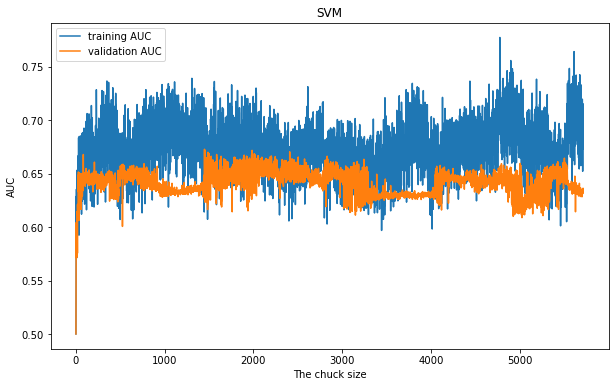

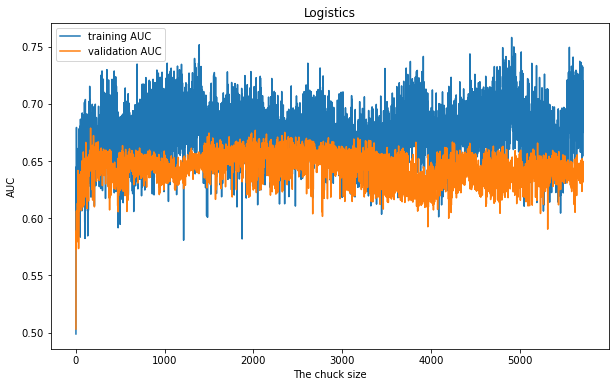

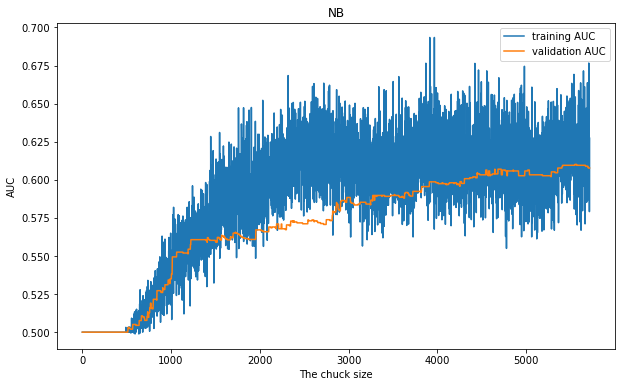

In [16]:
import matplotlib.pyplot as plt
for imodel in range(3):
    plt.rcParams['figure.figsize'] = [10, 6]
    plt.figure()
    plt.title(modelname[imodel])
    plt.plot(train_auc[imodel],label = "training AUC")
    plt.plot(val_auc[imodel],label = "validation AUC")
    plt.xlabel('The chuck size')
    plt.ylabel('AUC')
    plt.legend()

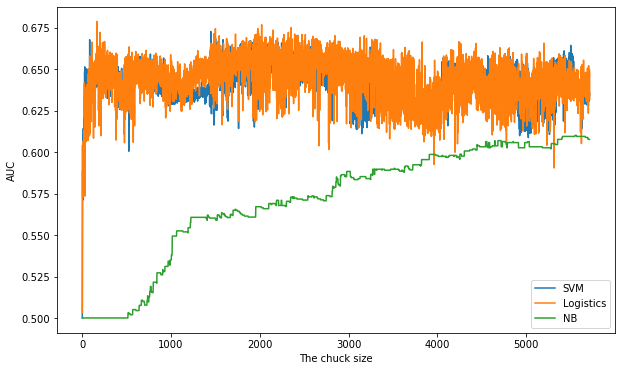

In [17]:
for imodel in range(3):
    plt.rcParams['figure.figsize'] = [10, 6]
    plt.plot(val_auc[imodel],label = modelname[imodel])
    plt.xlabel('The chuck size')
    plt.ylabel('AUC')
    plt.legend()